In [1]:
import os
import torch
import pandas as pd
from utils.data_processing import *
from utils.statistic_tests import *
from utils.vizualization import *

os.environ['CUDA_VISIBLE_DEVICES'] = "1"
torch.cuda.is_available()

%load_ext autoreload
%autoreload 2

## MultiBERT

In [3]:
model = multi_model
tokenizer = multi_tokenizer
print(f"{model.config._name_or_path} has {model.config.num_hidden_layers} hidden layers.")

# Preprocessing 
data_df = retrieve_preprocessed_df("../data/en_TaskIndependentData.json",print_ignored=True, tokenizer=tokenizer) 
data_df.head()


bert-base-multilingual-cased has 12 hidden layers.
We drop 777 ProperNoun and MetaUsage rows out of 4645.
Number of dropped single-meaning-mwe rows: 3200
Only MWEs that are tokenized like row['mwe'].split() have been retrieved at this step.      Specifically, we kept MWEs split into 2 tokens, in the singular form, and no different form from the MWE string ('running' != 'run').      To see the ignored rows, set print_ignored=True.
190 rows dropped where MWE not found as sublist in sentence.
There are 1,434 remaining sentences in the dataset.


id              mwe literal_meaning    _1           _2    _3  0/1  \
0  12  ancient history         history  None  in the past  None    1   
1  12  ancient history         history  None  in the past  None    1   
2  12  ancient history         history  None  in the past  None    1   
3  12  ancient history         history  None  in the past  None    1   
4  12  ancient history         history  None  in the past  None    1   

  fine_grained                                              prior  \
0      history  Keeping up to date with international studies ...   
1      history  Rather than carrying out monographic studies o...   
2      history  COINTELPRO is a stark illustration of how the ...   
3      history  The change is a declaration of purpose: to lea...   
4      history       What kind of student would this course suit?   

                                            sentence  \
0  Brazilian specificity lies in our experience w...   
1  Today, the country has important researchers i...   
2  To disabuse anyone of the comforting delusion ...   
3  There’s a more interesting story to be told ab...   
4  This course will suit anyone fascinated by anc...   

                                               after  \
0  Studying ancient history in Brazil today has t...   
1  Keeping up to date with international studies ...   
2  The Partnership for Civil Justice obtained doc...   
3  It seems to me the really crucial mover in his...   
4  It will appeal to you if you enjoy the challen...   

                                        prior_tokens  \
0  [Keep, ##ing, up, to, date, with, internationa...   
1  [Rather, than, carrying, out, mono, ##graphic,...   
2  [CO, ##IN, ##TE, ##L, ##PR, ##O, is, a, stark,...   
3  [The, change, is, a, declaration, of, purpose,...   
4  [What, kind, of, student, would, this, course,...   

                                     sentence_tokens  \
0  [Brazilian, specific, ##ity, lies, in, our, ex...   
1  [Today, ,, the, country, has, important, resea...   
2  [To, disa, ##bus, ##e, anyone, of, the, com, #...   
3  [There, [UNK], s, a, more, interesting, story,...   
4  [This, course, will, suit, anyone, fa, ##sci, ...   

                                        after_tokens       tokenized_mwe  \
0  [Study, ##ing, ancient, history, in, Brazil, t...  [ancient, history]   
1  [Keep, ##ing, up, to, date, with, internationa...  [ancient, history]   
2  [The, Partnership, for, Civil, Justice, obtain...  [ancient, history]   
3  [It, seems, to, me, the, really, crucial, move...  [ancient, history]   
4  [It, will, appeal, to, you, if, you, enjoy, th...  [ancient, history]   

                          normalized_sentence_tokens  
0  [Brazilian, specific, ity, lies, in, our, expe...  
1  [Today, ,, the, country, has, important, resea...  
2  [To, disa, bus, e, anyone, of, the, com, fort,...  
3  [There, [UNK], s, a, more, interesting, story,...  
4  [This, course, will, suit, anyone, fa, sci, na...

In [4]:
selected_pairs, pair_info = create_literal_idiomatic_pairs(data_df, unique_occurrences=False)
pair_df = get_pair_info_df(pair_info)
pair_df['difference'] = pair_df.apply(lambda row: compute_difference(row, 'literal', 'idiomatic'), axis=1)
pair_df['most_represented'] = pair_df.apply(get_most_represented, axis=1)
pair_df = pair_df[pair_df['literal'] > 3]
pair_df = pair_df.sort_index()
pair_df

mwe              literal  idiomatic  difference most_represented
acid test              7          9           2        idiomatic
ancient history       15          7           8          literal
baby blues            17          3          14          literal
bad hat               10          8           2          literal
best man              10         10           0            equal
big fish               7          4           3          literal
blue blood             4         13           9        idiomatic
brass ring             9         17           8        idiomatic
brick wall             9          8           1          literal
closed book            7          8           1        idiomatic
cutting edge           7         11           4        idiomatic
dry land               5         16          11        idiomatic
fine line              7          6           1          literal
gold mine             14          3          11          literal
ground floor          19          5          14          literal
rocket science         5         10           5        idiomatic

[acid test] Layer 0
Training accuracy: 75% => not linearly separable
[acid test] Layer 1
Training accuracy: 100% => linearly separable
[acid test] Layer 2
Training accuracy: 100% => linearly separable
[acid test] Layer 3
Training accuracy: 100% => linearly separable
[acid test] Layer 4
Training accuracy: 100% => linearly separable
[acid test] Layer 5
Training accuracy: 100% => linearly separable
[acid test] Layer 6
Training accuracy: 100% => linearly separable
[acid test] Layer 7
Training accuracy: 100% => linearly separable
[acid test] Layer 8
Training accuracy: 100% => linearly separable
[acid test] Layer 9
Training accuracy: 100% => linearly separable
[acid test] Layer 10
Training accuracy: 100% => linearly separable
[acid test] Layer 11
Training accuracy: 100% => linearly separable
[acid test] Layer 12
Training accuracy: 100% => linearly separable


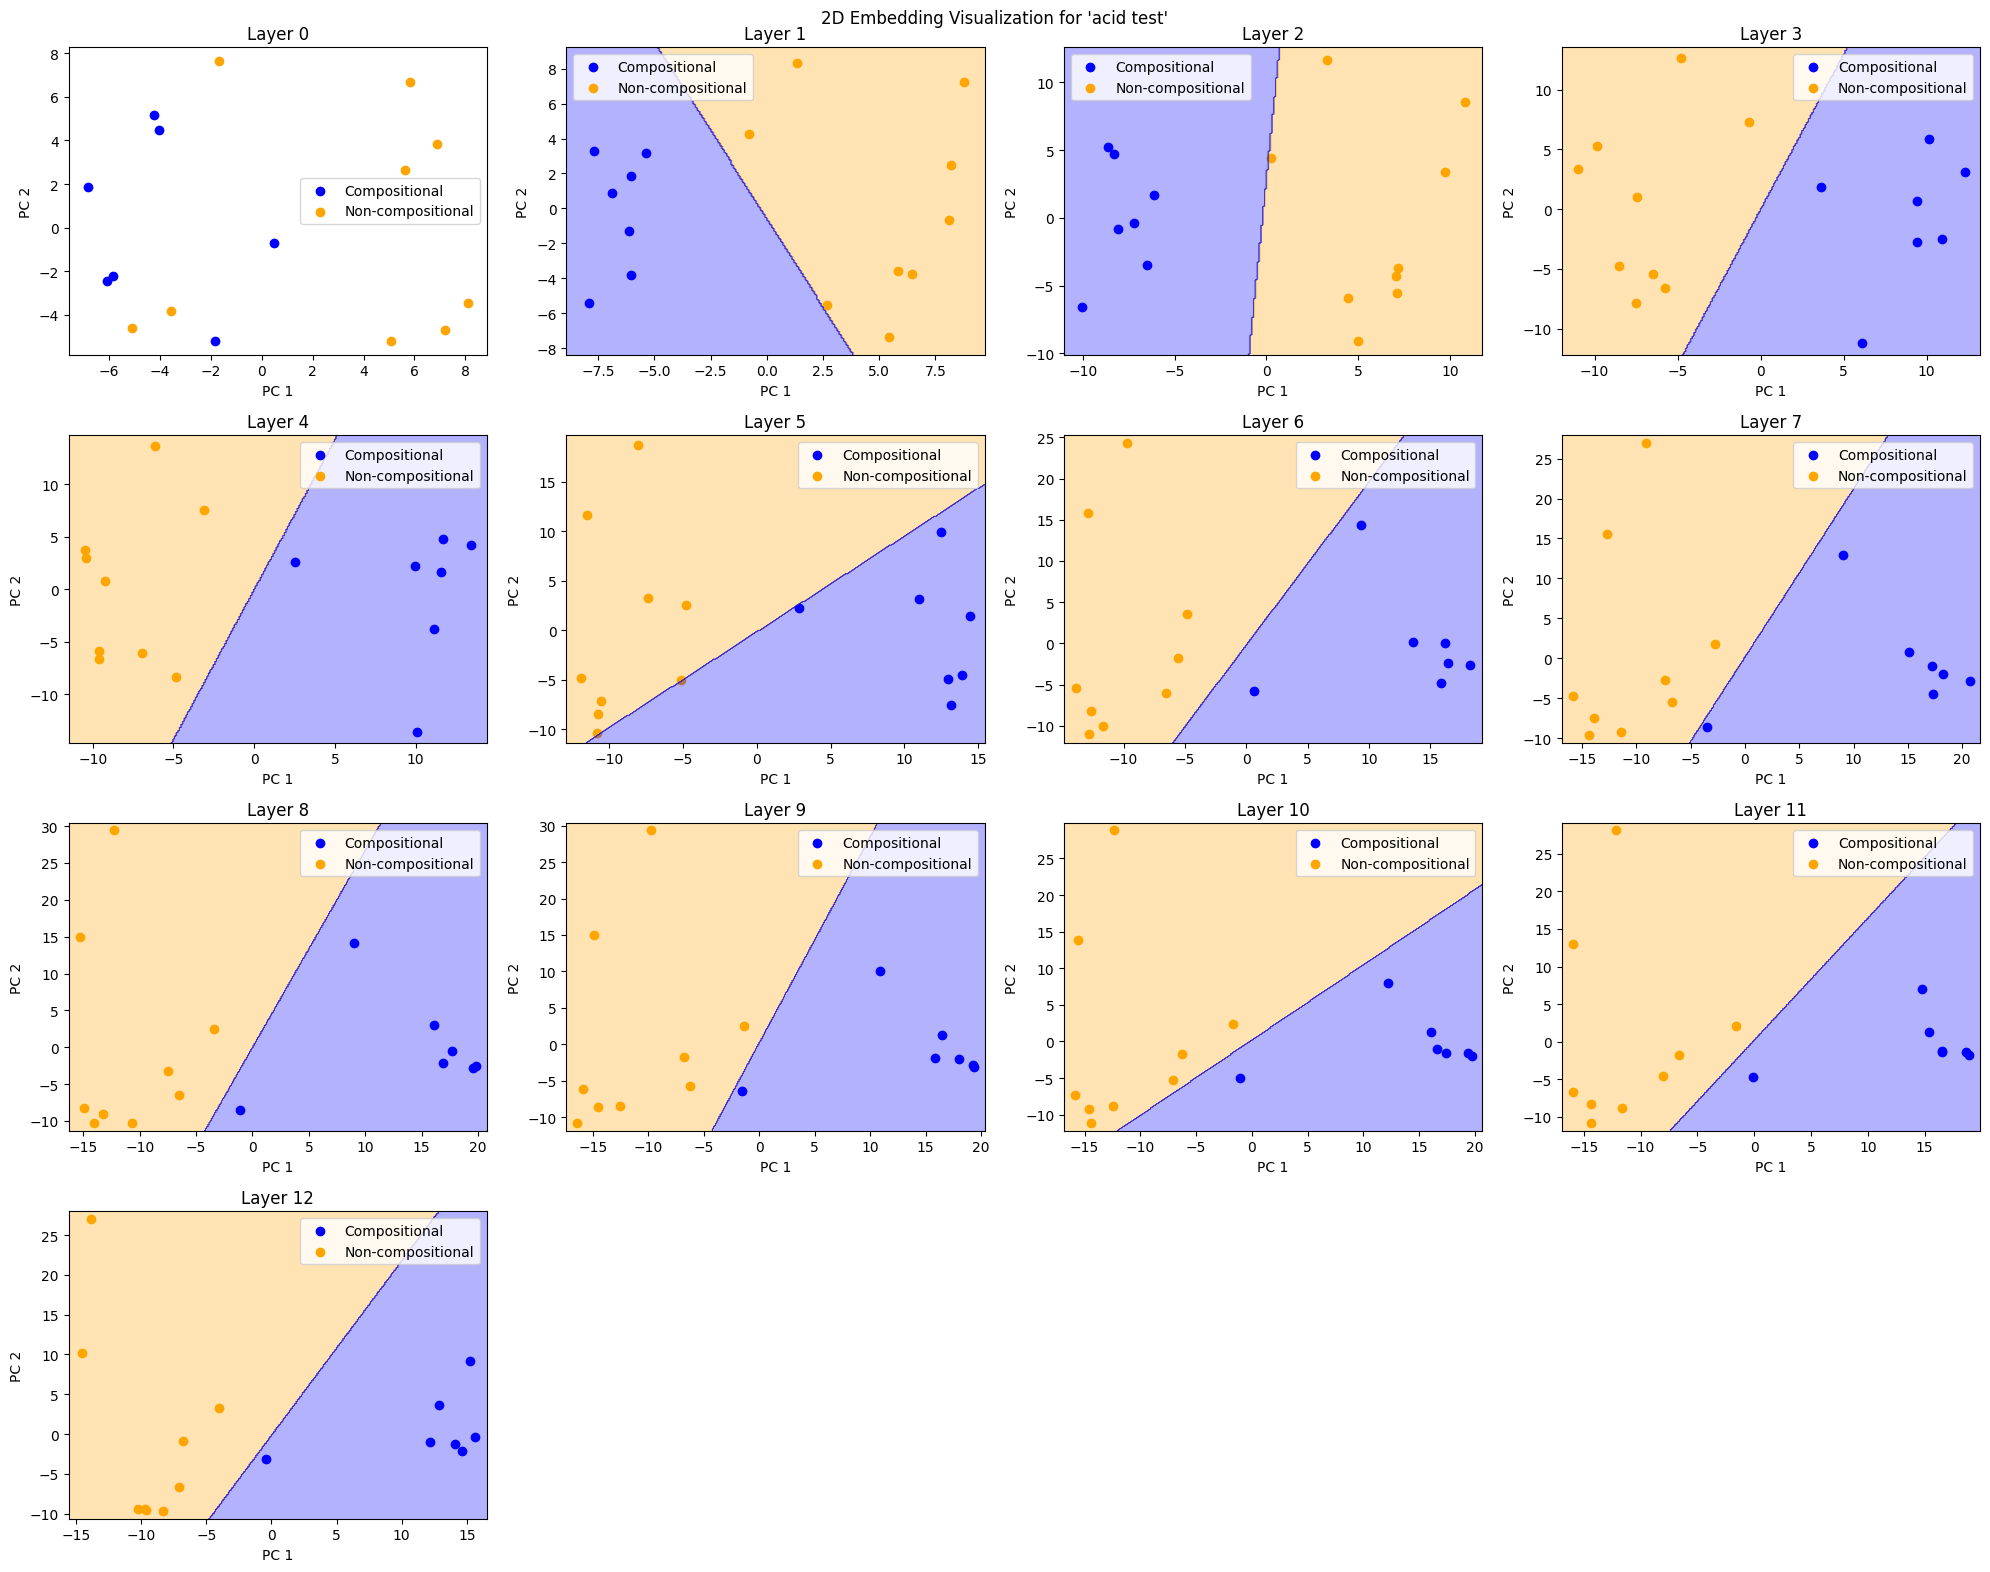

[ancient history] Layer 0
Training accuracy: 64% => not linearly separable
[ancient history] Layer 1
Training accuracy: 82% => not linearly separable
[ancient history] Layer 2
Training accuracy: 73% => not linearly separable
[ancient history] Layer 3
Training accuracy: 77% => not linearly separable
[ancient history] Layer 4
Training accuracy: 82% => not linearly separable
[ancient history] Layer 5
Training accuracy: 77% => not linearly separable
[ancient history] Layer 6
Training accuracy: 73% => not linearly separable
[ancient history] Layer 7
Training accuracy: 82% => not linearly separable
[ancient history] Layer 8
Training accuracy: 45% => not linearly separable
[ancient history] Layer 9
Training accuracy: 77% => not linearly separable
[ancient history] Layer 10
Training accuracy: 55% => not linearly separable
[ancient history] Layer 11
Training accuracy: 64% => not linearly separable
[ancient history] Layer 12
Training accuracy: 82% => not linearly separable


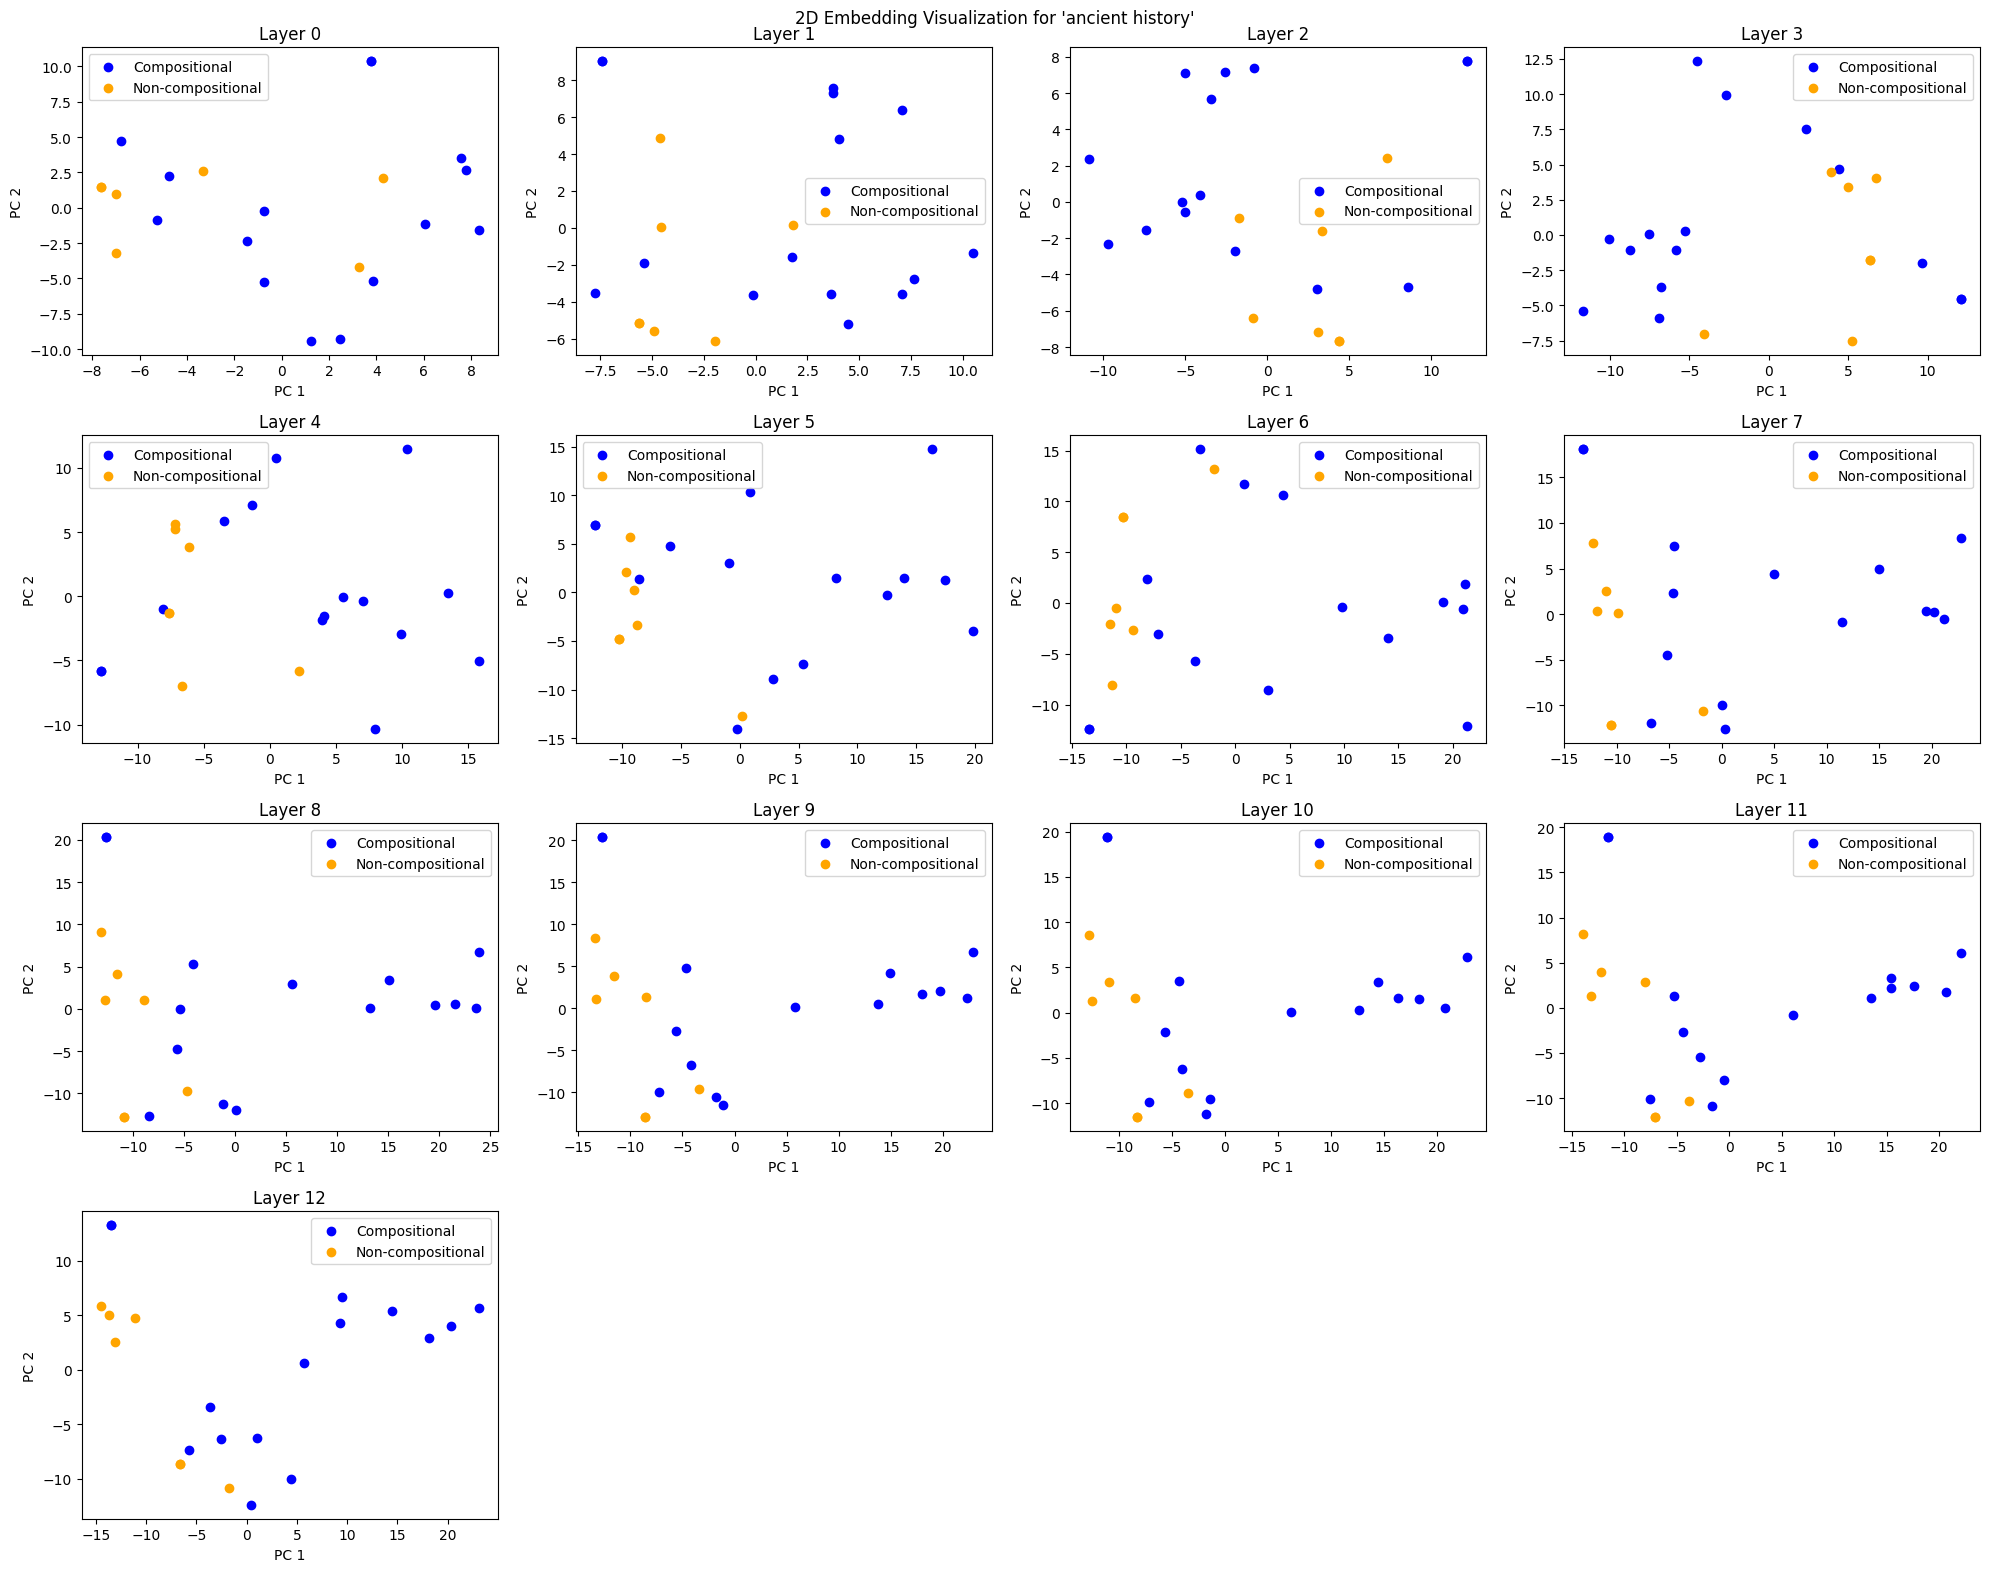

[baby blues] Layer 0
Training accuracy: 82% => not linearly separable
[baby blues] Layer 1
Training accuracy: 65% => not linearly separable
[baby blues] Layer 2
Training accuracy: 82% => not linearly separable
[baby blues] Layer 3
Training accuracy: 65% => not linearly separable
[baby blues] Layer 4
Training accuracy: 59% => not linearly separable
[baby blues] Layer 5
Training accuracy: 71% => not linearly separable
[baby blues] Layer 6
Training accuracy: 71% => not linearly separable
[baby blues] Layer 7
Training accuracy: 76% => not linearly separable
[baby blues] Layer 8
Training accuracy: 71% => not linearly separable
[baby blues] Layer 9
Training accuracy: 82% => not linearly separable
[baby blues] Layer 10
Training accuracy: 65% => not linearly separable
[baby blues] Layer 11
Training accuracy: 82% => not linearly separable
[baby blues] Layer 12
Training accuracy: 71% => not linearly separable


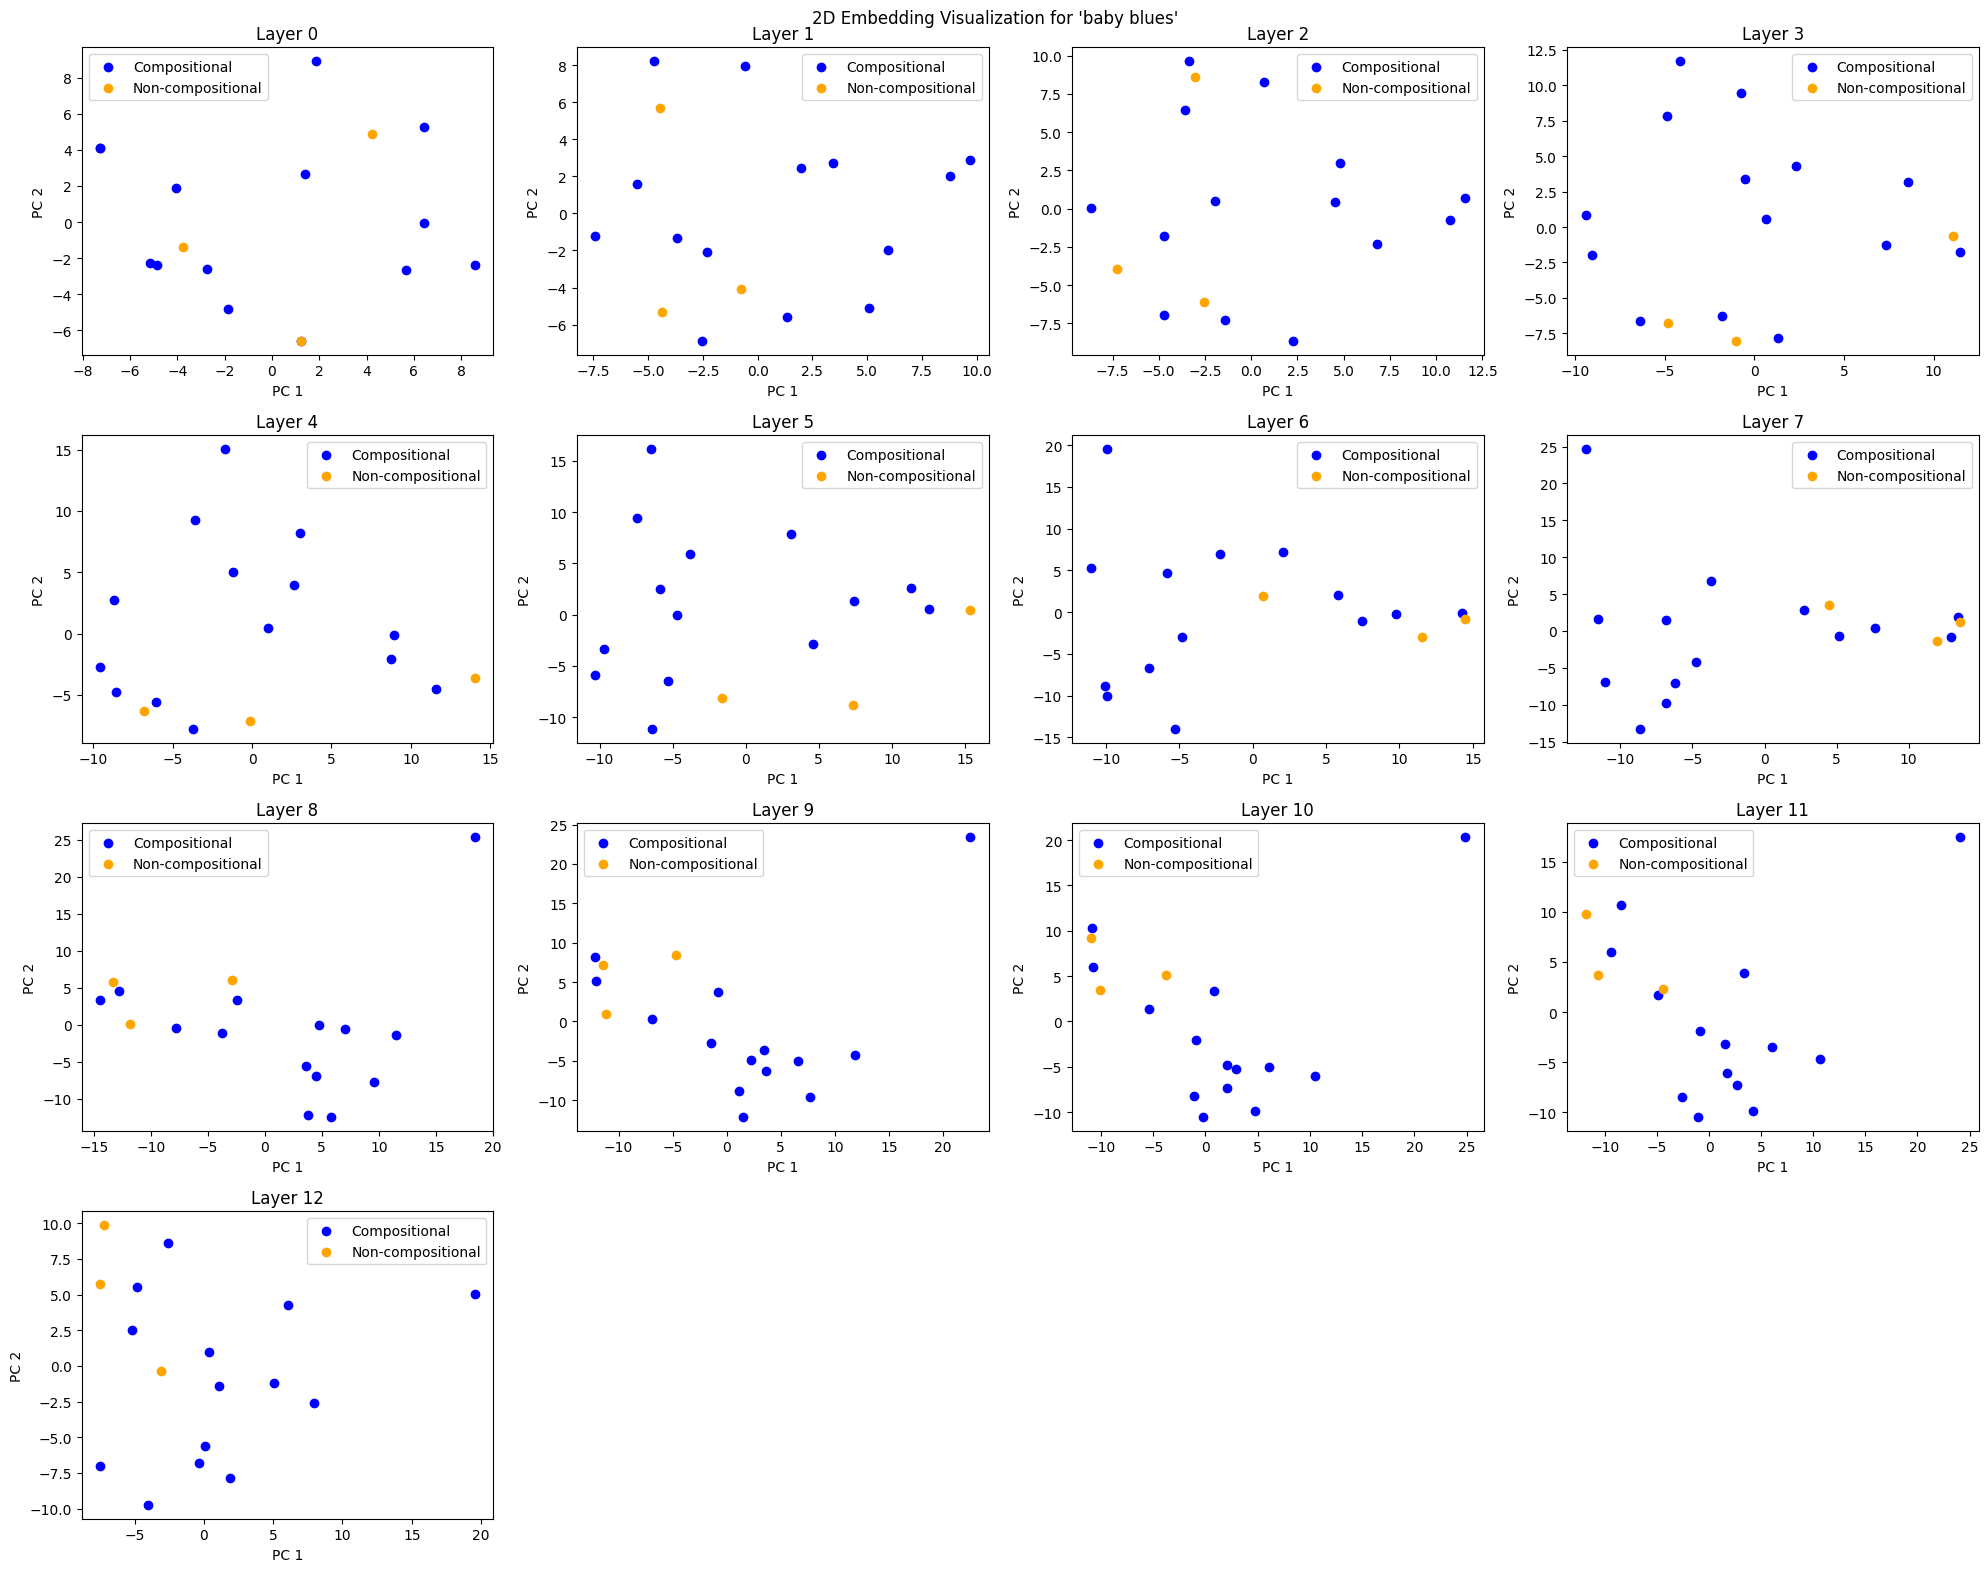

[bad hat] Layer 0
Training accuracy: 50% => not linearly separable
[bad hat] Layer 1
Training accuracy: 44% => not linearly separable
[bad hat] Layer 2
Training accuracy: 50% => not linearly separable
[bad hat] Layer 3
Training accuracy: 44% => not linearly separable
[bad hat] Layer 4
Training accuracy: 56% => not linearly separable
[bad hat] Layer 5
Training accuracy: 50% => not linearly separable
[bad hat] Layer 6
Training accuracy: 50% => not linearly separable
[bad hat] Layer 7
Training accuracy: 62% => not linearly separable
[bad hat] Layer 8
Training accuracy: 44% => not linearly separable
[bad hat] Layer 9
Training accuracy: 31% => not linearly separable
[bad hat] Layer 10
Training accuracy: 31% => not linearly separable
[bad hat] Layer 11
Training accuracy: 31% => not linearly separable
[bad hat] Layer 12
Training accuracy: 56% => not linearly separable


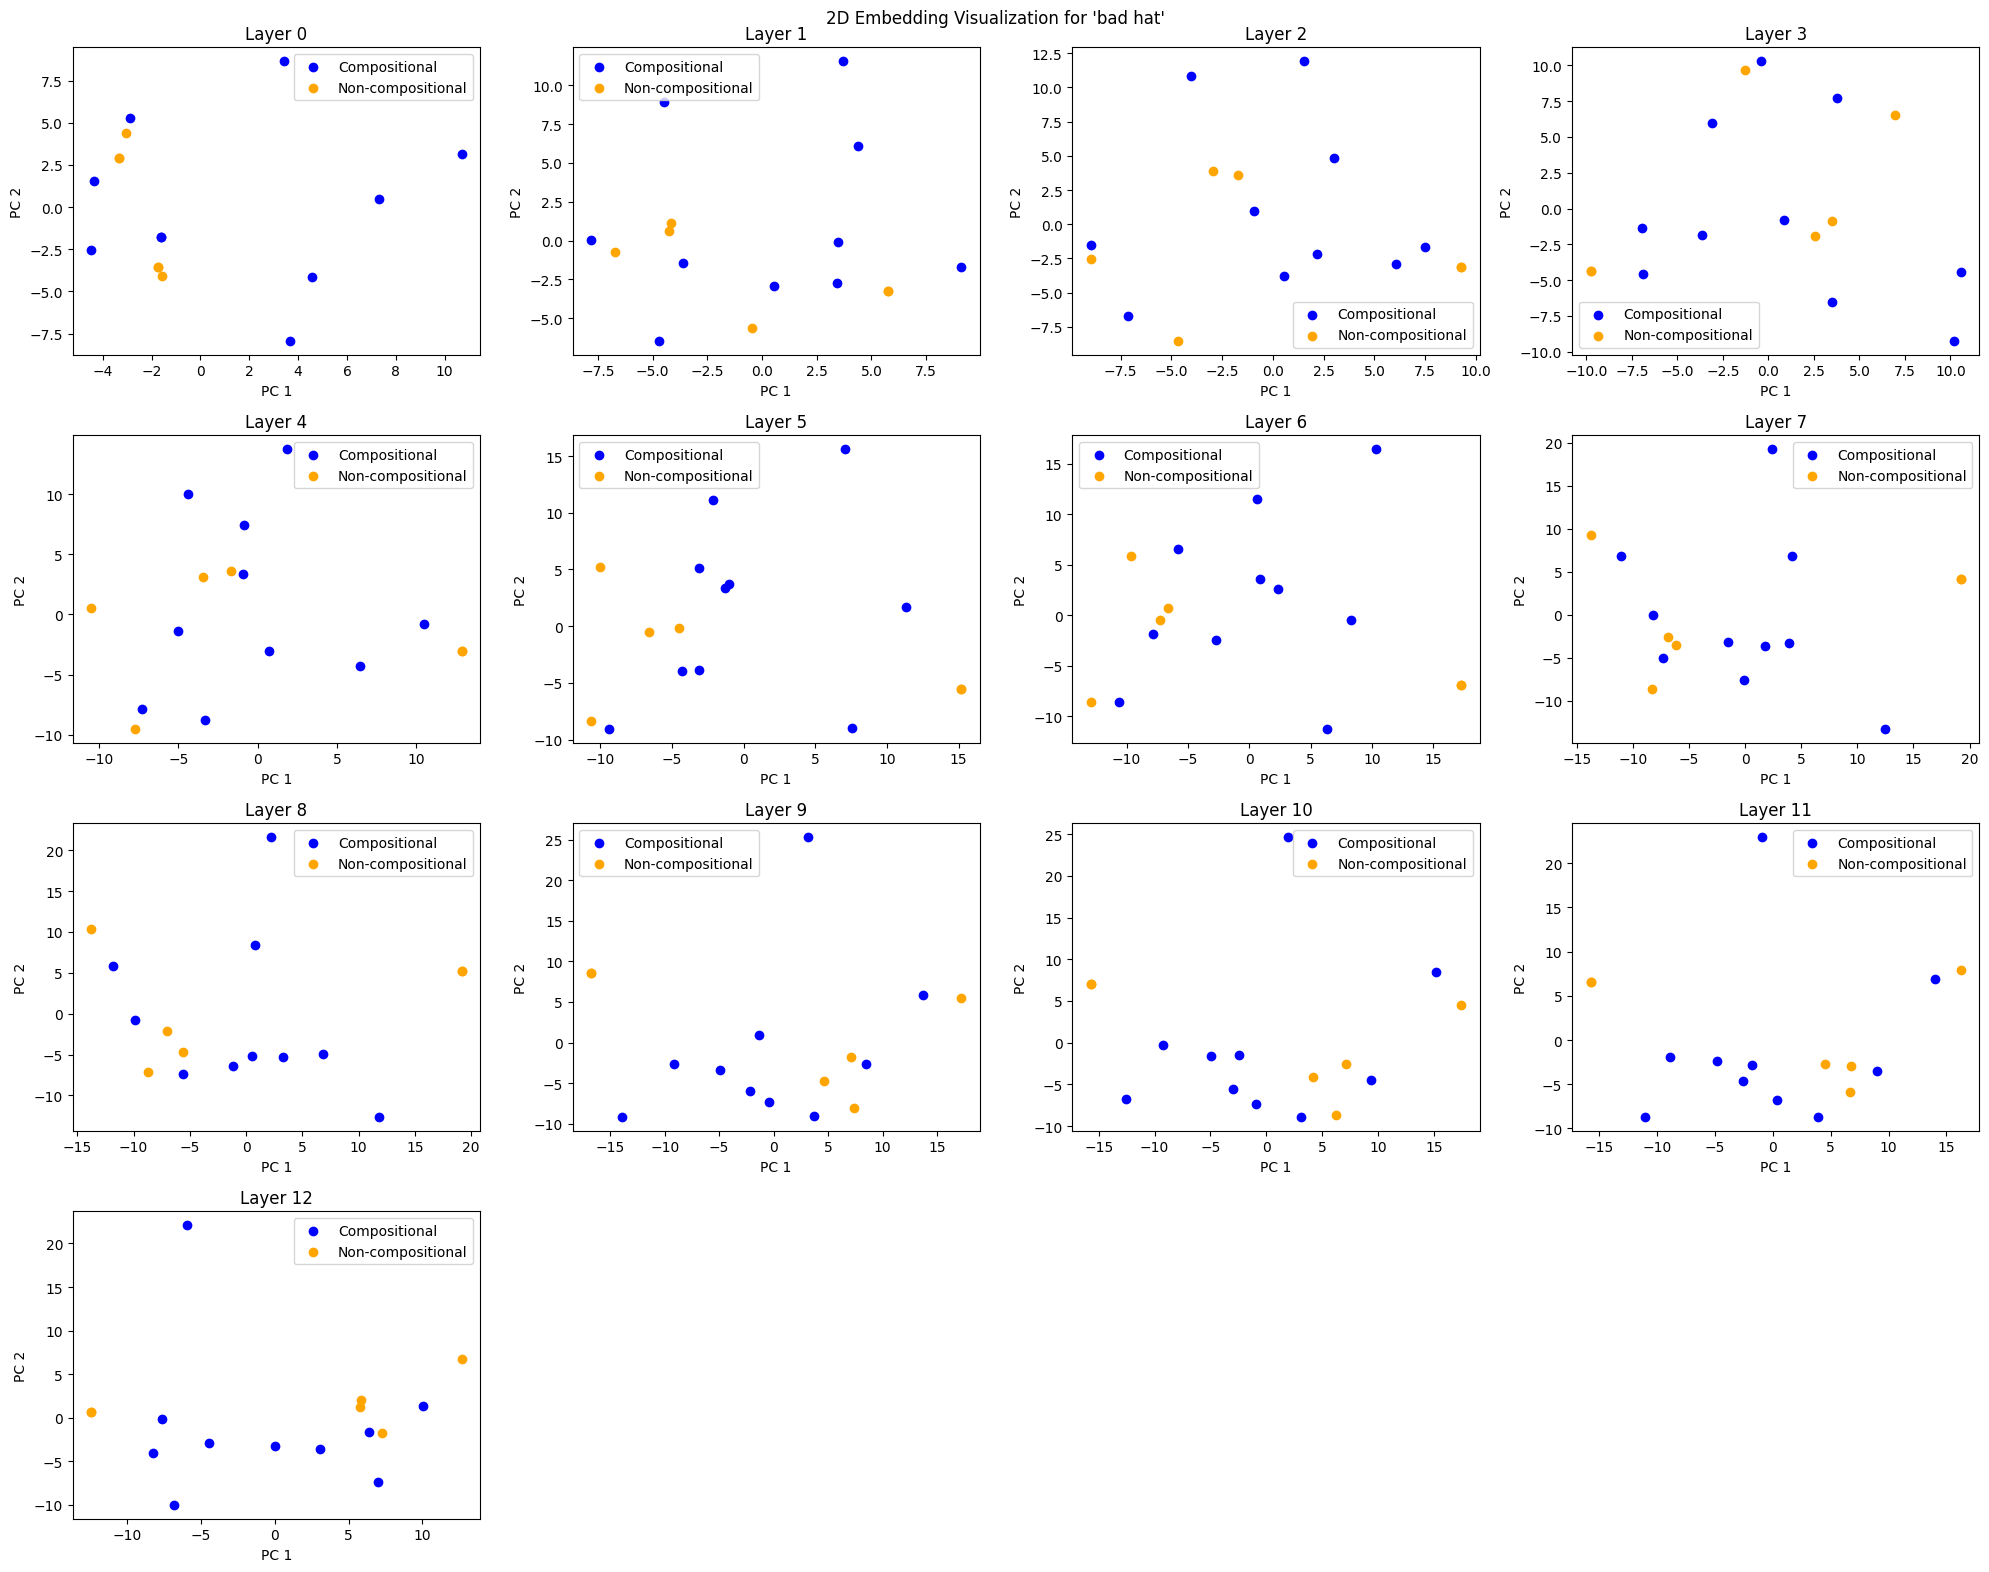

[best man] Layer 0
Training accuracy: 84% => not linearly separable
[best man] Layer 1
Training accuracy: 68% => not linearly separable
[best man] Layer 2
Training accuracy: 68% => not linearly separable
[best man] Layer 3
Training accuracy: 68% => not linearly separable
[best man] Layer 4
Training accuracy: 63% => not linearly separable
[best man] Layer 5
Training accuracy: 89% => not linearly separable
[best man] Layer 6
Training accuracy: 74% => not linearly separable
[best man] Layer 7
Training accuracy: 89% => not linearly separable
[best man] Layer 8
Training accuracy: 84% => not linearly separable
[best man] Layer 9
Training accuracy: 95% => not linearly separable
[best man] Layer 10
Training accuracy: 100% => linearly separable
[best man] Layer 11
Training accuracy: 100% => linearly separable
[best man] Layer 12
Training accuracy: 100% => linearly separable


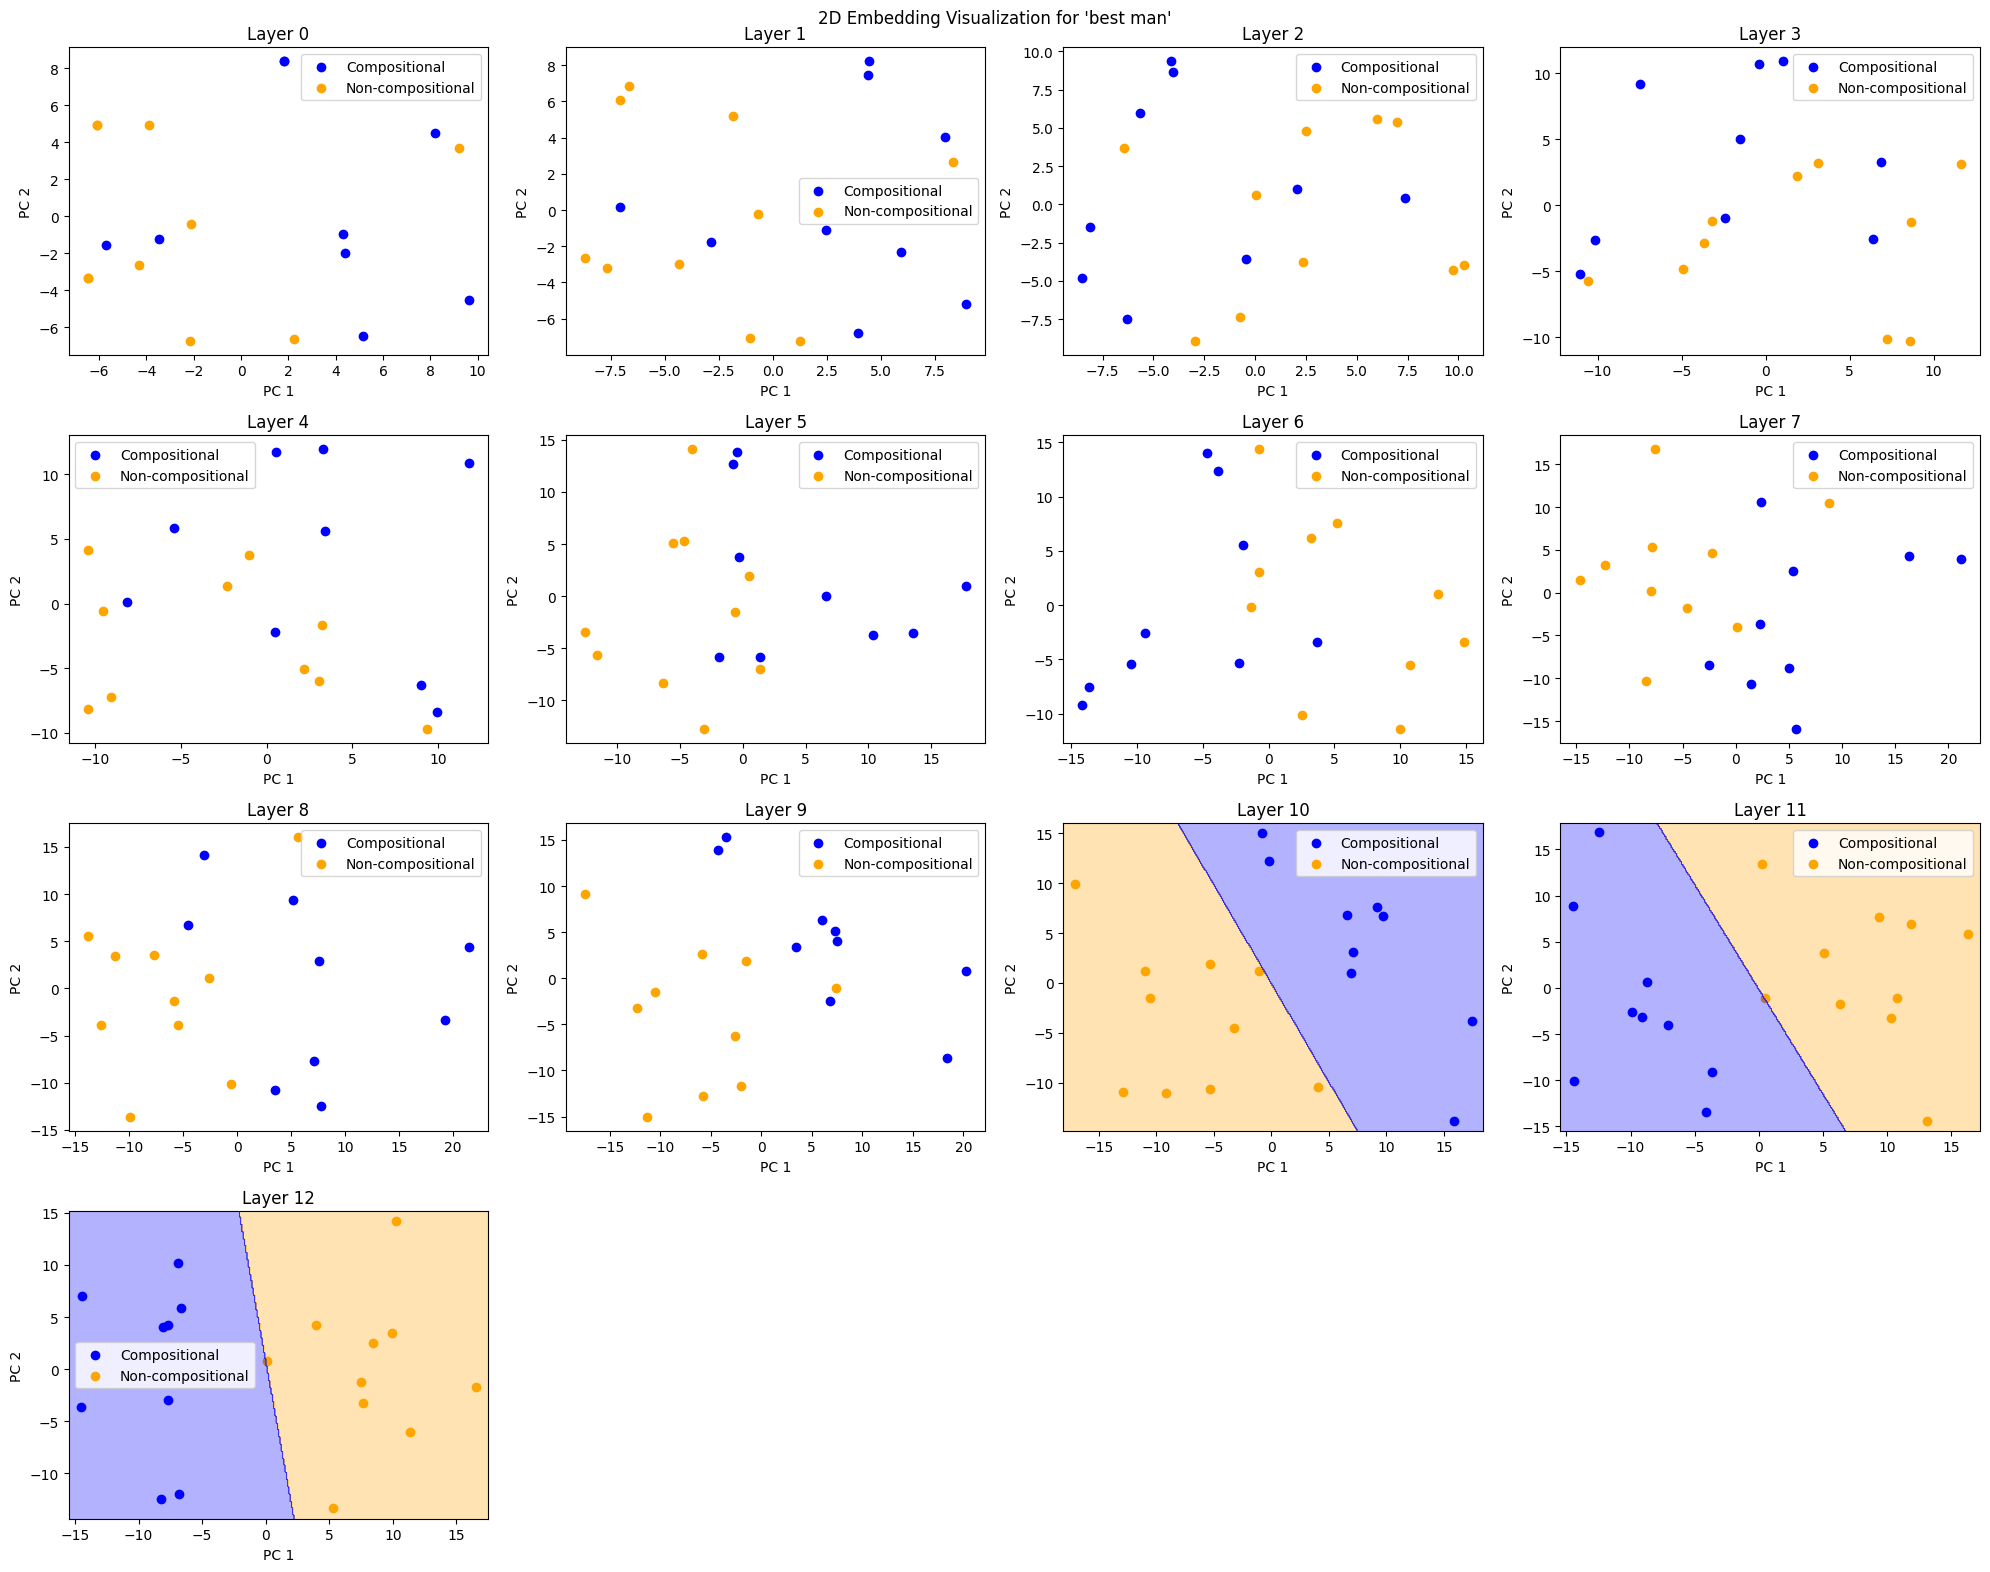

[big fish] Layer 0
Training accuracy: 73% => not linearly separable
[big fish] Layer 1
Training accuracy: 73% => not linearly separable
[big fish] Layer 2
Training accuracy: 82% => not linearly separable
[big fish] Layer 3
Training accuracy: 82% => not linearly separable
[big fish] Layer 4
Training accuracy: 82% => not linearly separable
[big fish] Layer 5
Training accuracy: 82% => not linearly separable
[big fish] Layer 6
Training accuracy: 82% => not linearly separable
[big fish] Layer 7
Training accuracy: 91% => not linearly separable
[big fish] Layer 8
Training accuracy: 73% => not linearly separable
[big fish] Layer 9
Training accuracy: 91% => not linearly separable
[big fish] Layer 10
Training accuracy: 91% => not linearly separable
[big fish] Layer 11
Training accuracy: 91% => not linearly separable
[big fish] Layer 12
Training accuracy: 100% => linearly separable


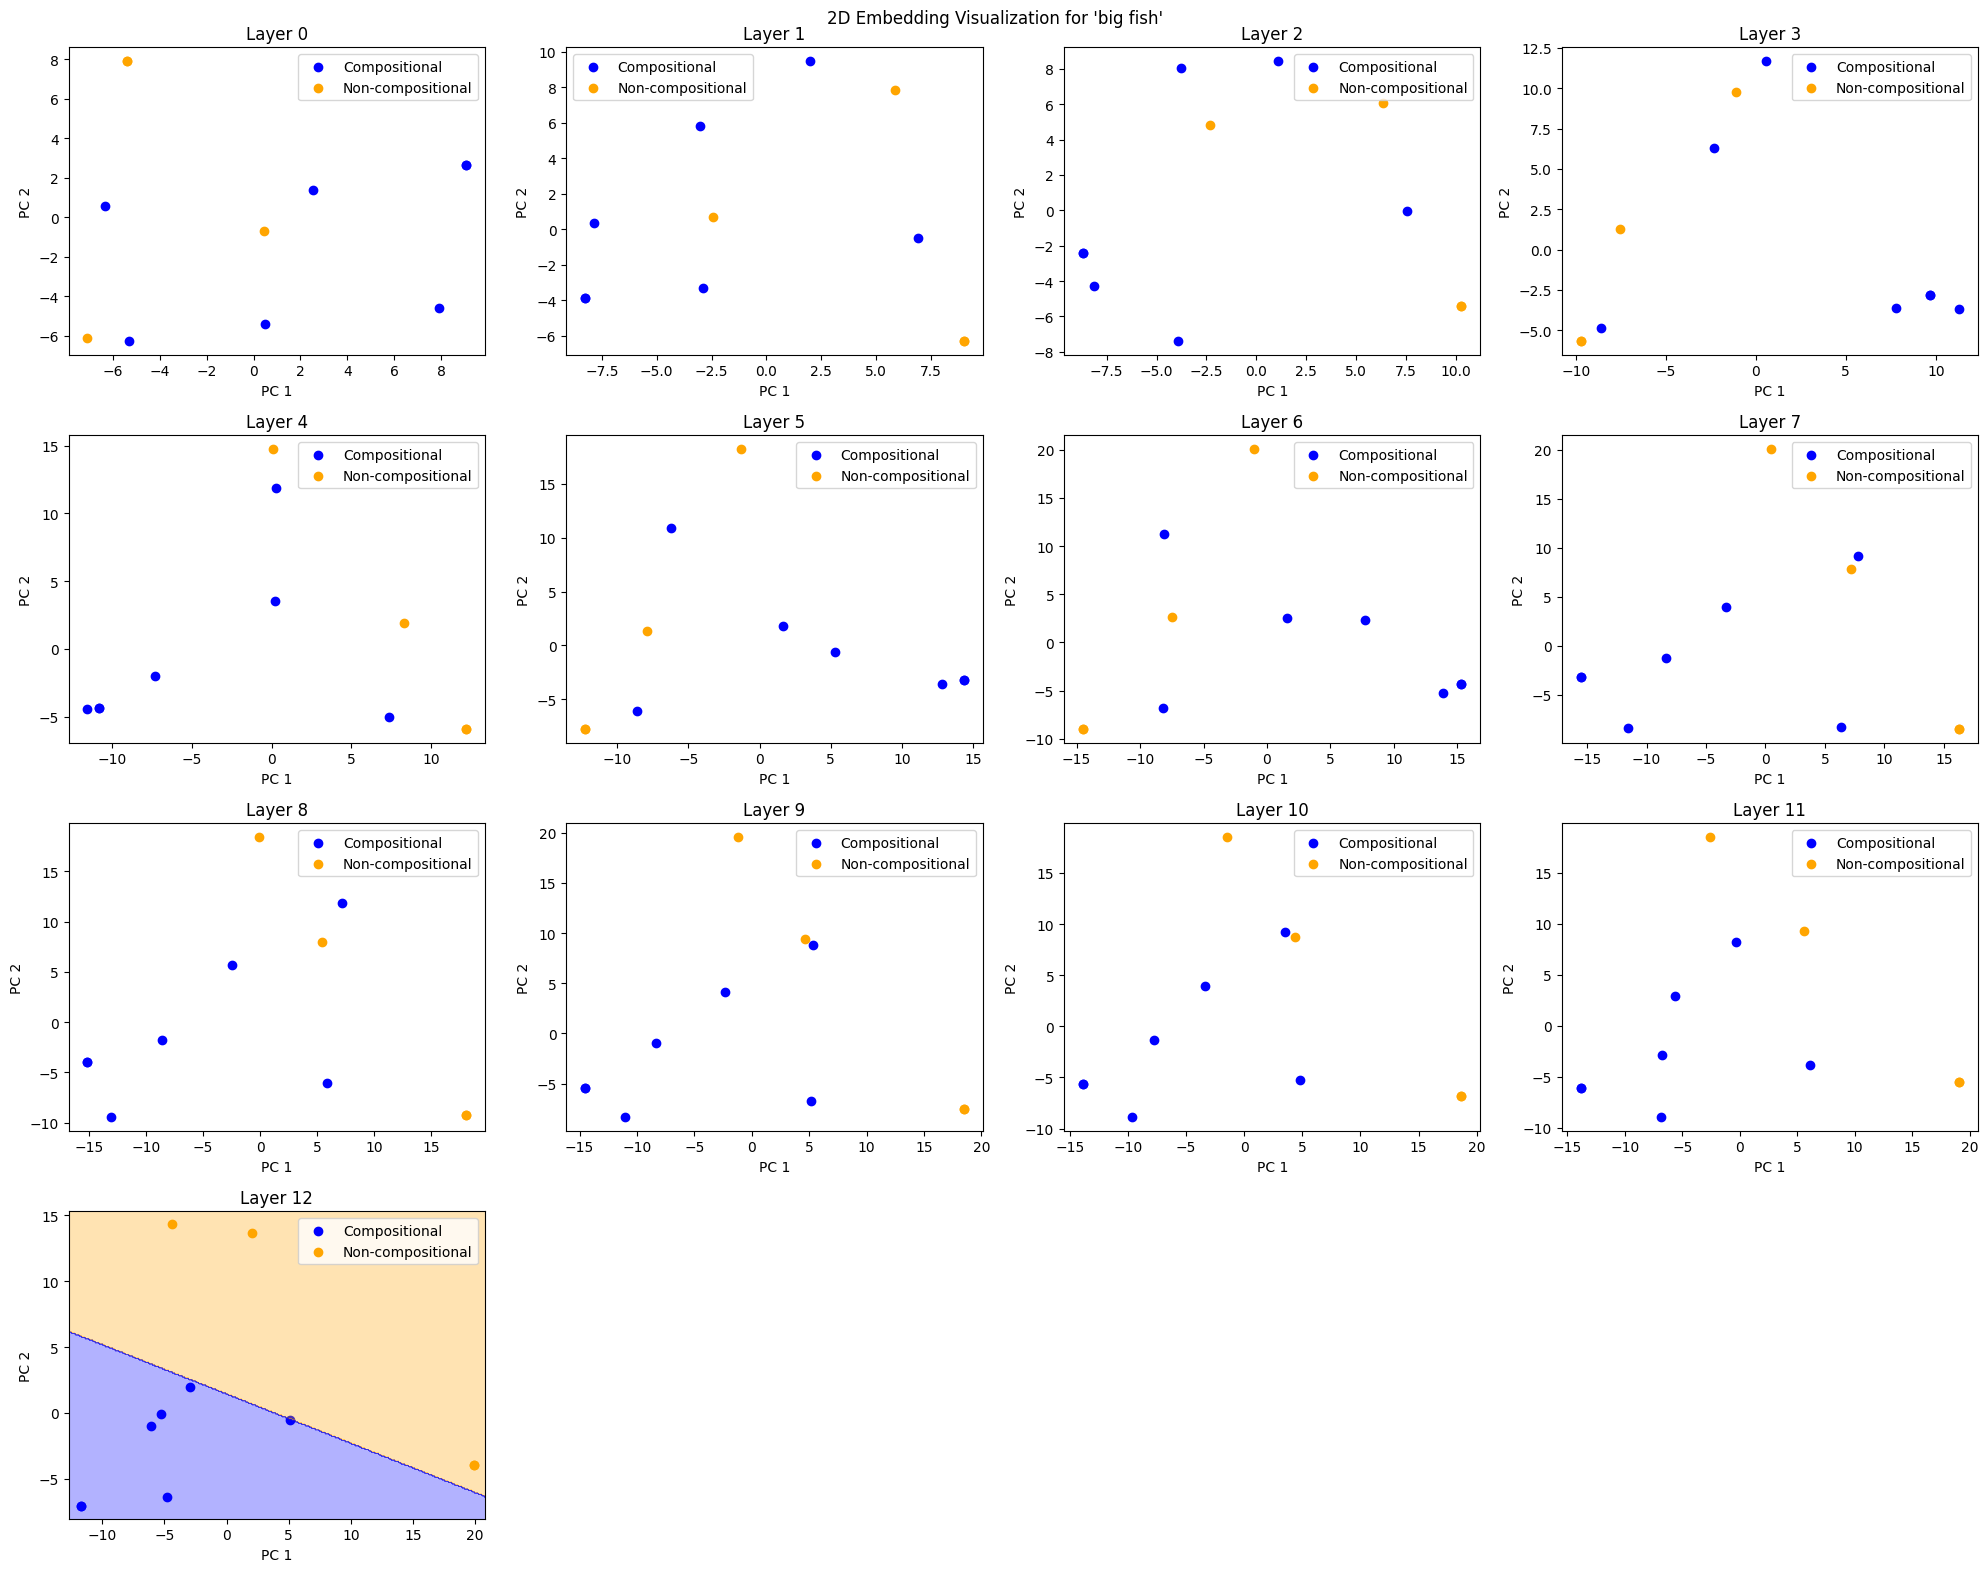

[blue blood] Layer 0
Training accuracy: 76% => not linearly separable
[blue blood] Layer 1
Training accuracy: 76% => not linearly separable
[blue blood] Layer 2
Training accuracy: 100% => linearly separable
[blue blood] Layer 3
Training accuracy: 100% => linearly separable
[blue blood] Layer 4
Training accuracy: 100% => linearly separable
[blue blood] Layer 5
Training accuracy: 76% => not linearly separable
[blue blood] Layer 6
Training accuracy: 94% => not linearly separable
[blue blood] Layer 7
Training accuracy: 94% => not linearly separable
[blue blood] Layer 8
Training accuracy: 94% => not linearly separable
[blue blood] Layer 9
Training accuracy: 88% => not linearly separable
[blue blood] Layer 10
Training accuracy: 94% => not linearly separable
[blue blood] Layer 11
Training accuracy: 94% => not linearly separable
[blue blood] Layer 12
Training accuracy: 82% => not linearly separable


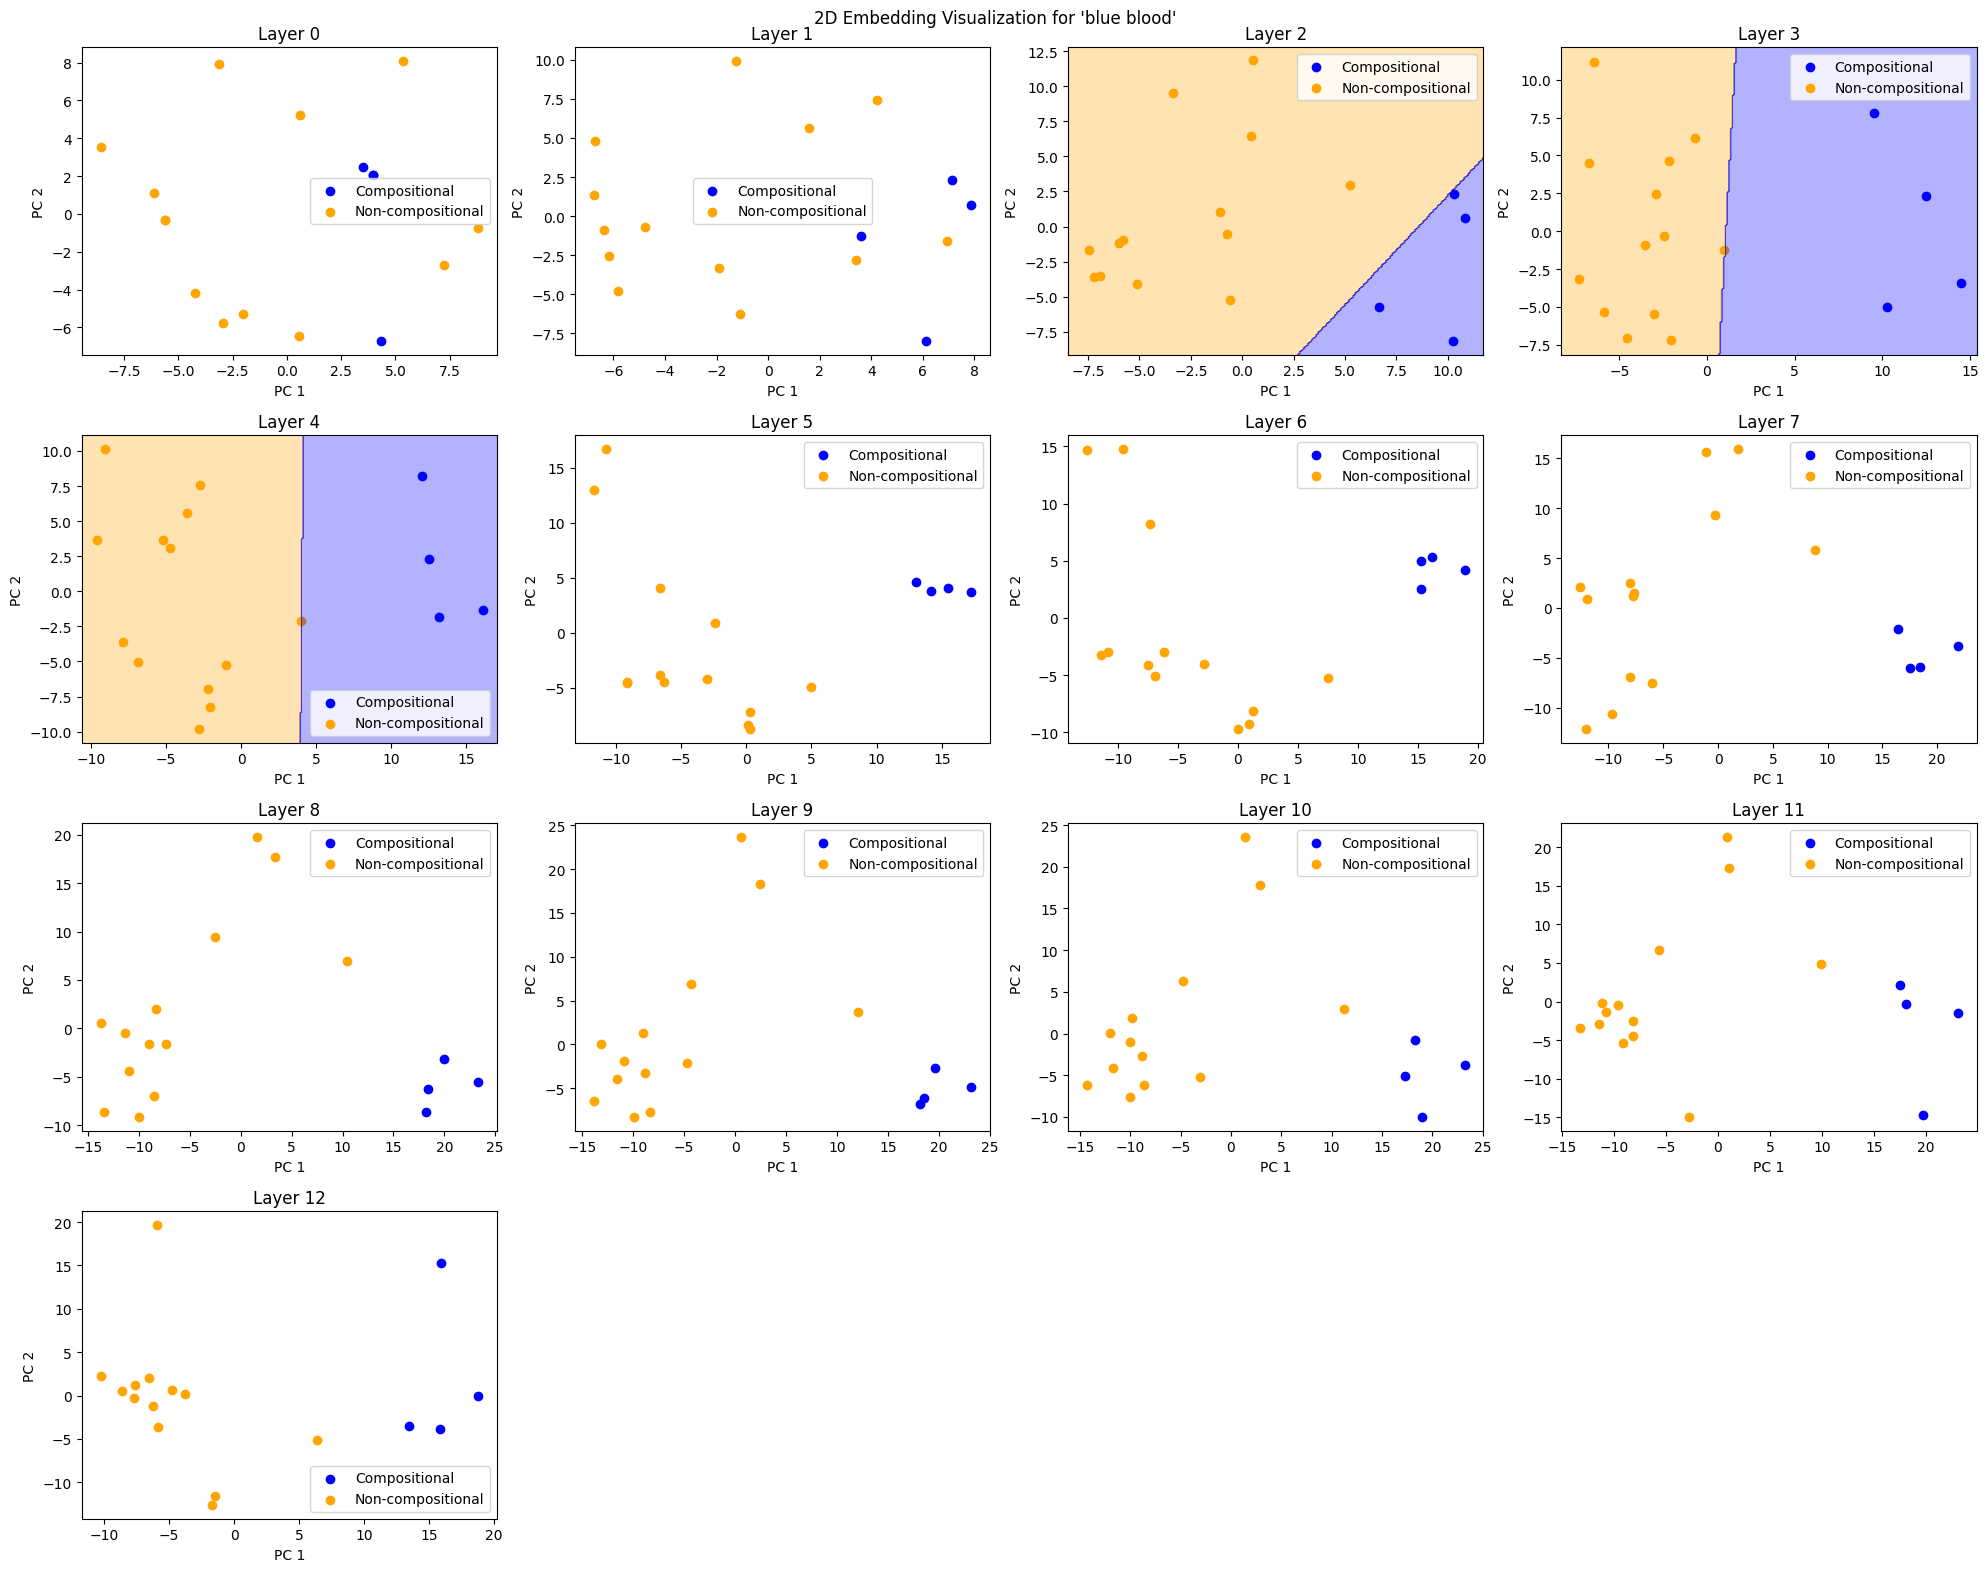

[brass ring] Layer 0
Training accuracy: 54% => not linearly separable
[brass ring] Layer 1
Training accuracy: 58% => not linearly separable
[brass ring] Layer 2
Training accuracy: 46% => not linearly separable
[brass ring] Layer 3
Training accuracy: 92% => not linearly separable
[brass ring] Layer 4
Training accuracy: 92% => not linearly separable
[brass ring] Layer 5
Training accuracy: 96% => not linearly separable
[brass ring] Layer 6
Training accuracy: 85% => not linearly separable
[brass ring] Layer 7
Training accuracy: 92% => not linearly separable
[brass ring] Layer 8
Training accuracy: 92% => not linearly separable
[brass ring] Layer 9
Training accuracy: 88% => not linearly separable
[brass ring] Layer 10
Training accuracy: 88% => not linearly separable
[brass ring] Layer 11
Training accuracy: 88% => not linearly separable
[brass ring] Layer 12
Training accuracy: 92% => not linearly separable


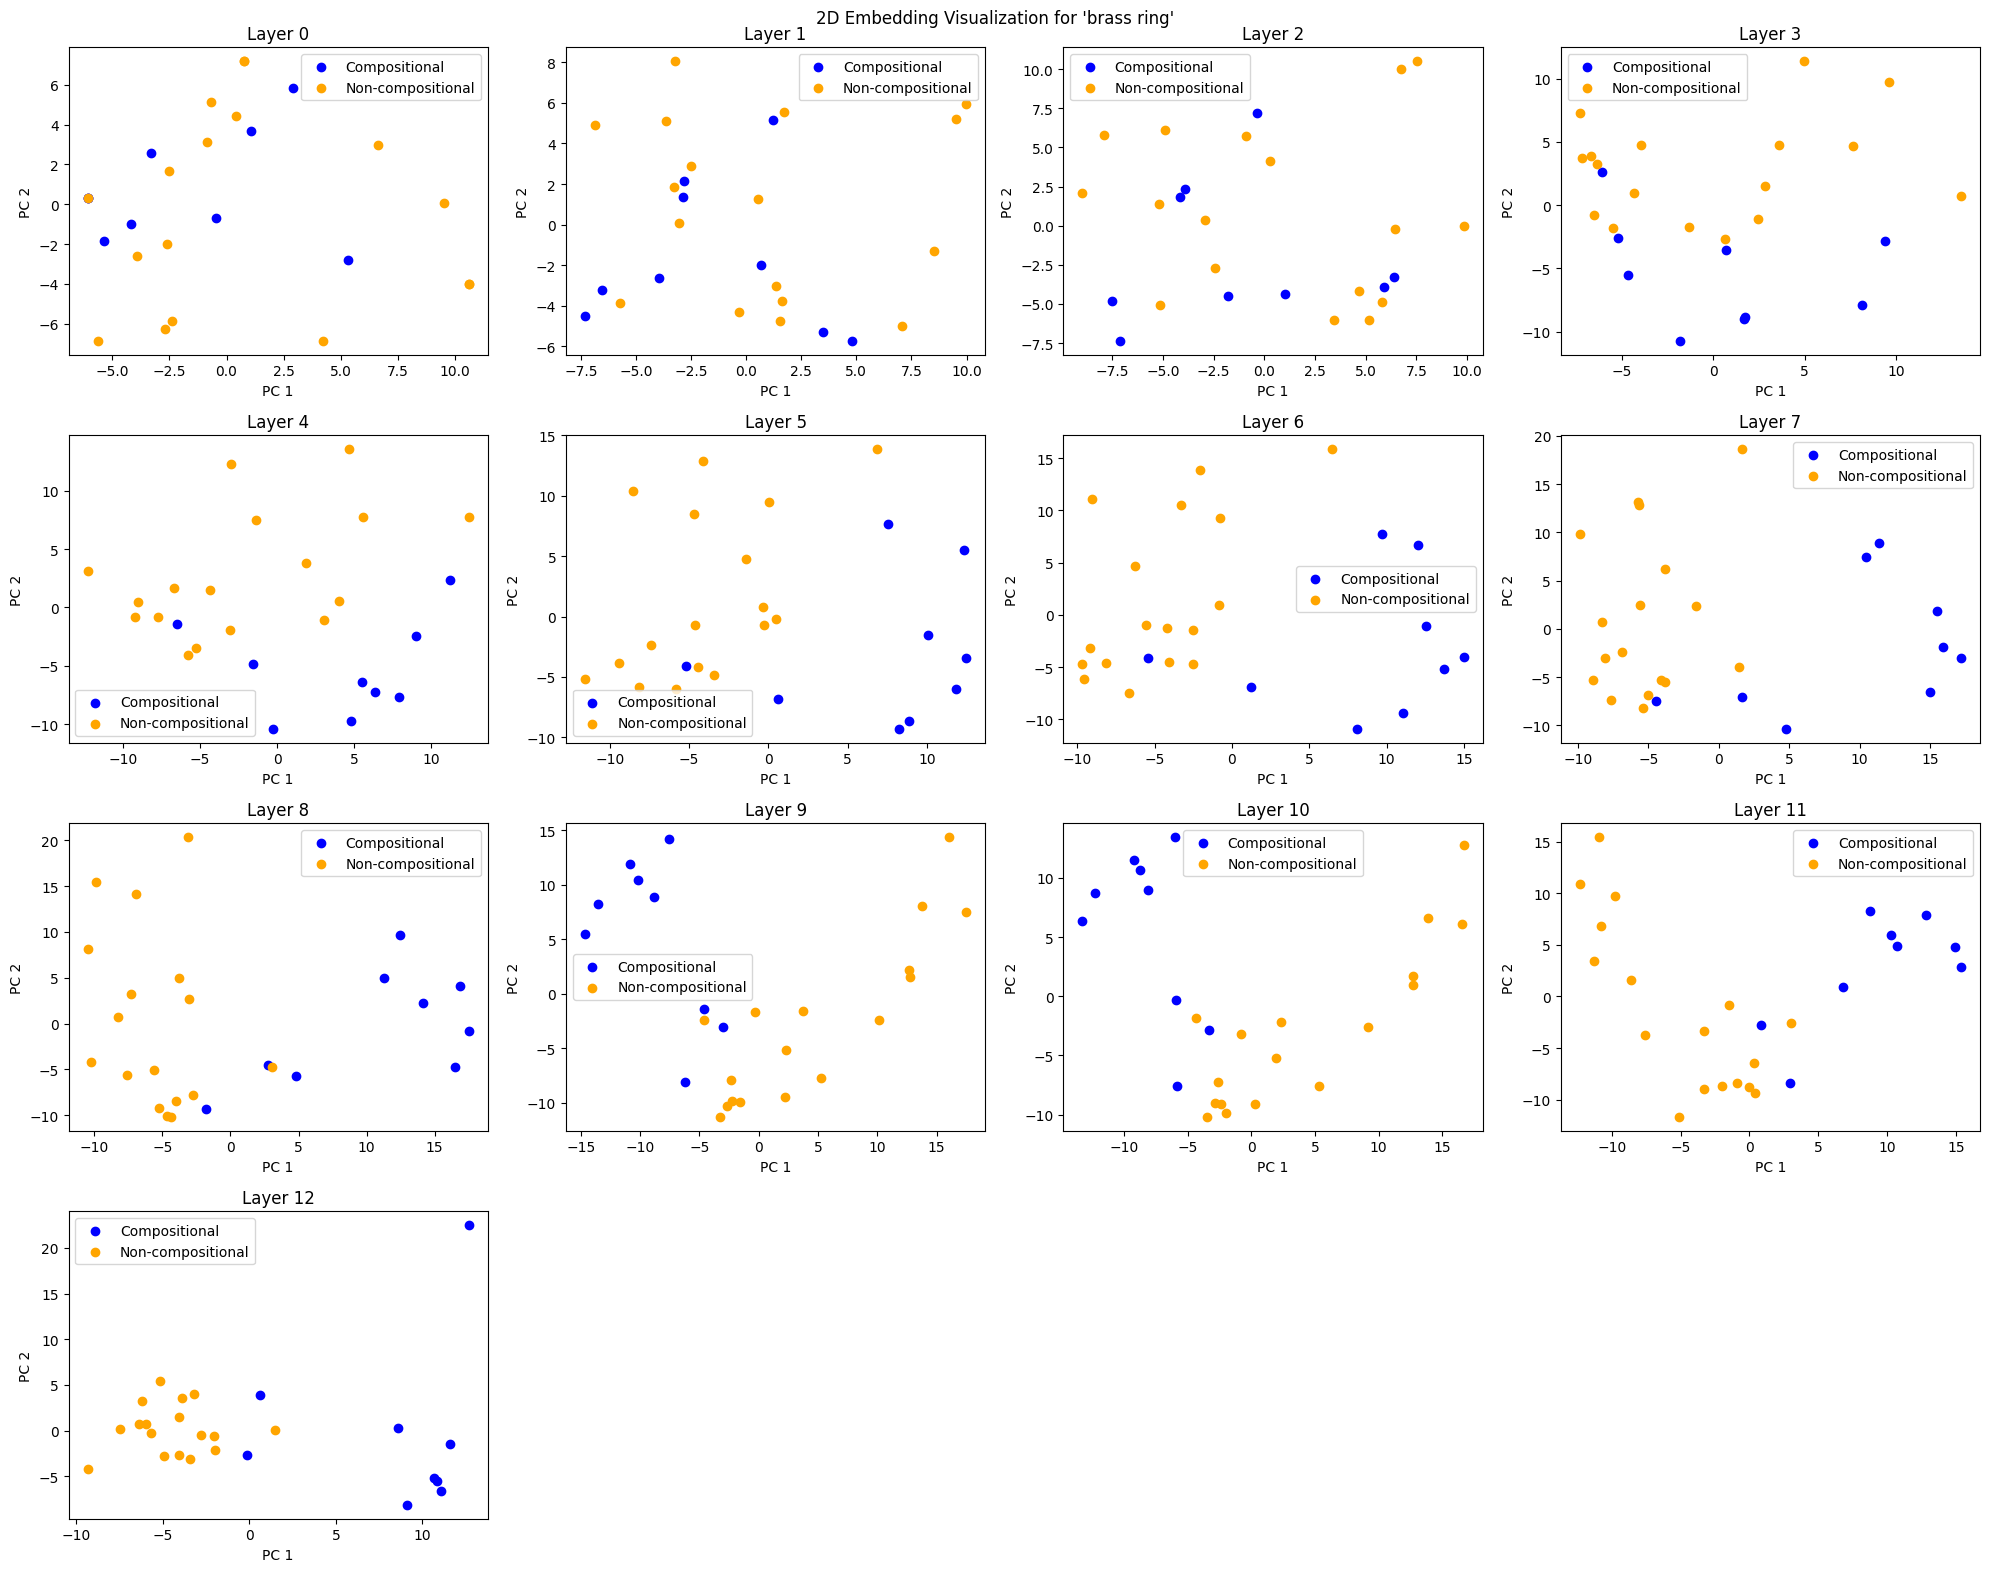

[brick wall] Layer 0
Training accuracy: 59% => not linearly separable
[brick wall] Layer 1
Training accuracy: 65% => not linearly separable
[brick wall] Layer 2
Training accuracy: 47% => not linearly separable
[brick wall] Layer 3
Training accuracy: 71% => not linearly separable
[brick wall] Layer 4
Training accuracy: 88% => not linearly separable
[brick wall] Layer 5
Training accuracy: 82% => not linearly separable
[brick wall] Layer 6
Training accuracy: 82% => not linearly separable
[brick wall] Layer 7
Training accuracy: 82% => not linearly separable
[brick wall] Layer 8
Training accuracy: 82% => not linearly separable
[brick wall] Layer 9
Training accuracy: 82% => not linearly separable
[brick wall] Layer 10
Training accuracy: 76% => not linearly separable
[brick wall] Layer 11
Training accuracy: 76% => not linearly separable
[brick wall] Layer 12
Training accuracy: 76% => not linearly separable


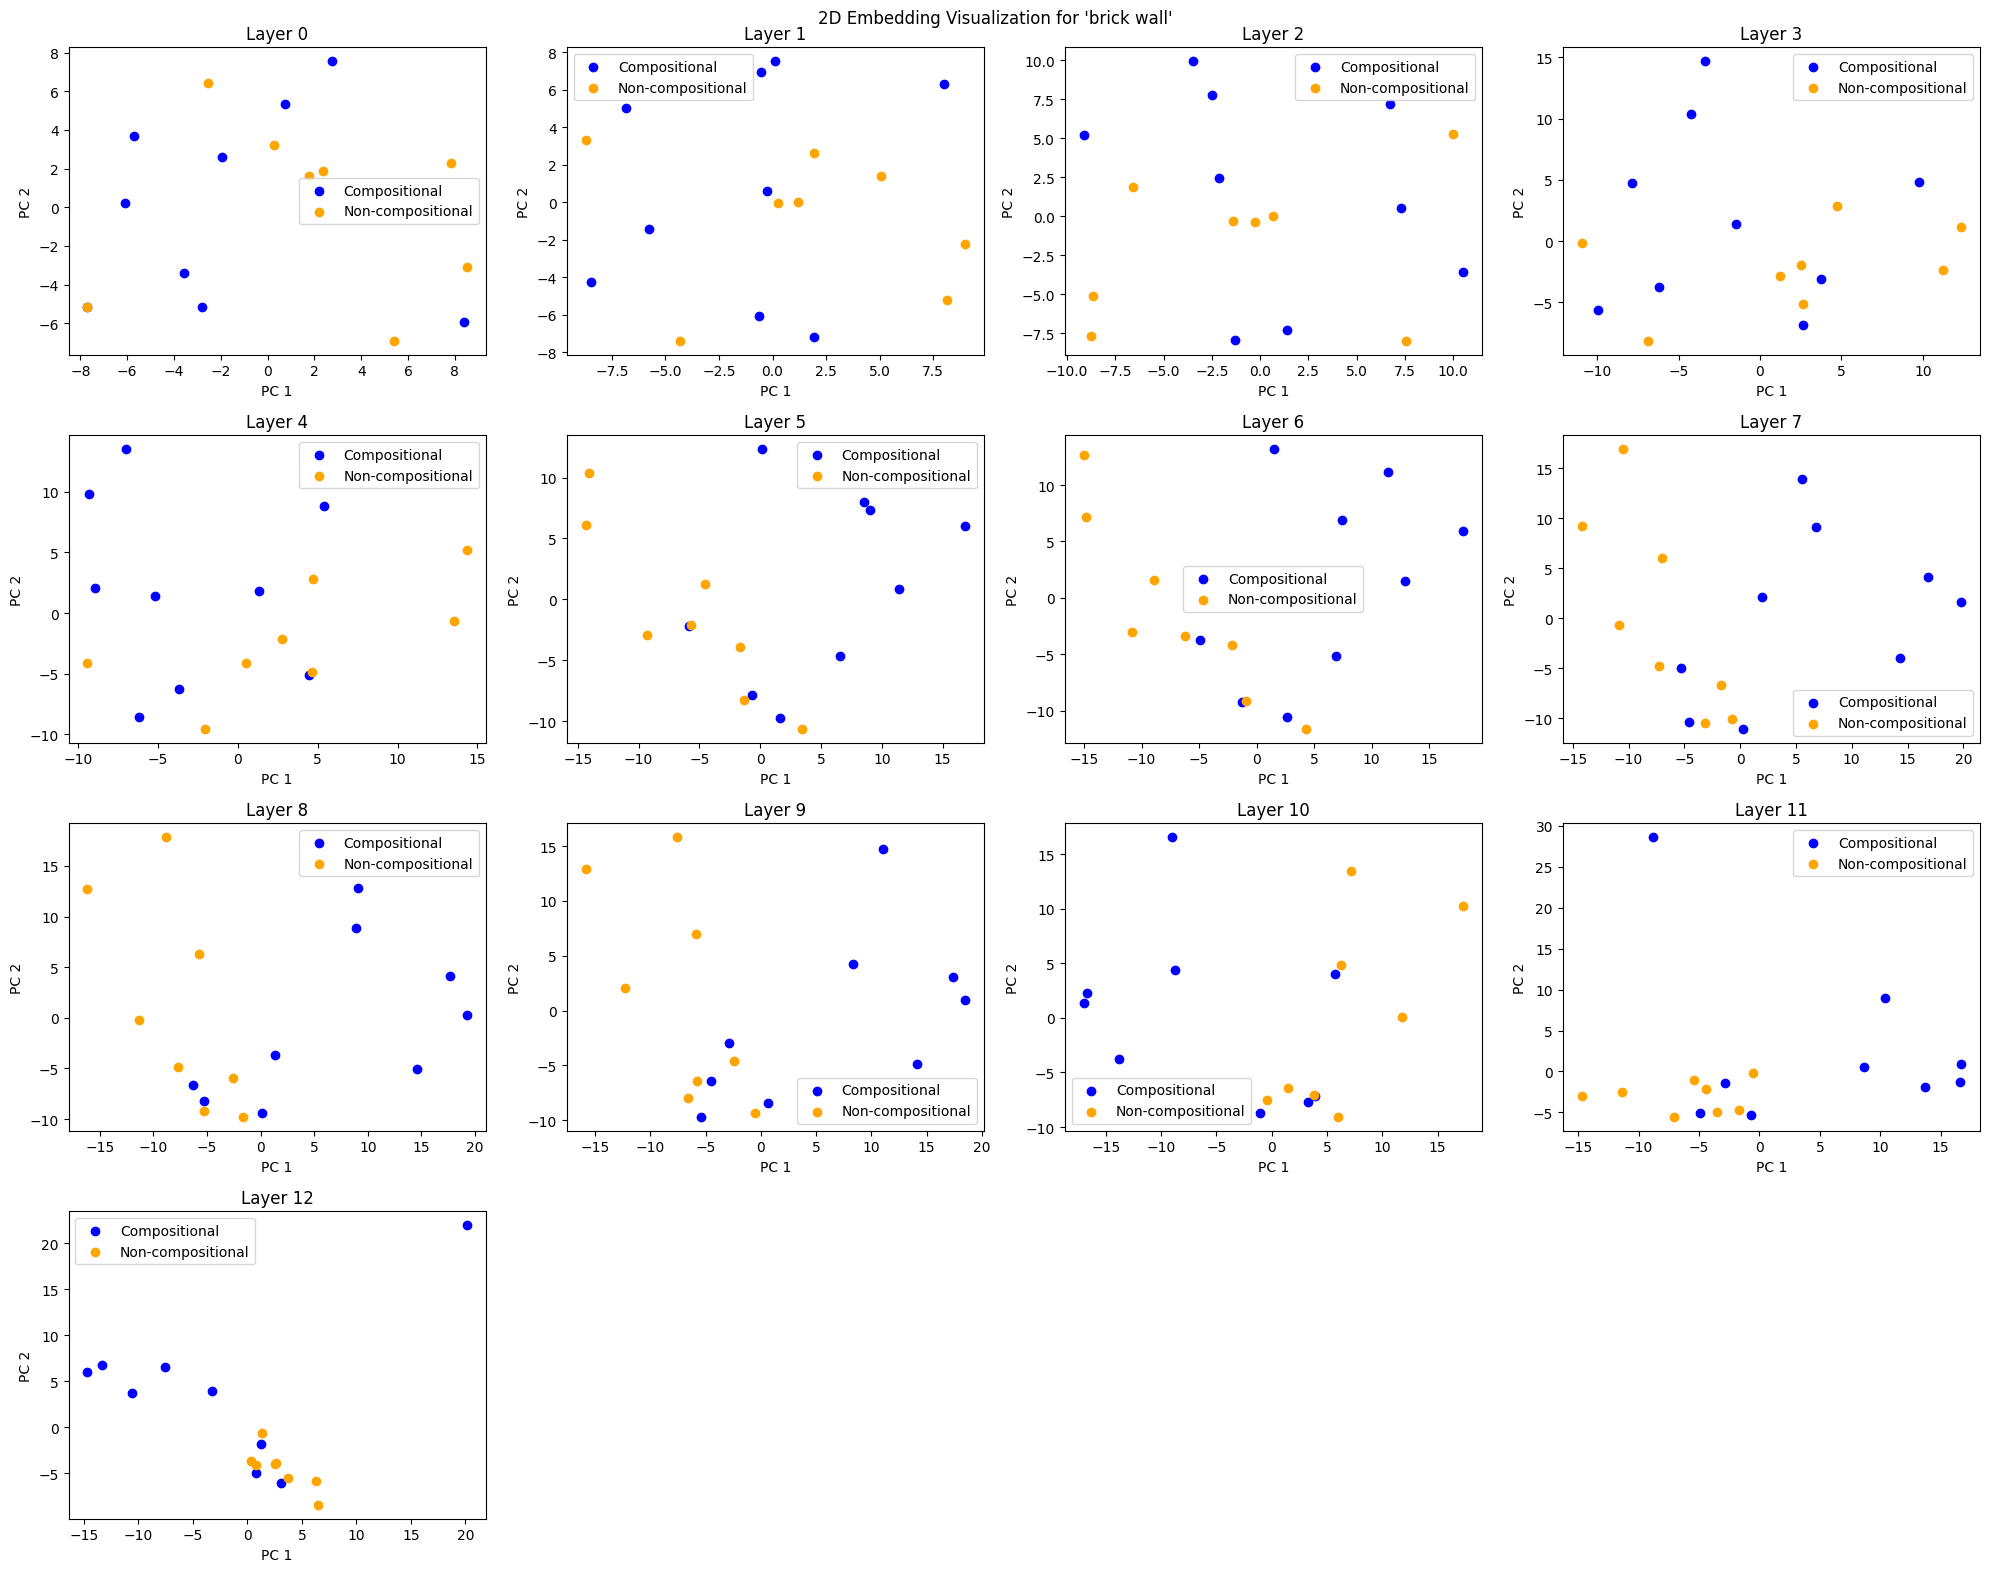

[closed book] Layer 0
Training accuracy: 53% => not linearly separable
[closed book] Layer 1
Training accuracy: 80% => not linearly separable
[closed book] Layer 2
Training accuracy: 87% => not linearly separable
[closed book] Layer 3
Training accuracy: 93% => not linearly separable
[closed book] Layer 4
Training accuracy: 93% => not linearly separable
[closed book] Layer 5
Training accuracy: 93% => not linearly separable
[closed book] Layer 6
Training accuracy: 87% => not linearly separable
[closed book] Layer 7
Training accuracy: 93% => not linearly separable
[closed book] Layer 8
Training accuracy: 80% => not linearly separable
[closed book] Layer 9
Training accuracy: 87% => not linearly separable
[closed book] Layer 10
Training accuracy: 60% => not linearly separable
[closed book] Layer 11
Training accuracy: 93% => not linearly separable
[closed book] Layer 12
Training accuracy: 80% => not linearly separable


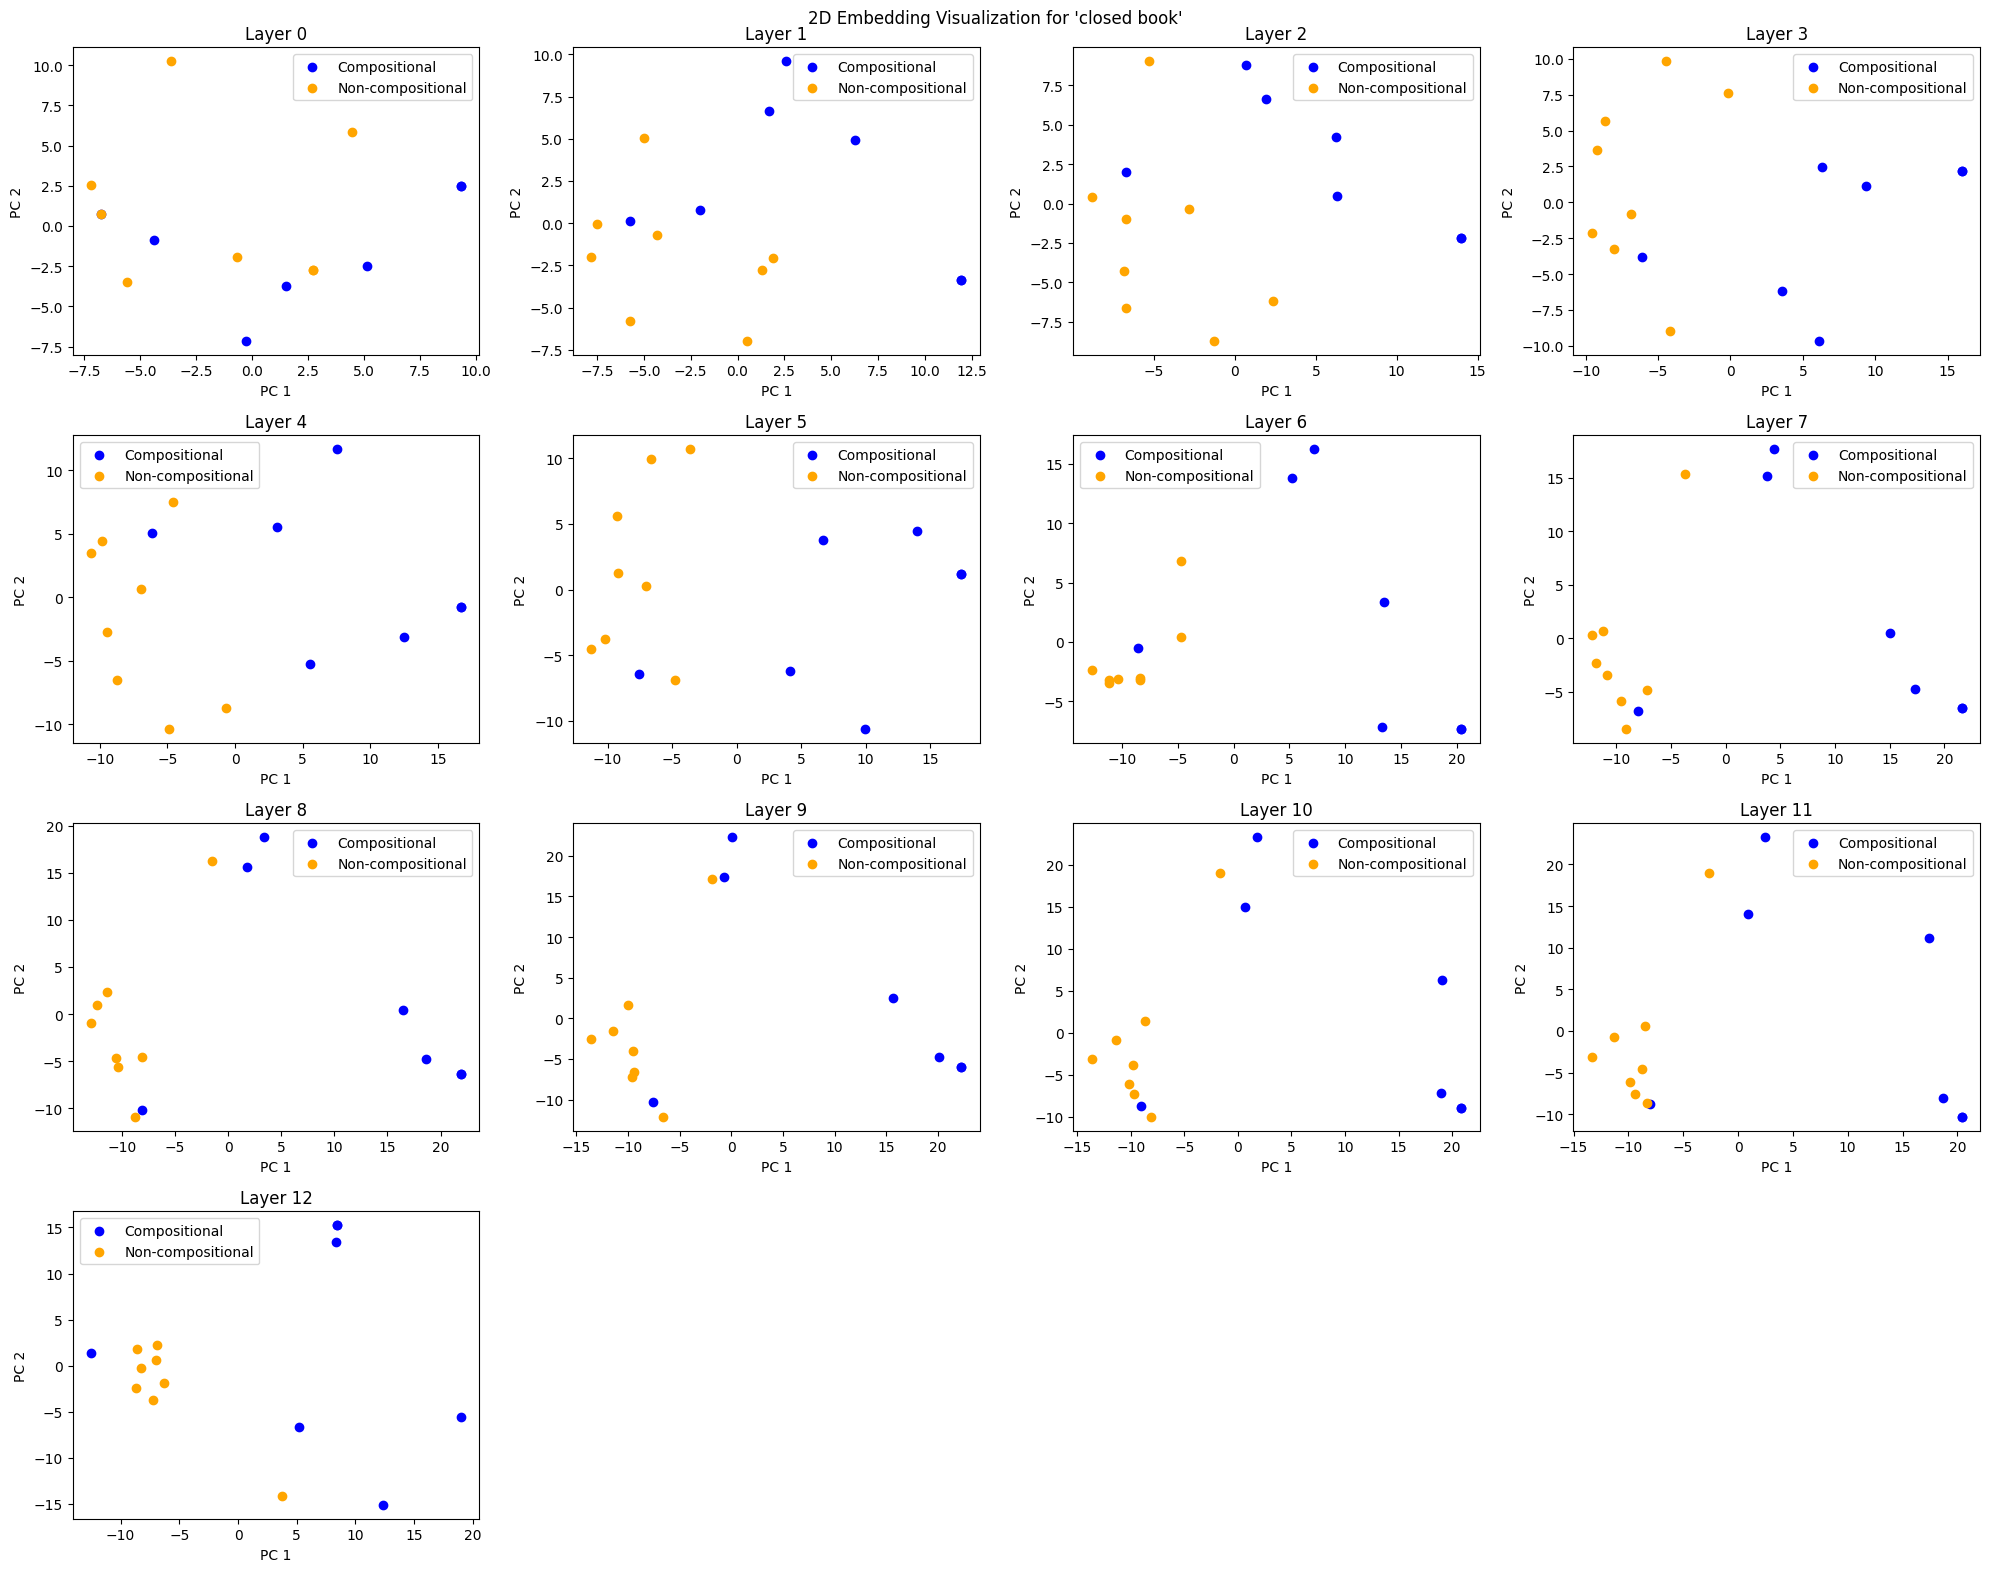

[cutting edge] Layer 0
Training accuracy: 61% => not linearly separable
[cutting edge] Layer 1
Training accuracy: 56% => not linearly separable
[cutting edge] Layer 2
Training accuracy: 67% => not linearly separable
[cutting edge] Layer 3
Training accuracy: 89% => not linearly separable
[cutting edge] Layer 4
Training accuracy: 89% => not linearly separable
[cutting edge] Layer 5
Training accuracy: 100% => linearly separable
[cutting edge] Layer 6
Training accuracy: 100% => linearly separable
[cutting edge] Layer 7
Training accuracy: 100% => linearly separable
[cutting edge] Layer 8
Training accuracy: 100% => linearly separable
[cutting edge] Layer 9
Training accuracy: 100% => linearly separable
[cutting edge] Layer 10
Training accuracy: 100% => linearly separable
[cutting edge] Layer 11
Training accuracy: 100% => linearly separable
[cutting edge] Layer 12
Training accuracy: 100% => linearly separable


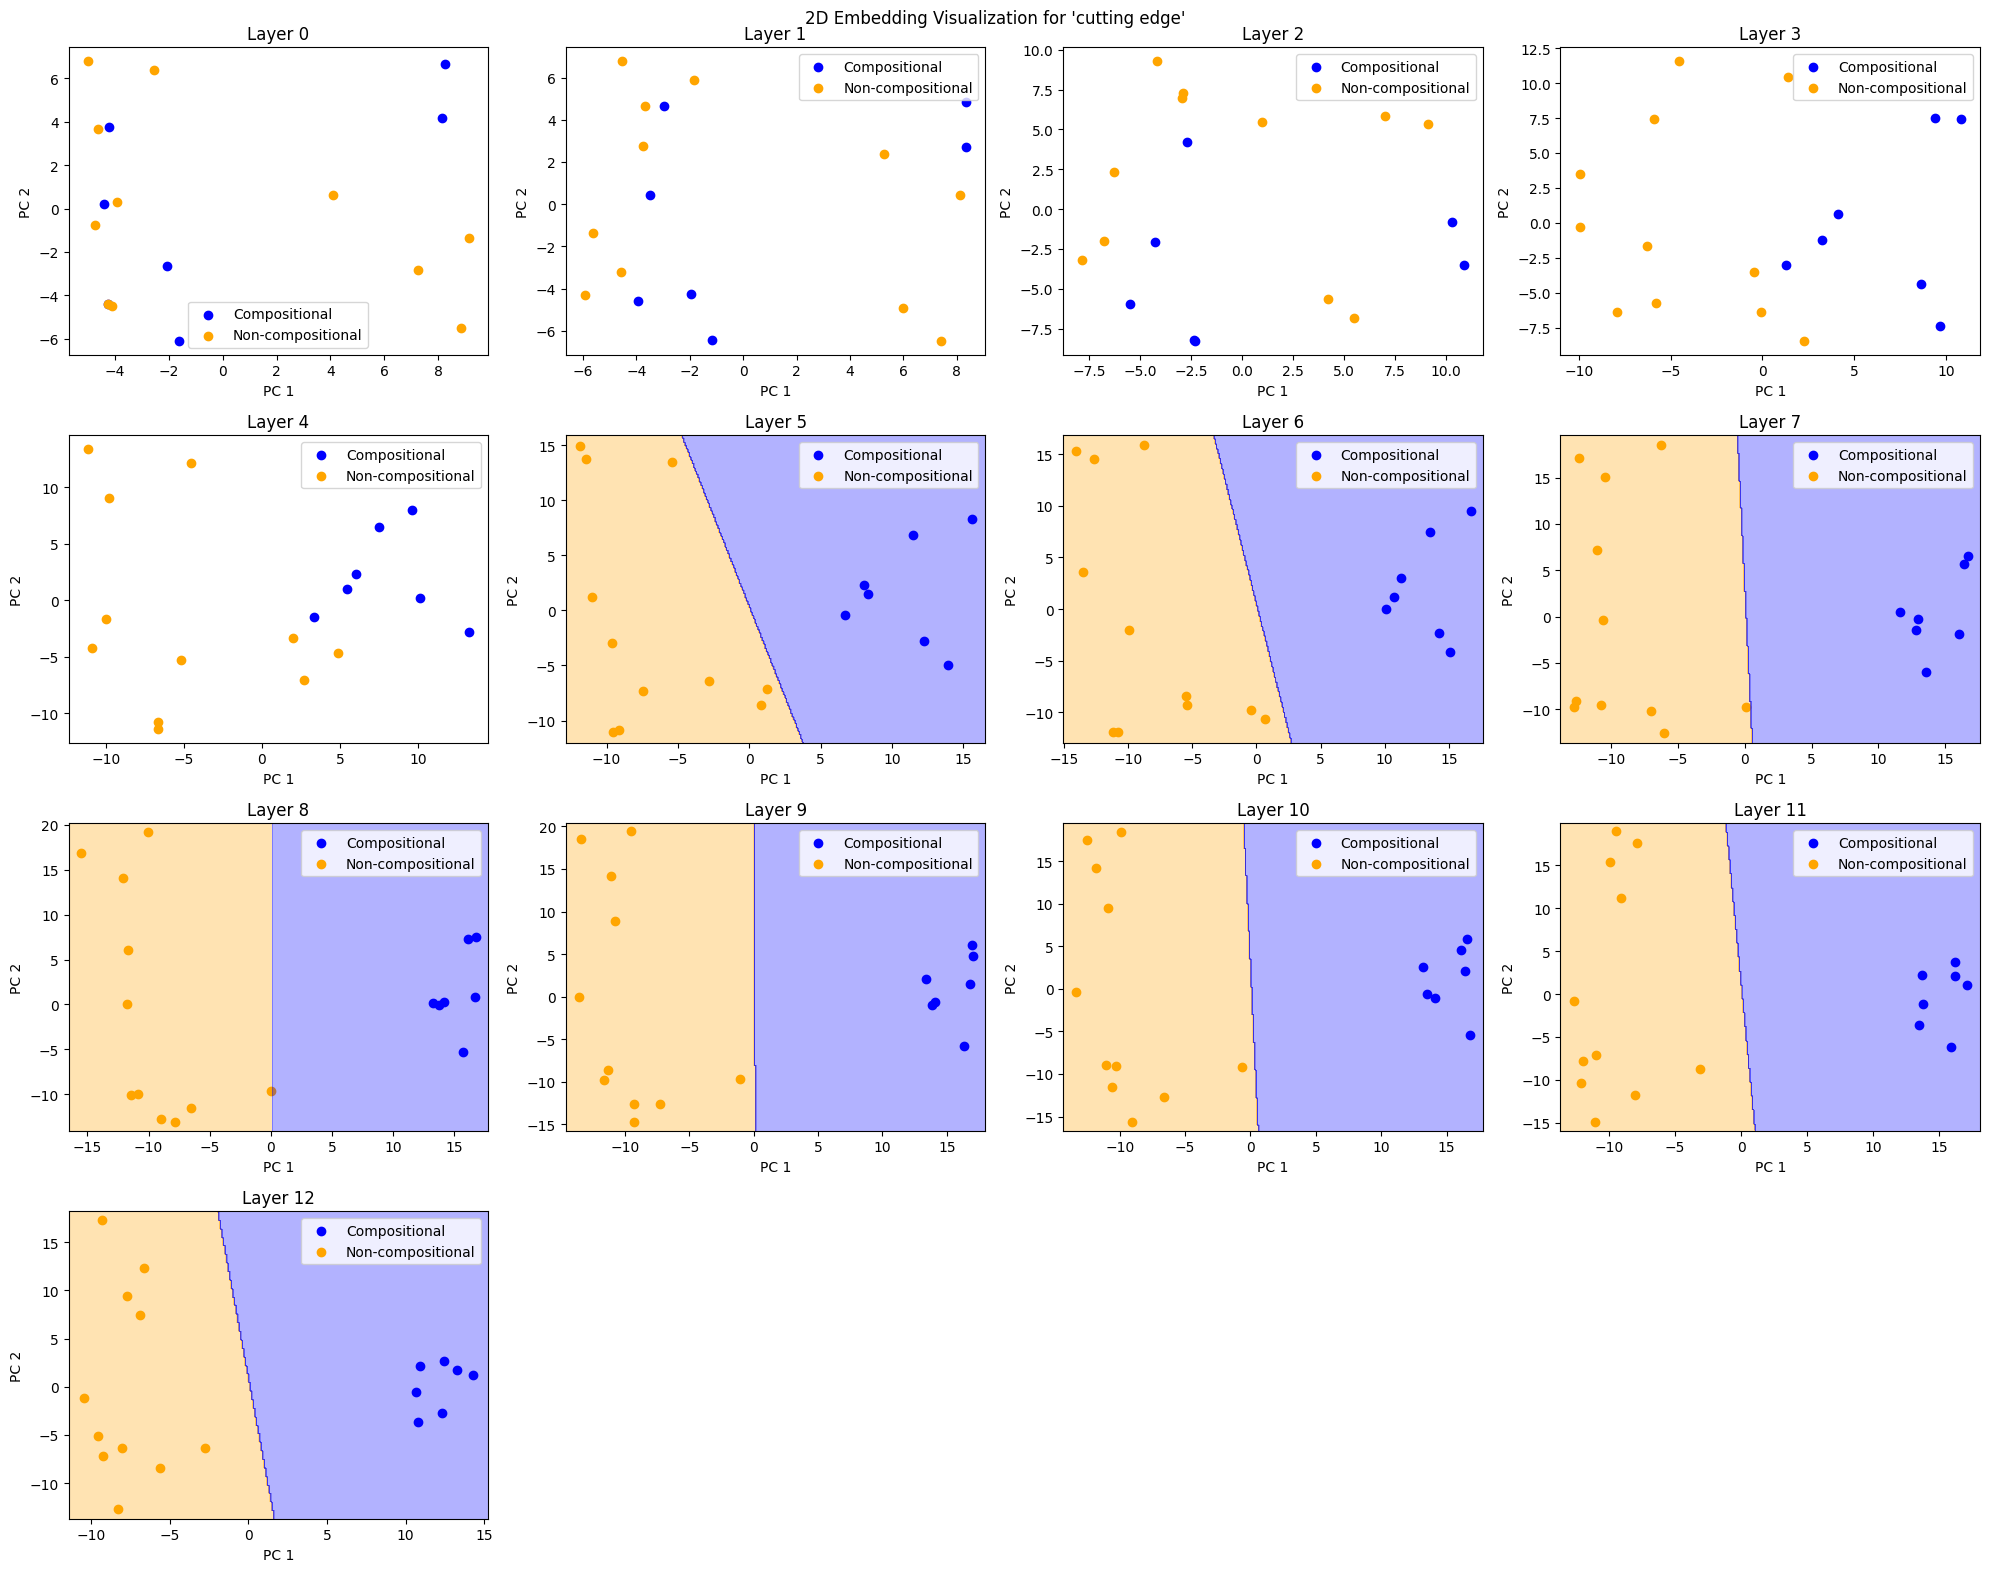

[dry land] Layer 0
Training accuracy: 76% => not linearly separable
[dry land] Layer 1
Training accuracy: 90% => not linearly separable
[dry land] Layer 2
Training accuracy: 71% => not linearly separable
[dry land] Layer 3
Training accuracy: 67% => not linearly separable
[dry land] Layer 4
Training accuracy: 90% => not linearly separable
[dry land] Layer 5
Training accuracy: 95% => not linearly separable
[dry land] Layer 6
Training accuracy: 100% => linearly separable
[dry land] Layer 7
Training accuracy: 100% => linearly separable
[dry land] Layer 8
Training accuracy: 100% => linearly separable
[dry land] Layer 9
Training accuracy: 100% => linearly separable
[dry land] Layer 10
Training accuracy: 95% => not linearly separable
[dry land] Layer 11
Training accuracy: 33% => not linearly separable
[dry land] Layer 12
Training accuracy: 100% => linearly separable


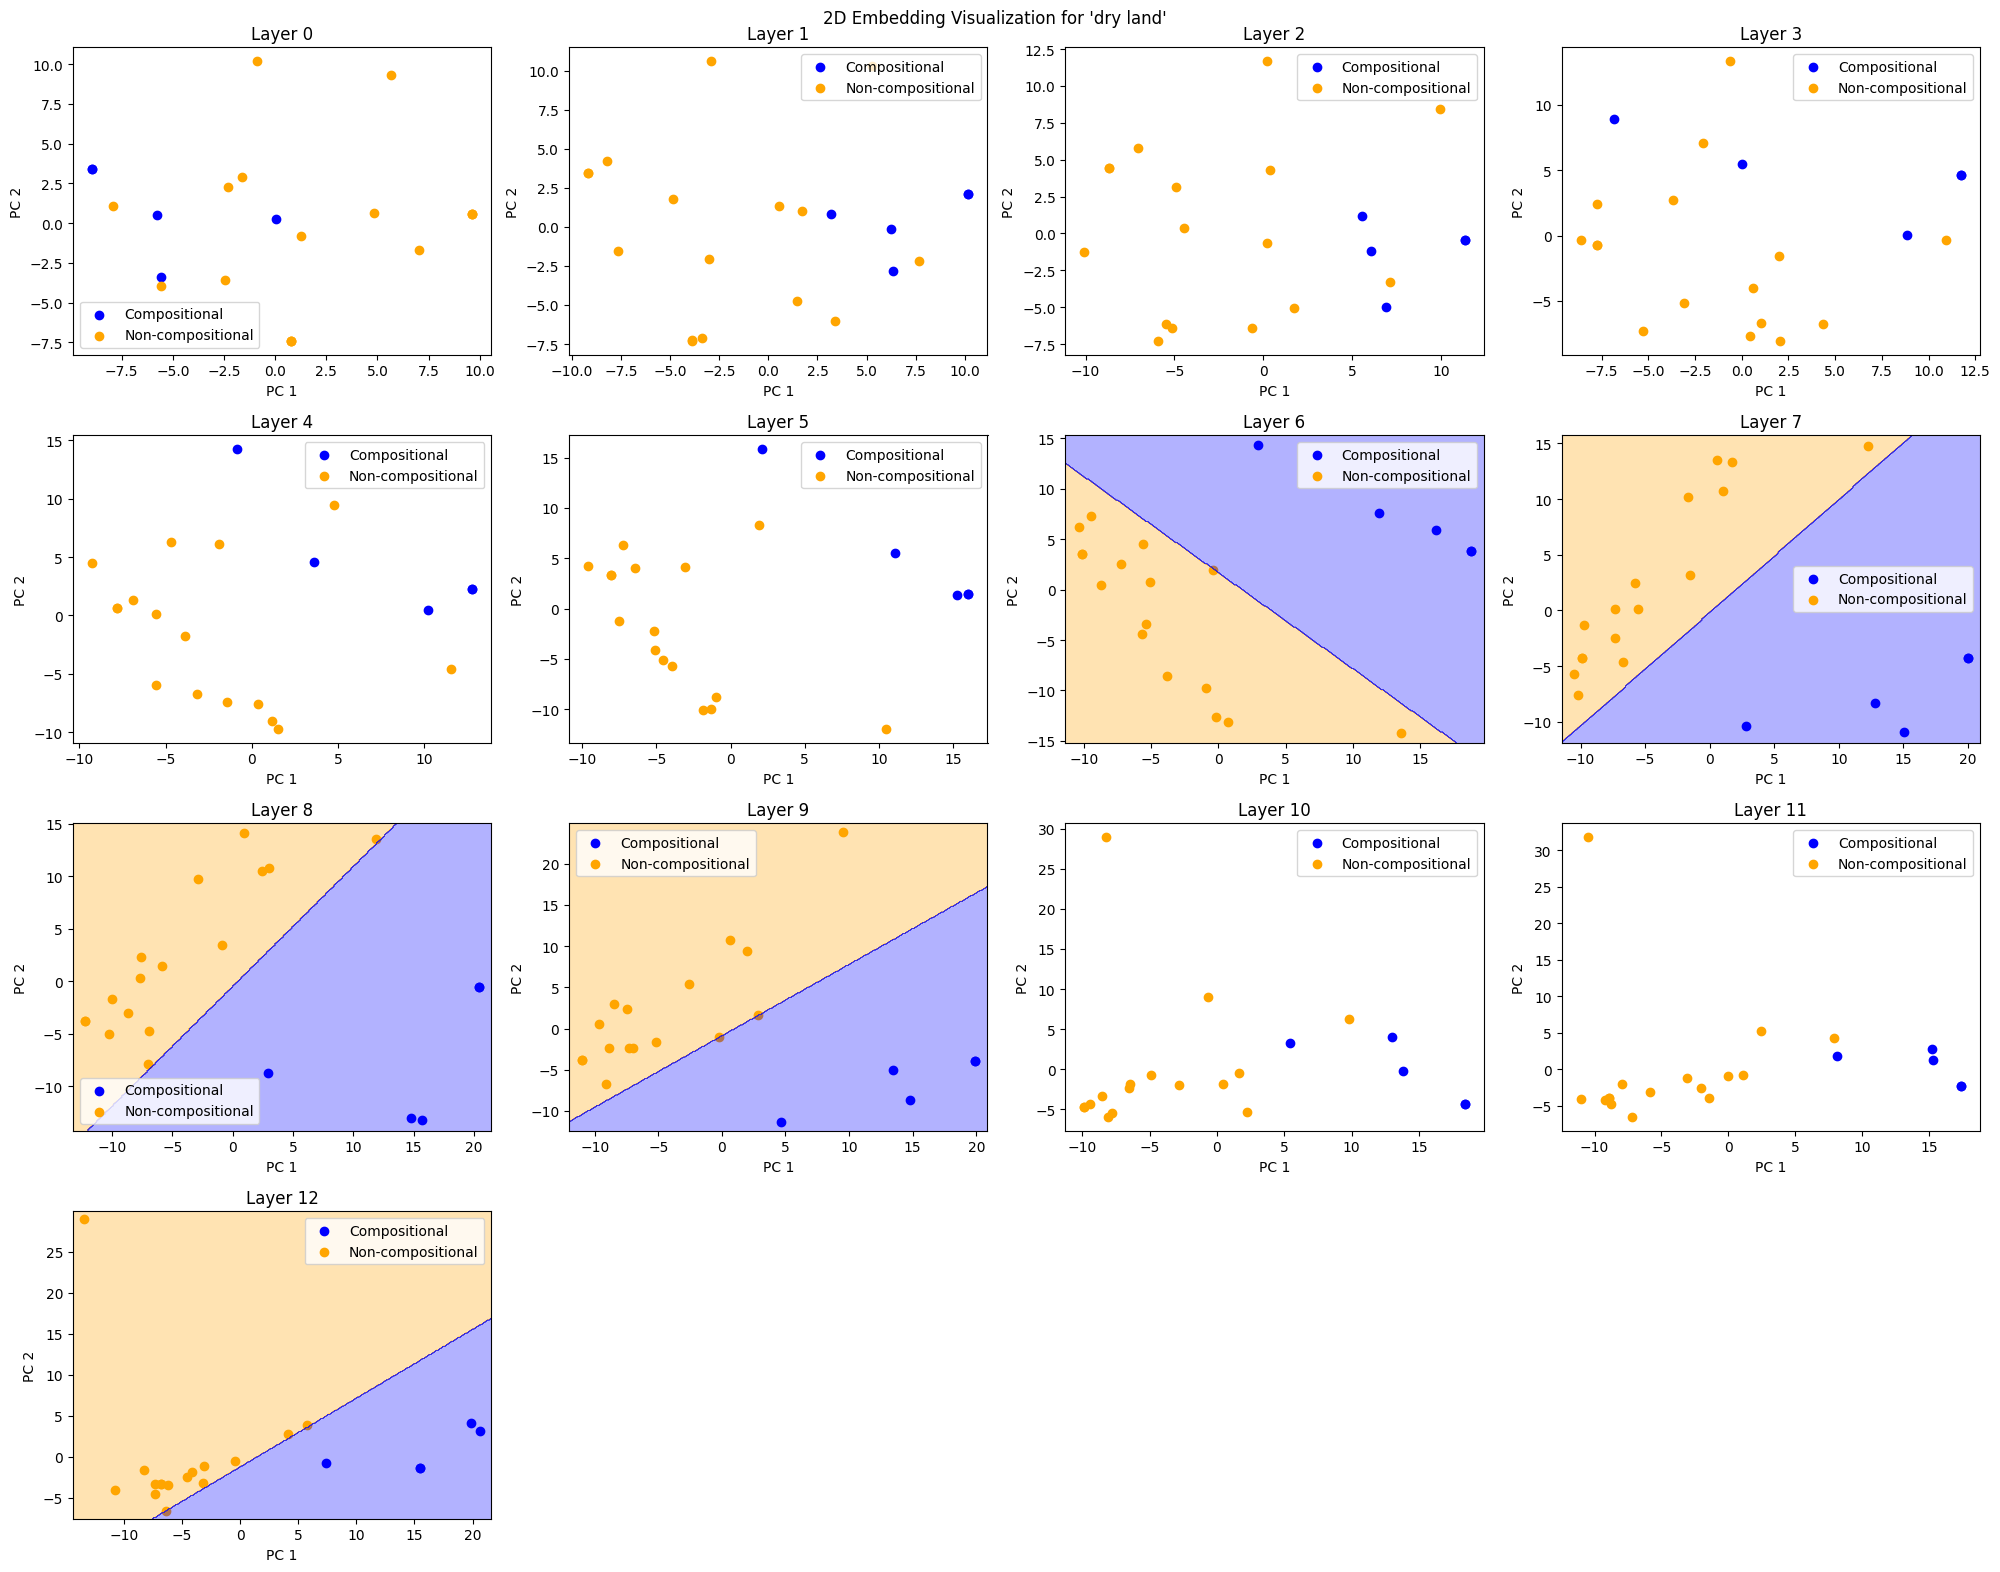

[fine line] Layer 0
Training accuracy: 46% => not linearly separable
[fine line] Layer 1
Training accuracy: 85% => not linearly separable
[fine line] Layer 2
Training accuracy: 85% => not linearly separable
[fine line] Layer 3
Training accuracy: 92% => not linearly separable
[fine line] Layer 4
Training accuracy: 92% => not linearly separable
[fine line] Layer 5
Training accuracy: 100% => linearly separable
[fine line] Layer 6
Training accuracy: 100% => linearly separable
[fine line] Layer 7
Training accuracy: 100% => linearly separable
[fine line] Layer 8
Training accuracy: 100% => linearly separable
[fine line] Layer 9
Training accuracy: 100% => linearly separable
[fine line] Layer 10
Training accuracy: 100% => linearly separable
[fine line] Layer 11
Training accuracy: 100% => linearly separable
[fine line] Layer 12
Training accuracy: 100% => linearly separable


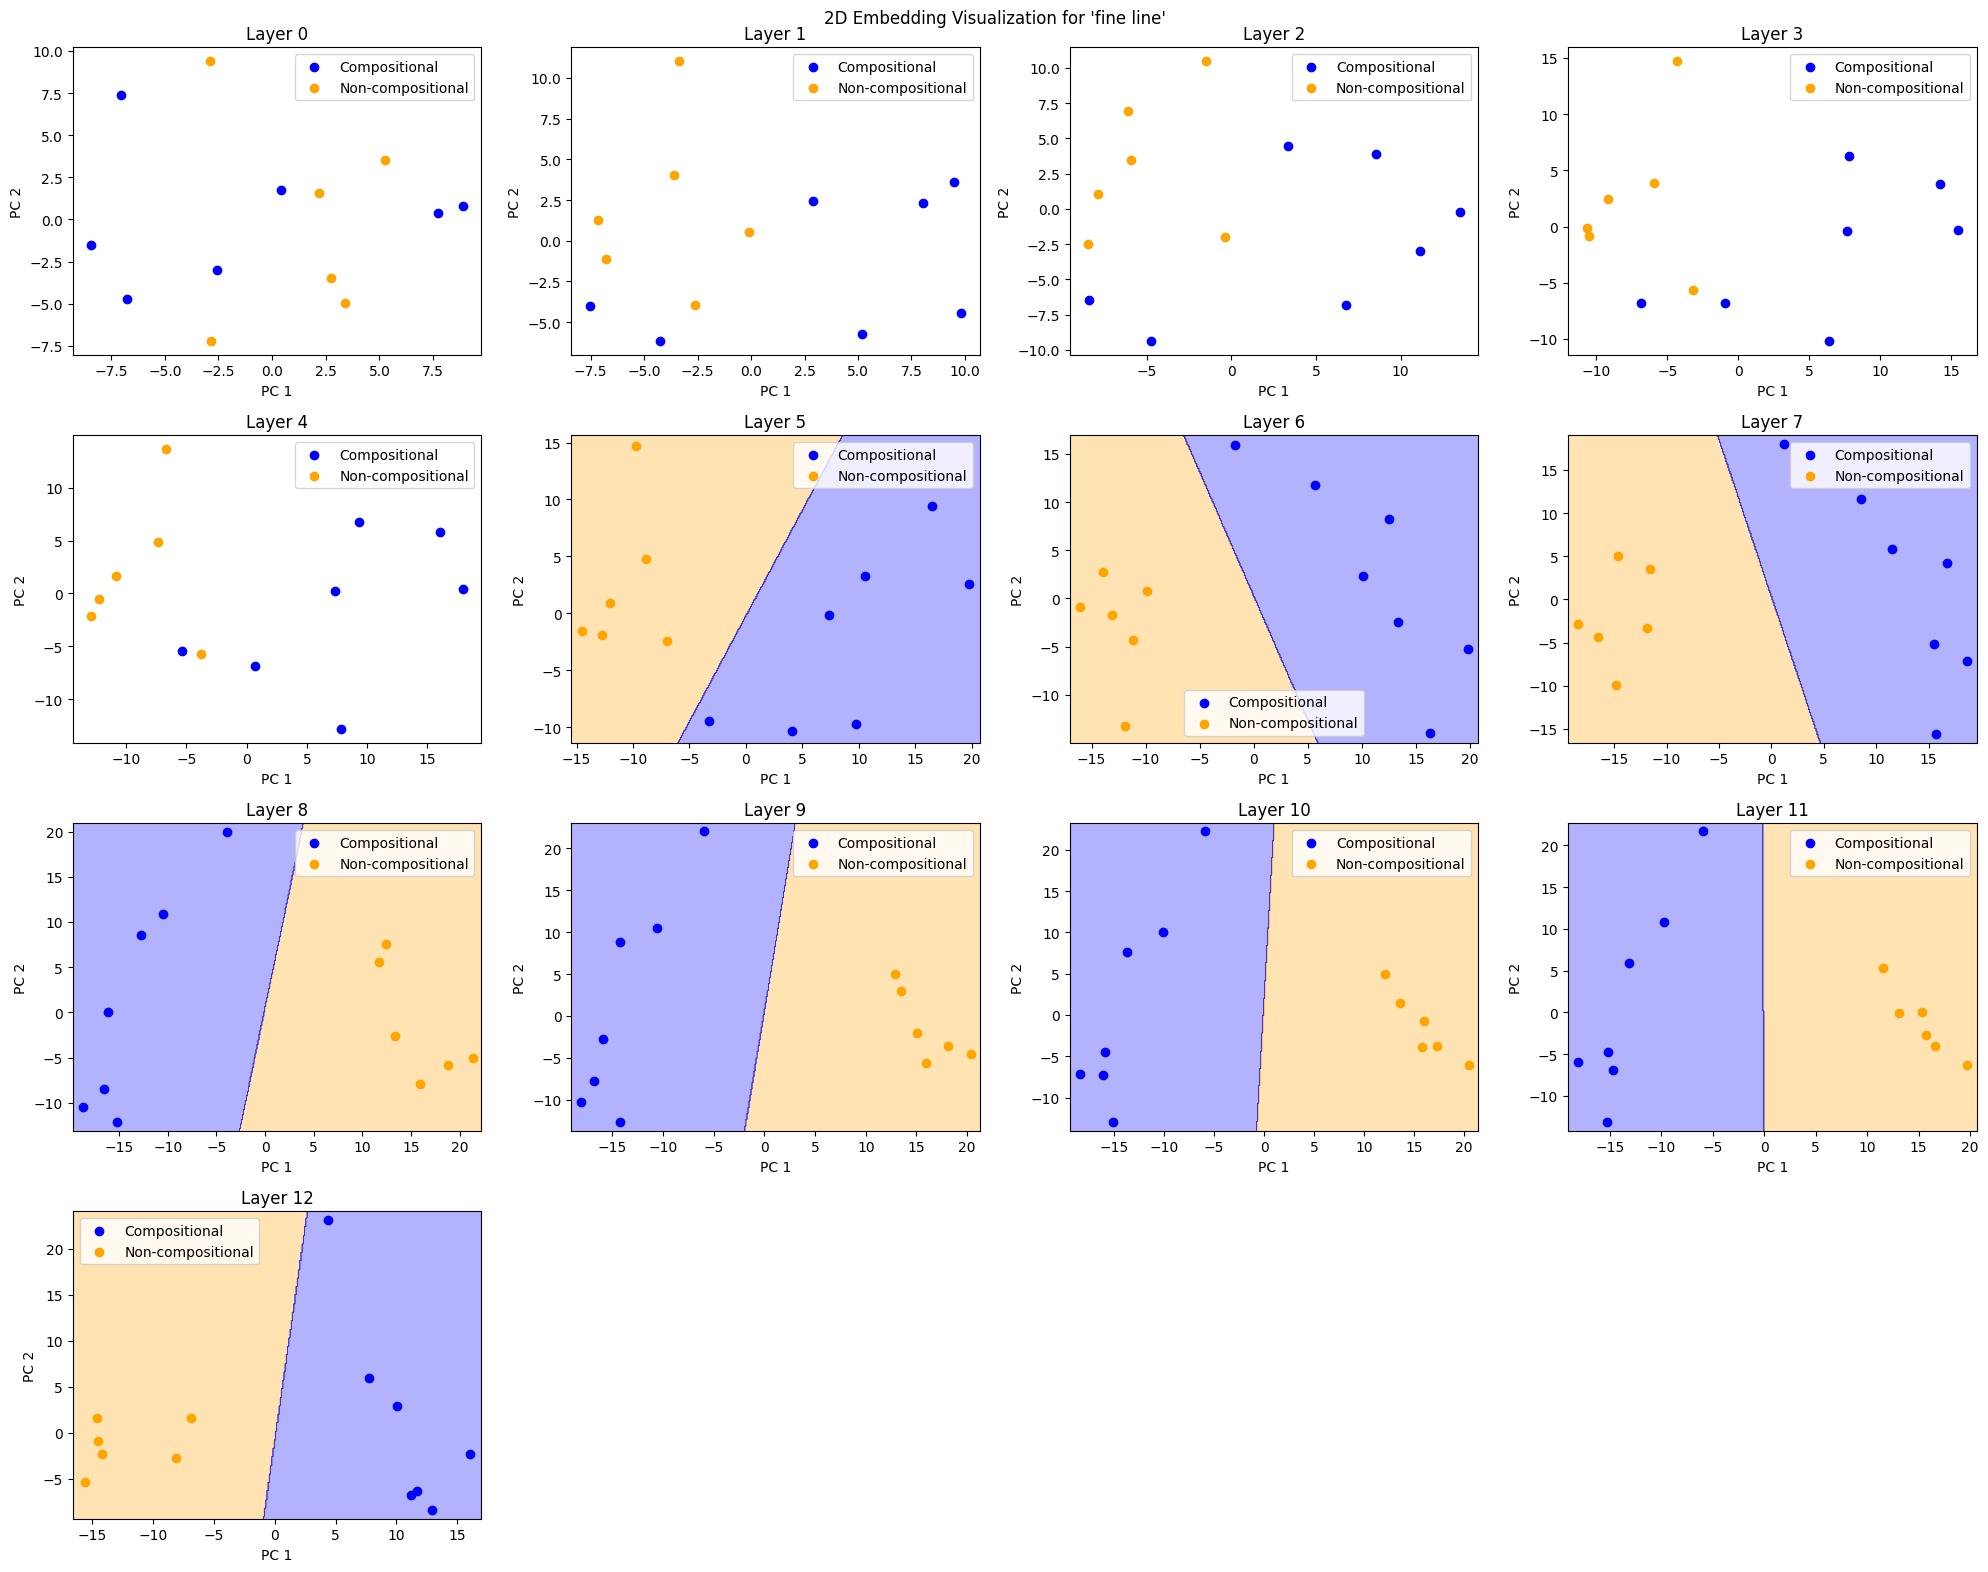

[gold mine] Layer 0
Training accuracy: 59% => not linearly separable
[gold mine] Layer 1
Training accuracy: 94% => not linearly separable
[gold mine] Layer 2
Training accuracy: 94% => not linearly separable
[gold mine] Layer 3
Training accuracy: 100% => linearly separable
[gold mine] Layer 4
Training accuracy: 94% => not linearly separable
[gold mine] Layer 5
Training accuracy: 100% => linearly separable
[gold mine] Layer 6
Training accuracy: 100% => linearly separable
[gold mine] Layer 7
Training accuracy: 100% => linearly separable
[gold mine] Layer 8
Training accuracy: 100% => linearly separable
[gold mine] Layer 9
Training accuracy: 100% => linearly separable
[gold mine] Layer 10
Training accuracy: 100% => linearly separable
[gold mine] Layer 11
Training accuracy: 100% => linearly separable
[gold mine] Layer 12
Training accuracy: 100% => linearly separable


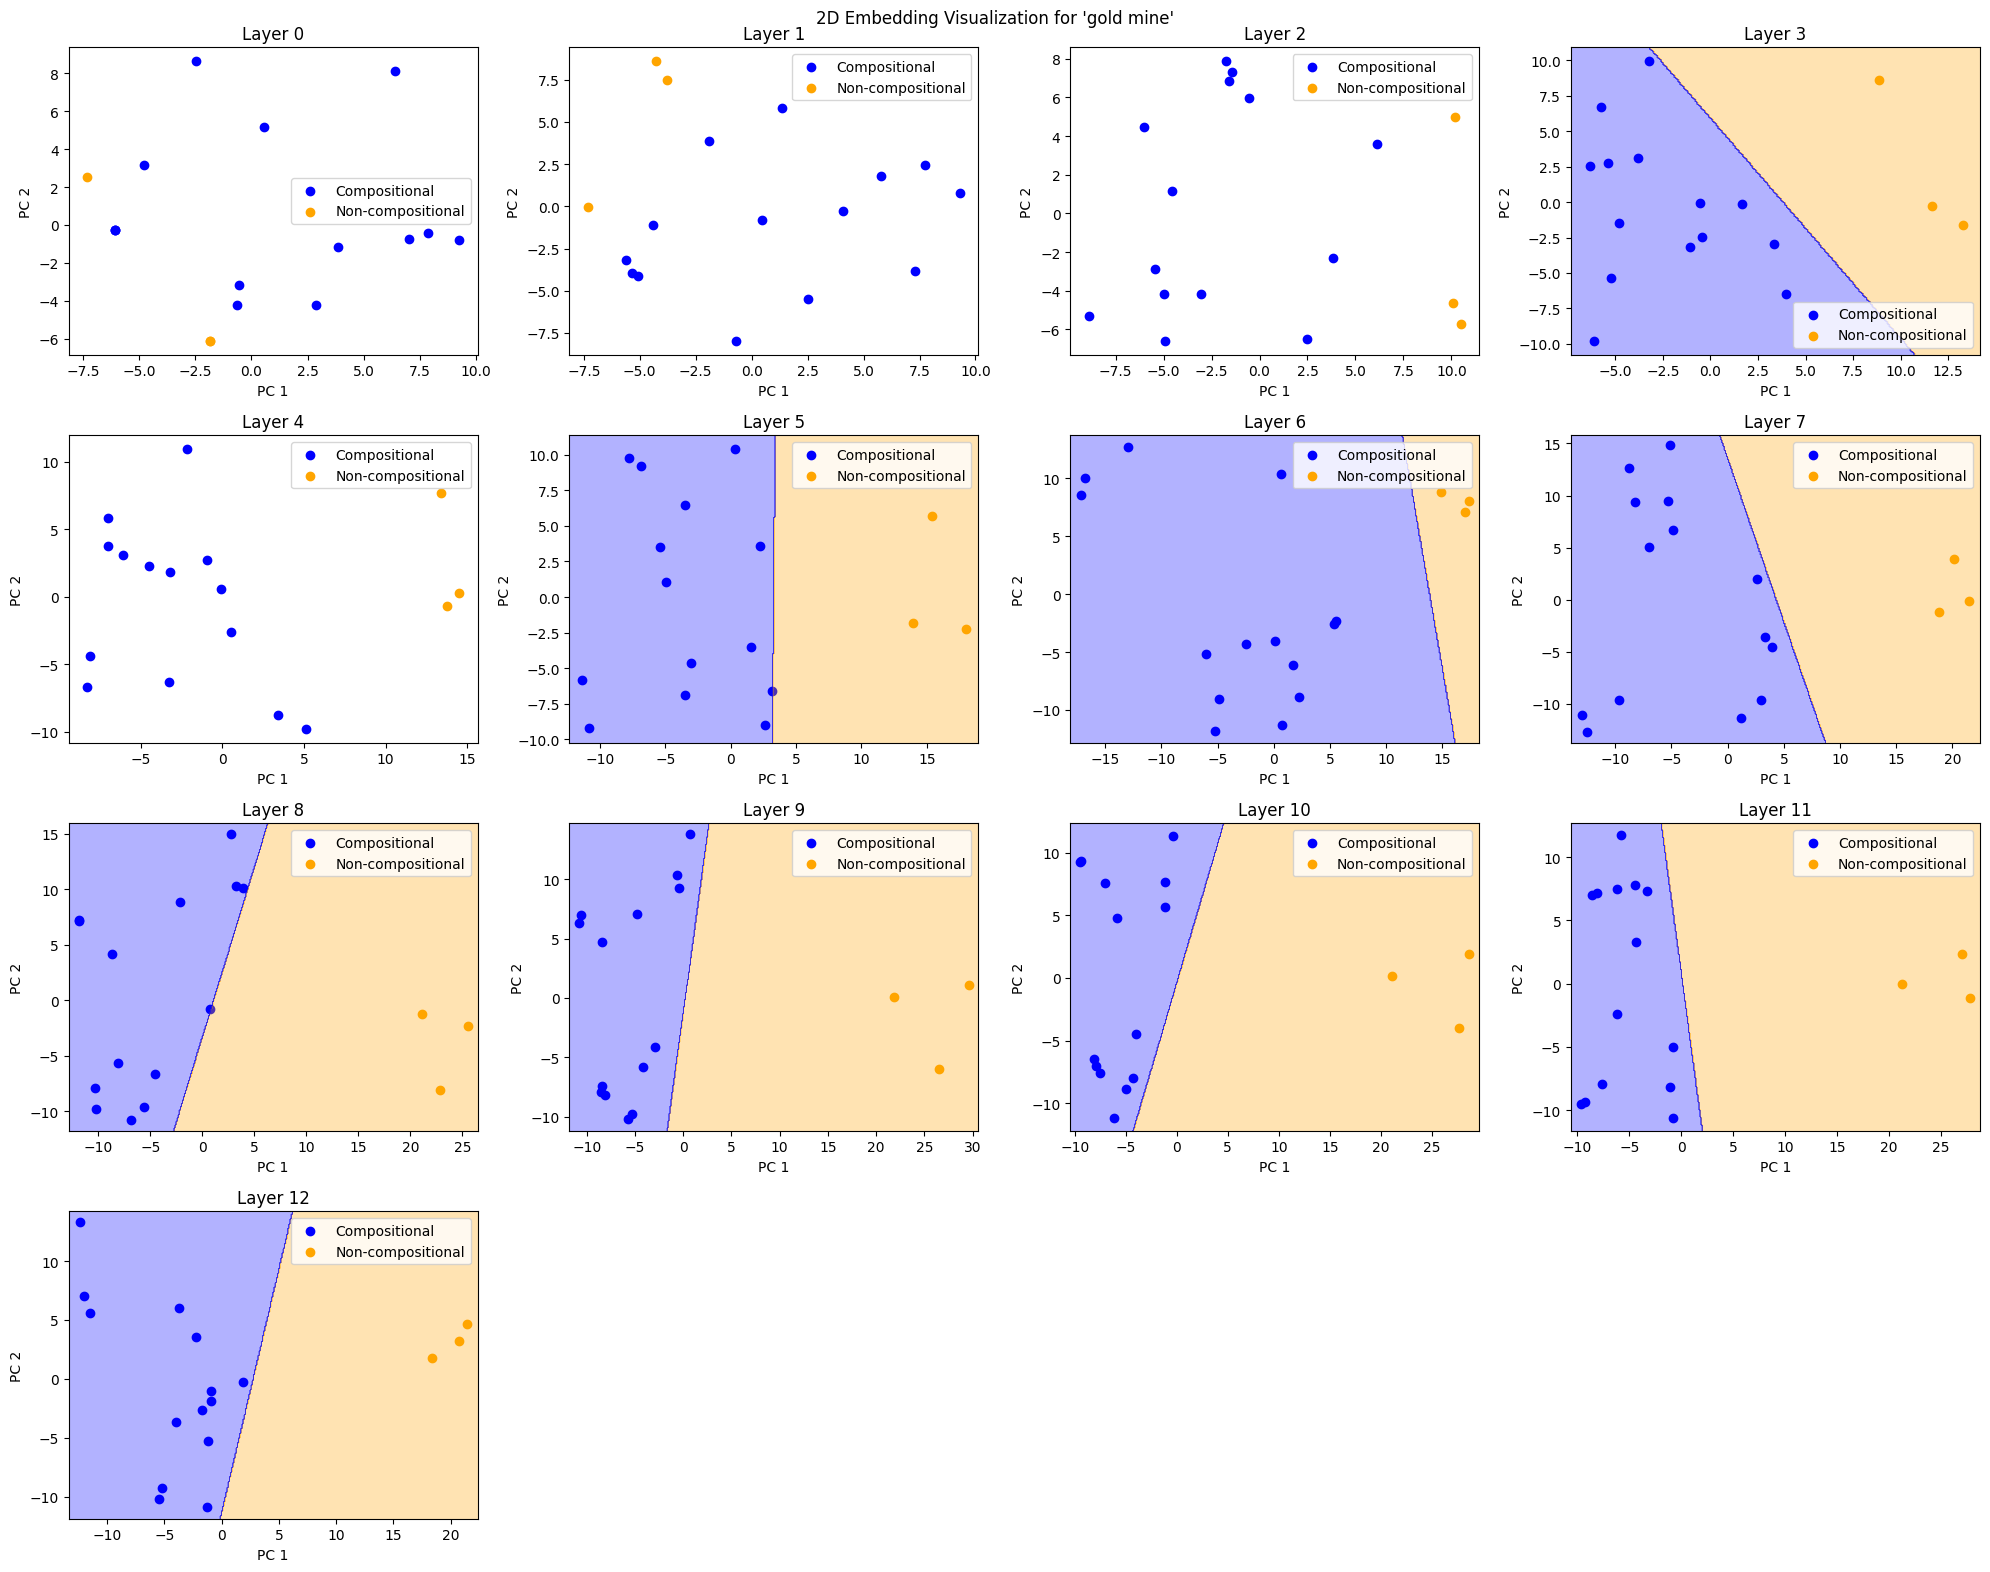

[ground floor] Layer 0
Training accuracy: 65% => not linearly separable
[ground floor] Layer 1
Training accuracy: 78% => not linearly separable
[ground floor] Layer 2
Training accuracy: 52% => not linearly separable
[ground floor] Layer 3
Training accuracy: 65% => not linearly separable
[ground floor] Layer 4
Training accuracy: 91% => not linearly separable
[ground floor] Layer 5
Training accuracy: 87% => not linearly separable
[ground floor] Layer 6
Training accuracy: 78% => not linearly separable
[ground floor] Layer 7
Training accuracy: 87% => not linearly separable
[ground floor] Layer 8
Training accuracy: 74% => not linearly separable
[ground floor] Layer 9
Training accuracy: 91% => not linearly separable
[ground floor] Layer 10
Training accuracy: 87% => not linearly separable
[ground floor] Layer 11
Training accuracy: 83% => not linearly separable
[ground floor] Layer 12
Training accuracy: 83% => not linearly separable


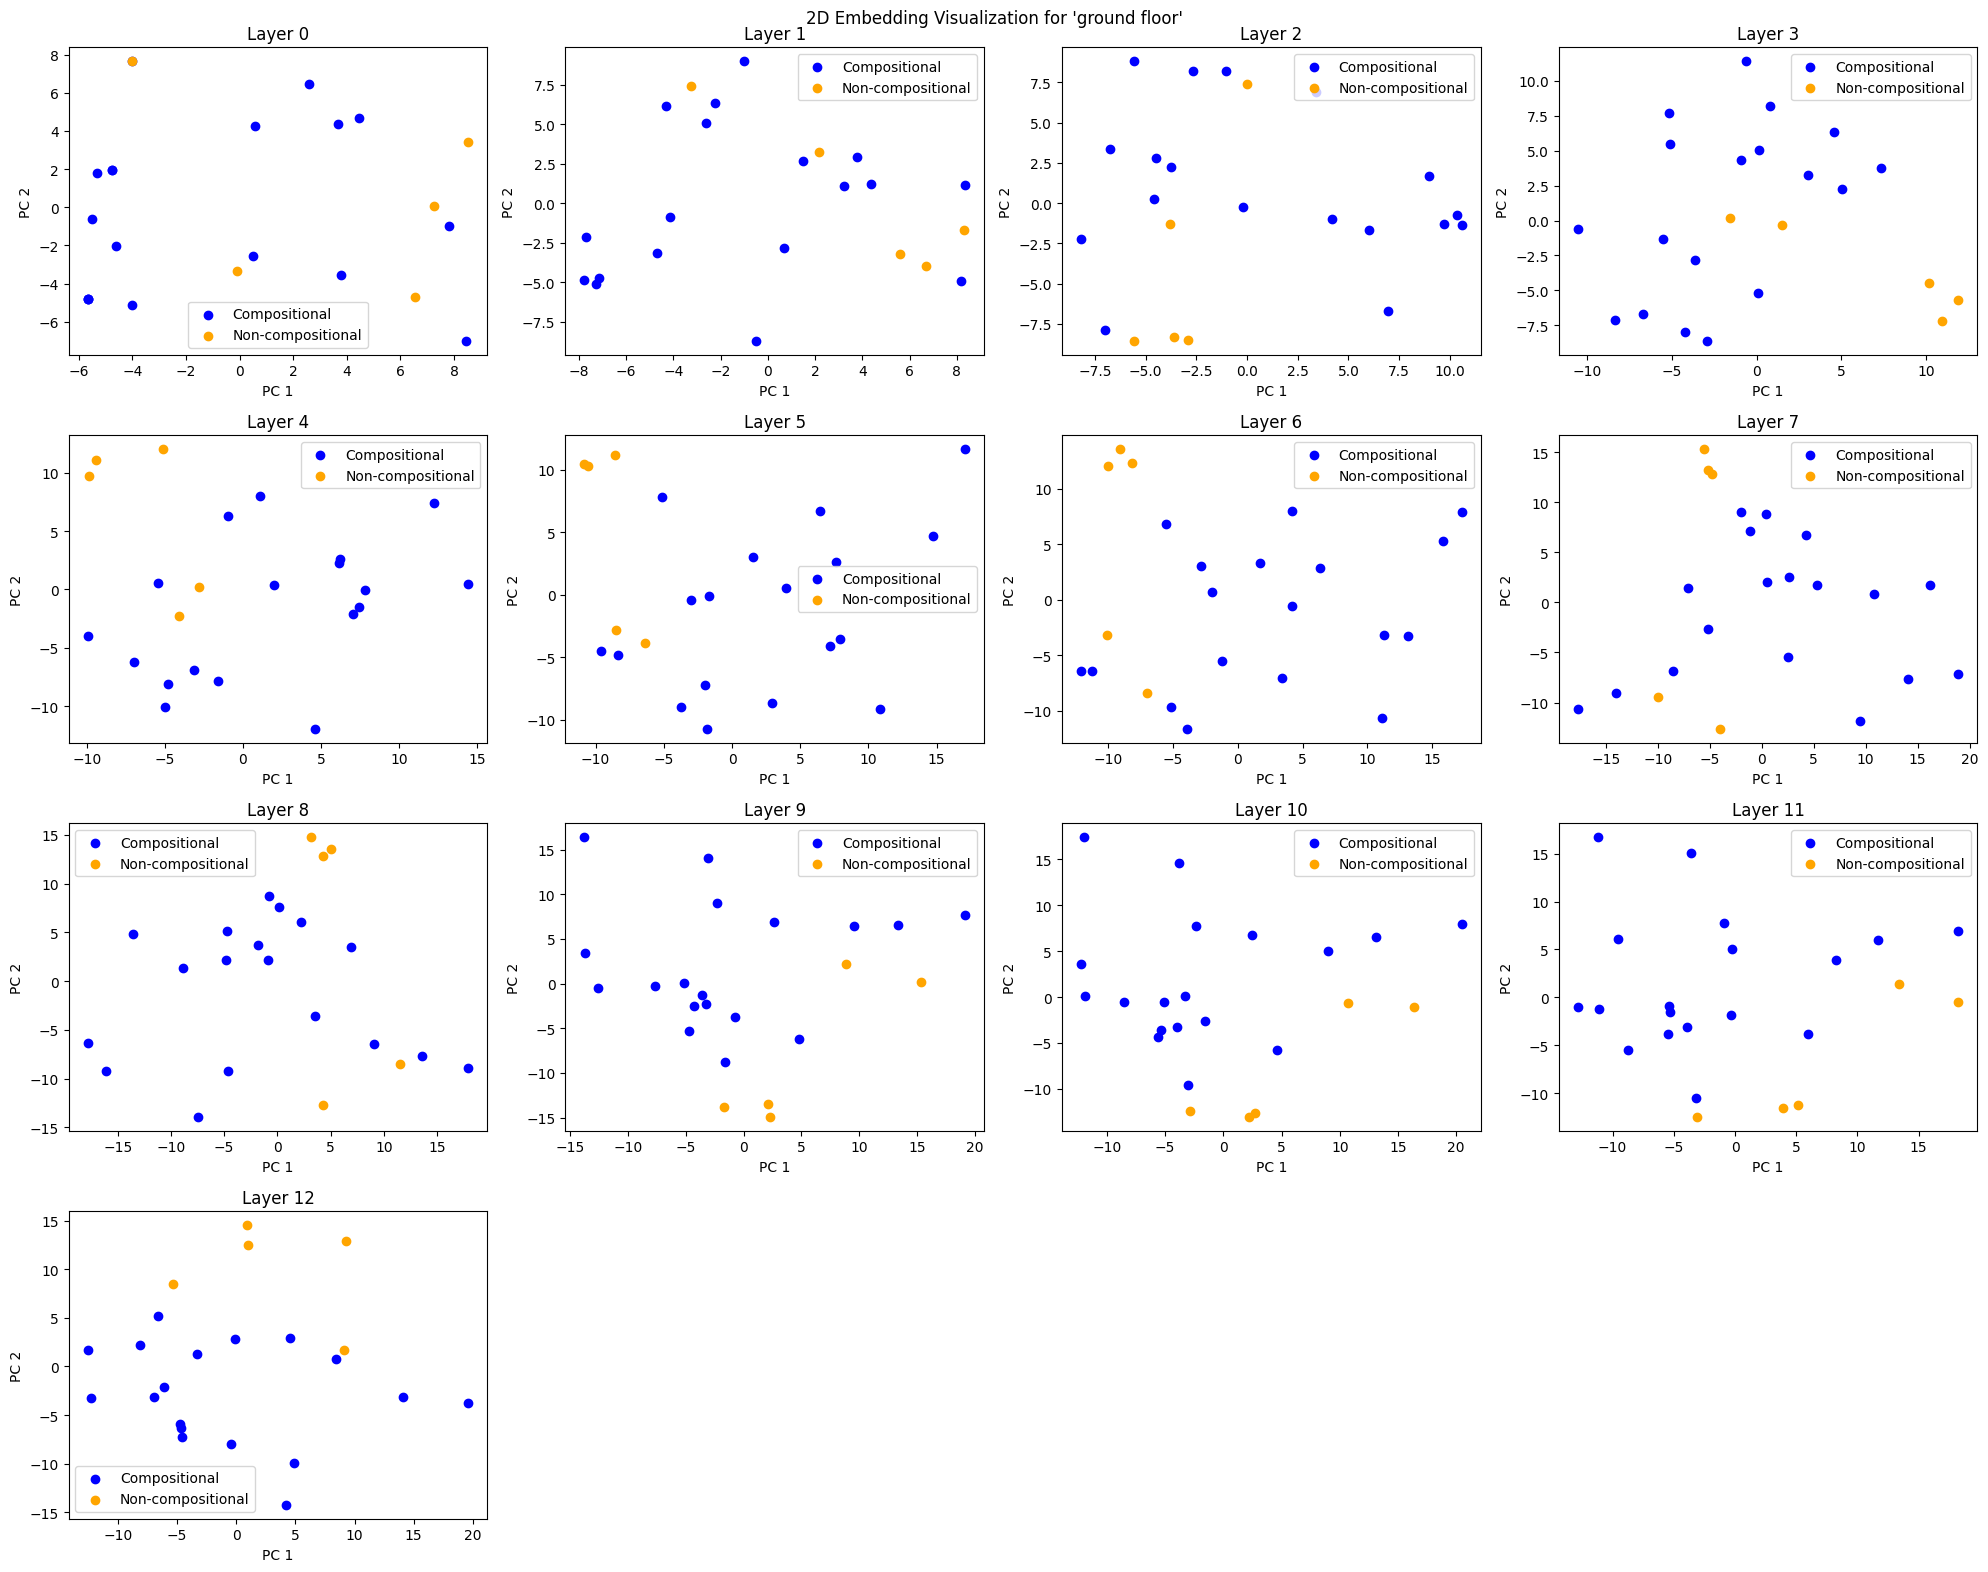

[rocket science] Layer 0
Training accuracy: 73% => not linearly separable
[rocket science] Layer 1
Training accuracy: 67% => not linearly separable
[rocket science] Layer 2
Training accuracy: 87% => not linearly separable
[rocket science] Layer 3
Training accuracy: 100% => linearly separable
[rocket science] Layer 4
Training accuracy: 100% => linearly separable
[rocket science] Layer 5
Training accuracy: 100% => linearly separable
[rocket science] Layer 6
Training accuracy: 100% => linearly separable
[rocket science] Layer 7
Training accuracy: 100% => linearly separable
[rocket science] Layer 8
Training accuracy: 100% => linearly separable
[rocket science] Layer 9
Training accuracy: 100% => linearly separable
[rocket science] Layer 10
Training accuracy: 100% => linearly separable
[rocket science] Layer 11
Training accuracy: 100% => linearly separable
[rocket science] Layer 12
Training accuracy: 100% => linearly separable


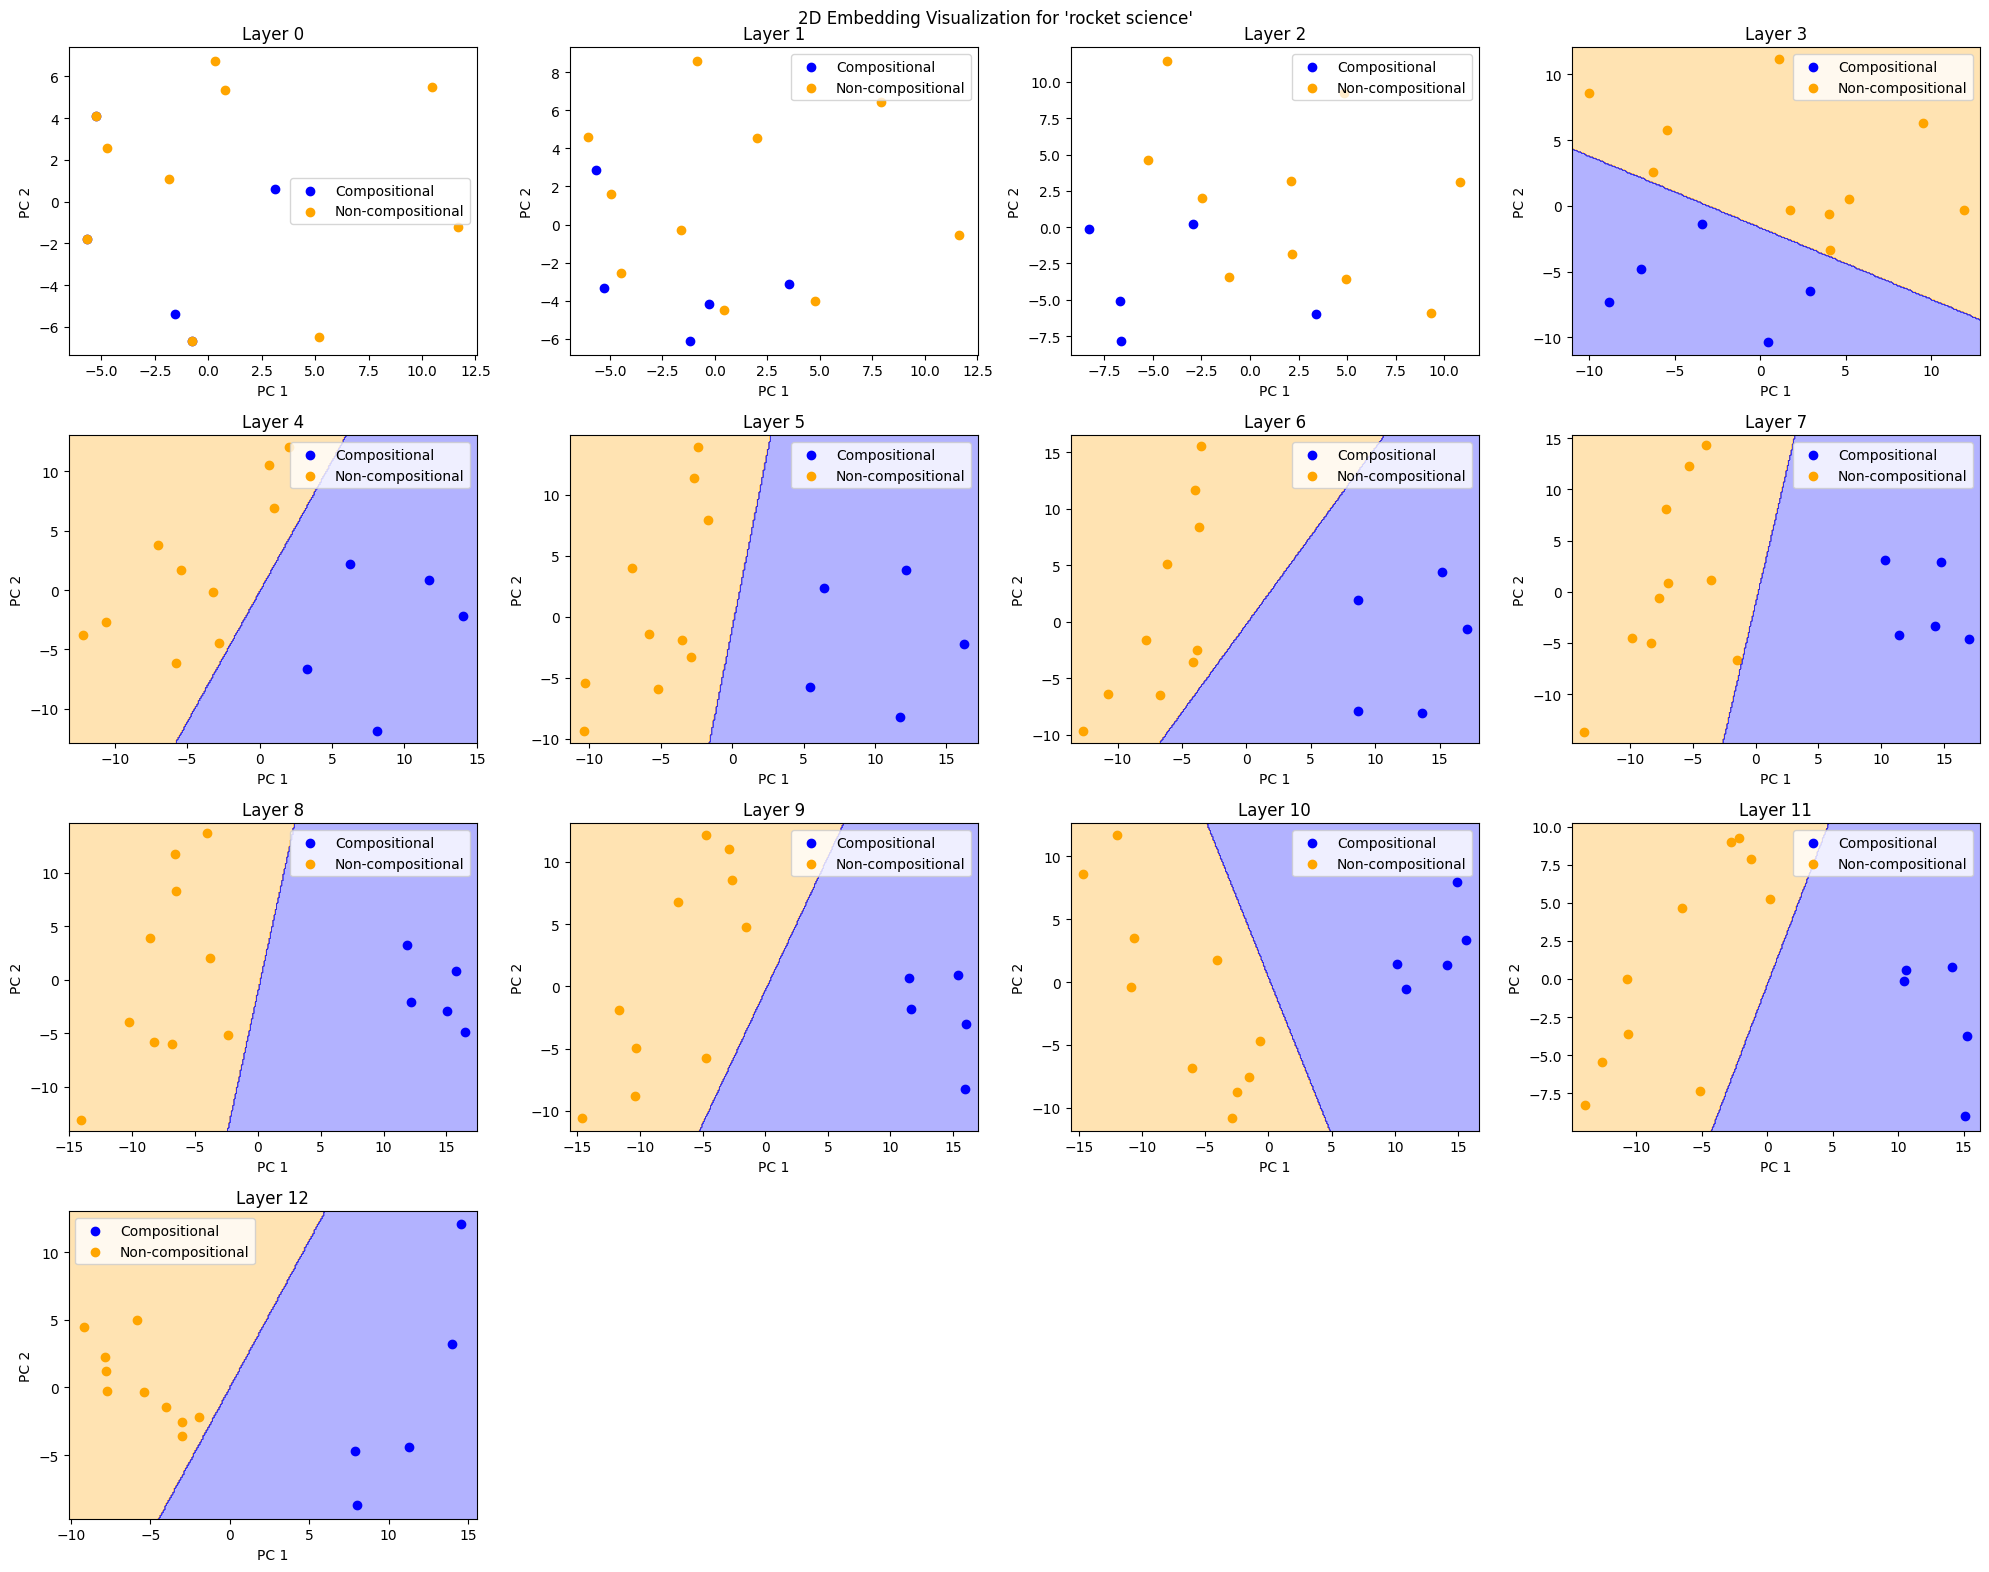

In [5]:
all_accuracies = {}

for mwe in pair_df.index:
    acc = plot_decision_boundary_all_layers(mwe, data_df, tokenizer, model)
    all_accuracies[mwe] = acc


In [6]:


# Convert dict to DataFrame
df_accuracies = pd.DataFrame.from_dict(all_accuracies, orient="index")
df_accuracies.columns = [f"Layer_{i}" for i in range(len(df_accuracies.columns))]
df_accuracies.to_csv("multibert_all_accuracies.csv")

# Load from CSV
df_loaded = pd.read_csv("multibert_all_accuracies.csv", index_col=0)

# Convert back to dict format (with lists)
all_accuracies_loaded = df_loaded.to_dict(orient="index")
all_accuracies_loaded = {k: list(v.values()) for k, v in all_accuracies_loaded.items()}

latex_code = generate_latex_table(all_accuracies_loaded)
with open("multibert_linear_separability_table.tex", "w") as f:
    f.write(latex_code)



Layer 0
Training accuracy: 75.00% => data is not linearly separable.
Layer 1
Training accuracy: 100.00% => data is linearly separable.
Layer 2
Training accuracy: 100.00% => data is linearly separable.
Layer 3
Training accuracy: 100.00% => data is linearly separable.
Layer 4
Training accuracy: 100.00% => data is linearly separable.
Layer 5
Training accuracy: 100.00% => data is linearly separable.
Layer 6
Training accuracy: 100.00% => data is linearly separable.
Layer 7
Training accuracy: 100.00% => data is linearly separable.
Layer 8
Training accuracy: 100.00% => data is linearly separable.
Layer 9
Training accuracy: 100.00% => data is linearly separable.
Layer 10
Training accuracy: 100.00% => data is linearly separable.
Layer 11
Training accuracy: 100.00% => data is linearly separable.
Layer 12
Training accuracy: 100.00% => data is linearly separable.


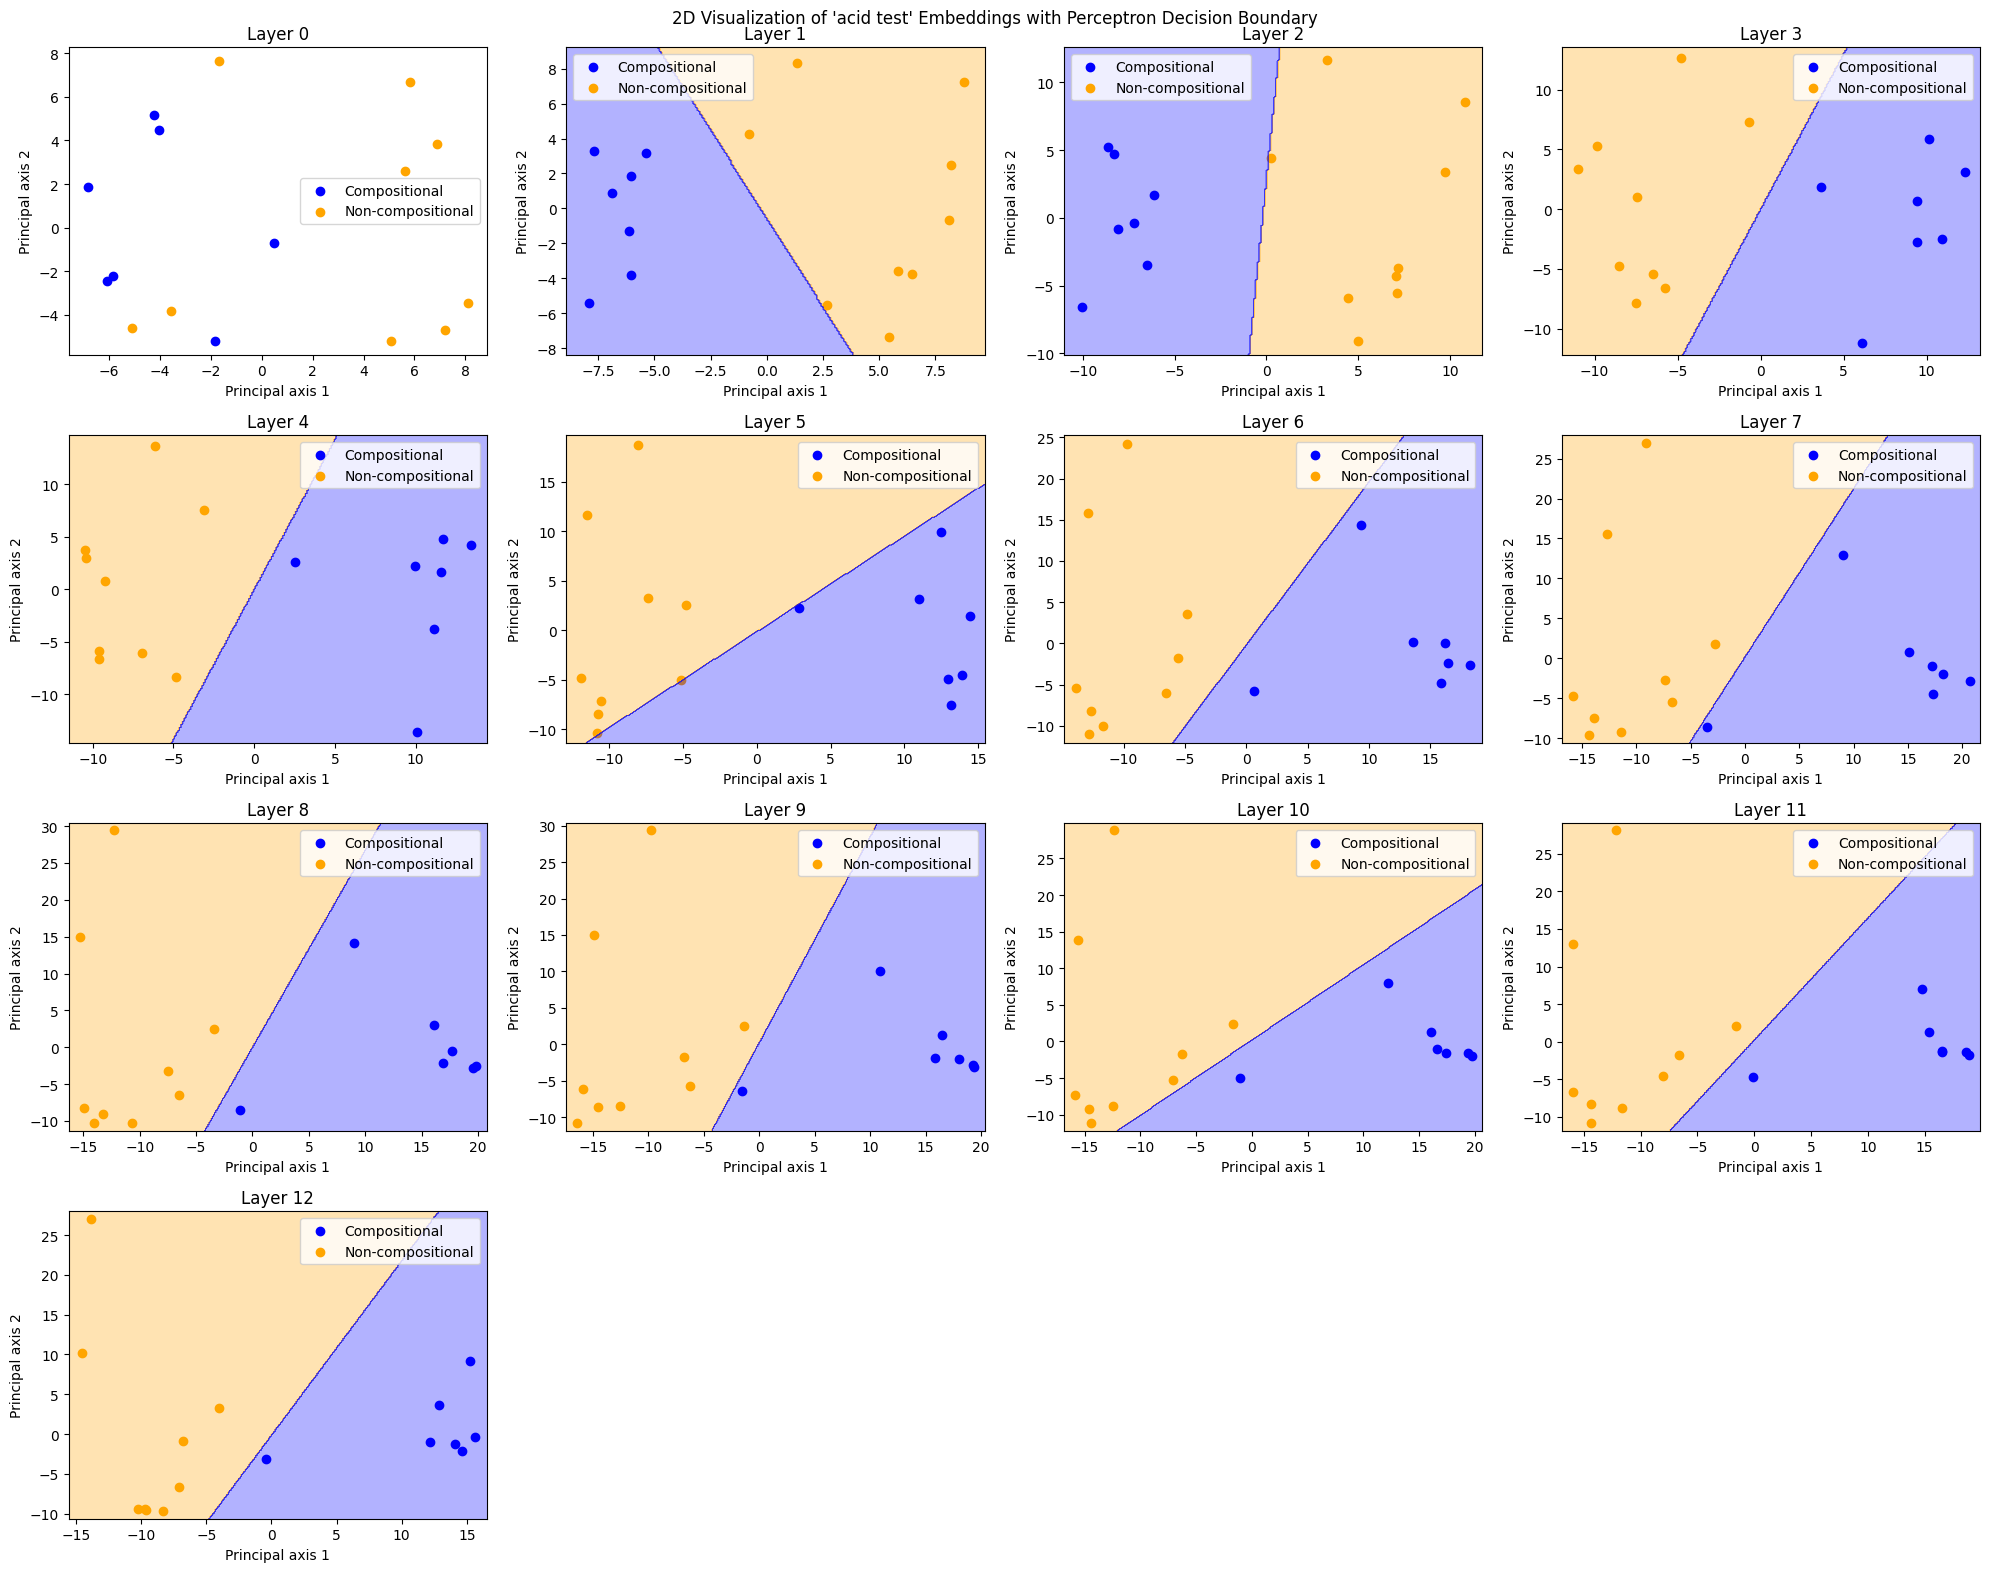

Layer 0
Training accuracy: 63.64% => data is not linearly separable.
Layer 1
Training accuracy: 81.82% => data is not linearly separable.
Layer 2
Training accuracy: 72.73% => data is not linearly separable.
Layer 3
Training accuracy: 77.27% => data is not linearly separable.
Layer 4
Training accuracy: 81.82% => data is not linearly separable.
Layer 5
Training accuracy: 77.27% => data is not linearly separable.
Layer 6
Training accuracy: 72.73% => data is not linearly separable.
Layer 7
Training accuracy: 81.82% => data is not linearly separable.
Layer 8
Training accuracy: 45.45% => data is not linearly separable.
Layer 9
Training accuracy: 77.27% => data is not linearly separable.
Layer 10
Training accuracy: 54.55% => data is not linearly separable.
Layer 11
Training accuracy: 63.64% => data is not linearly separable.
Layer 12
Training accuracy: 81.82% => data is not linearly separable.


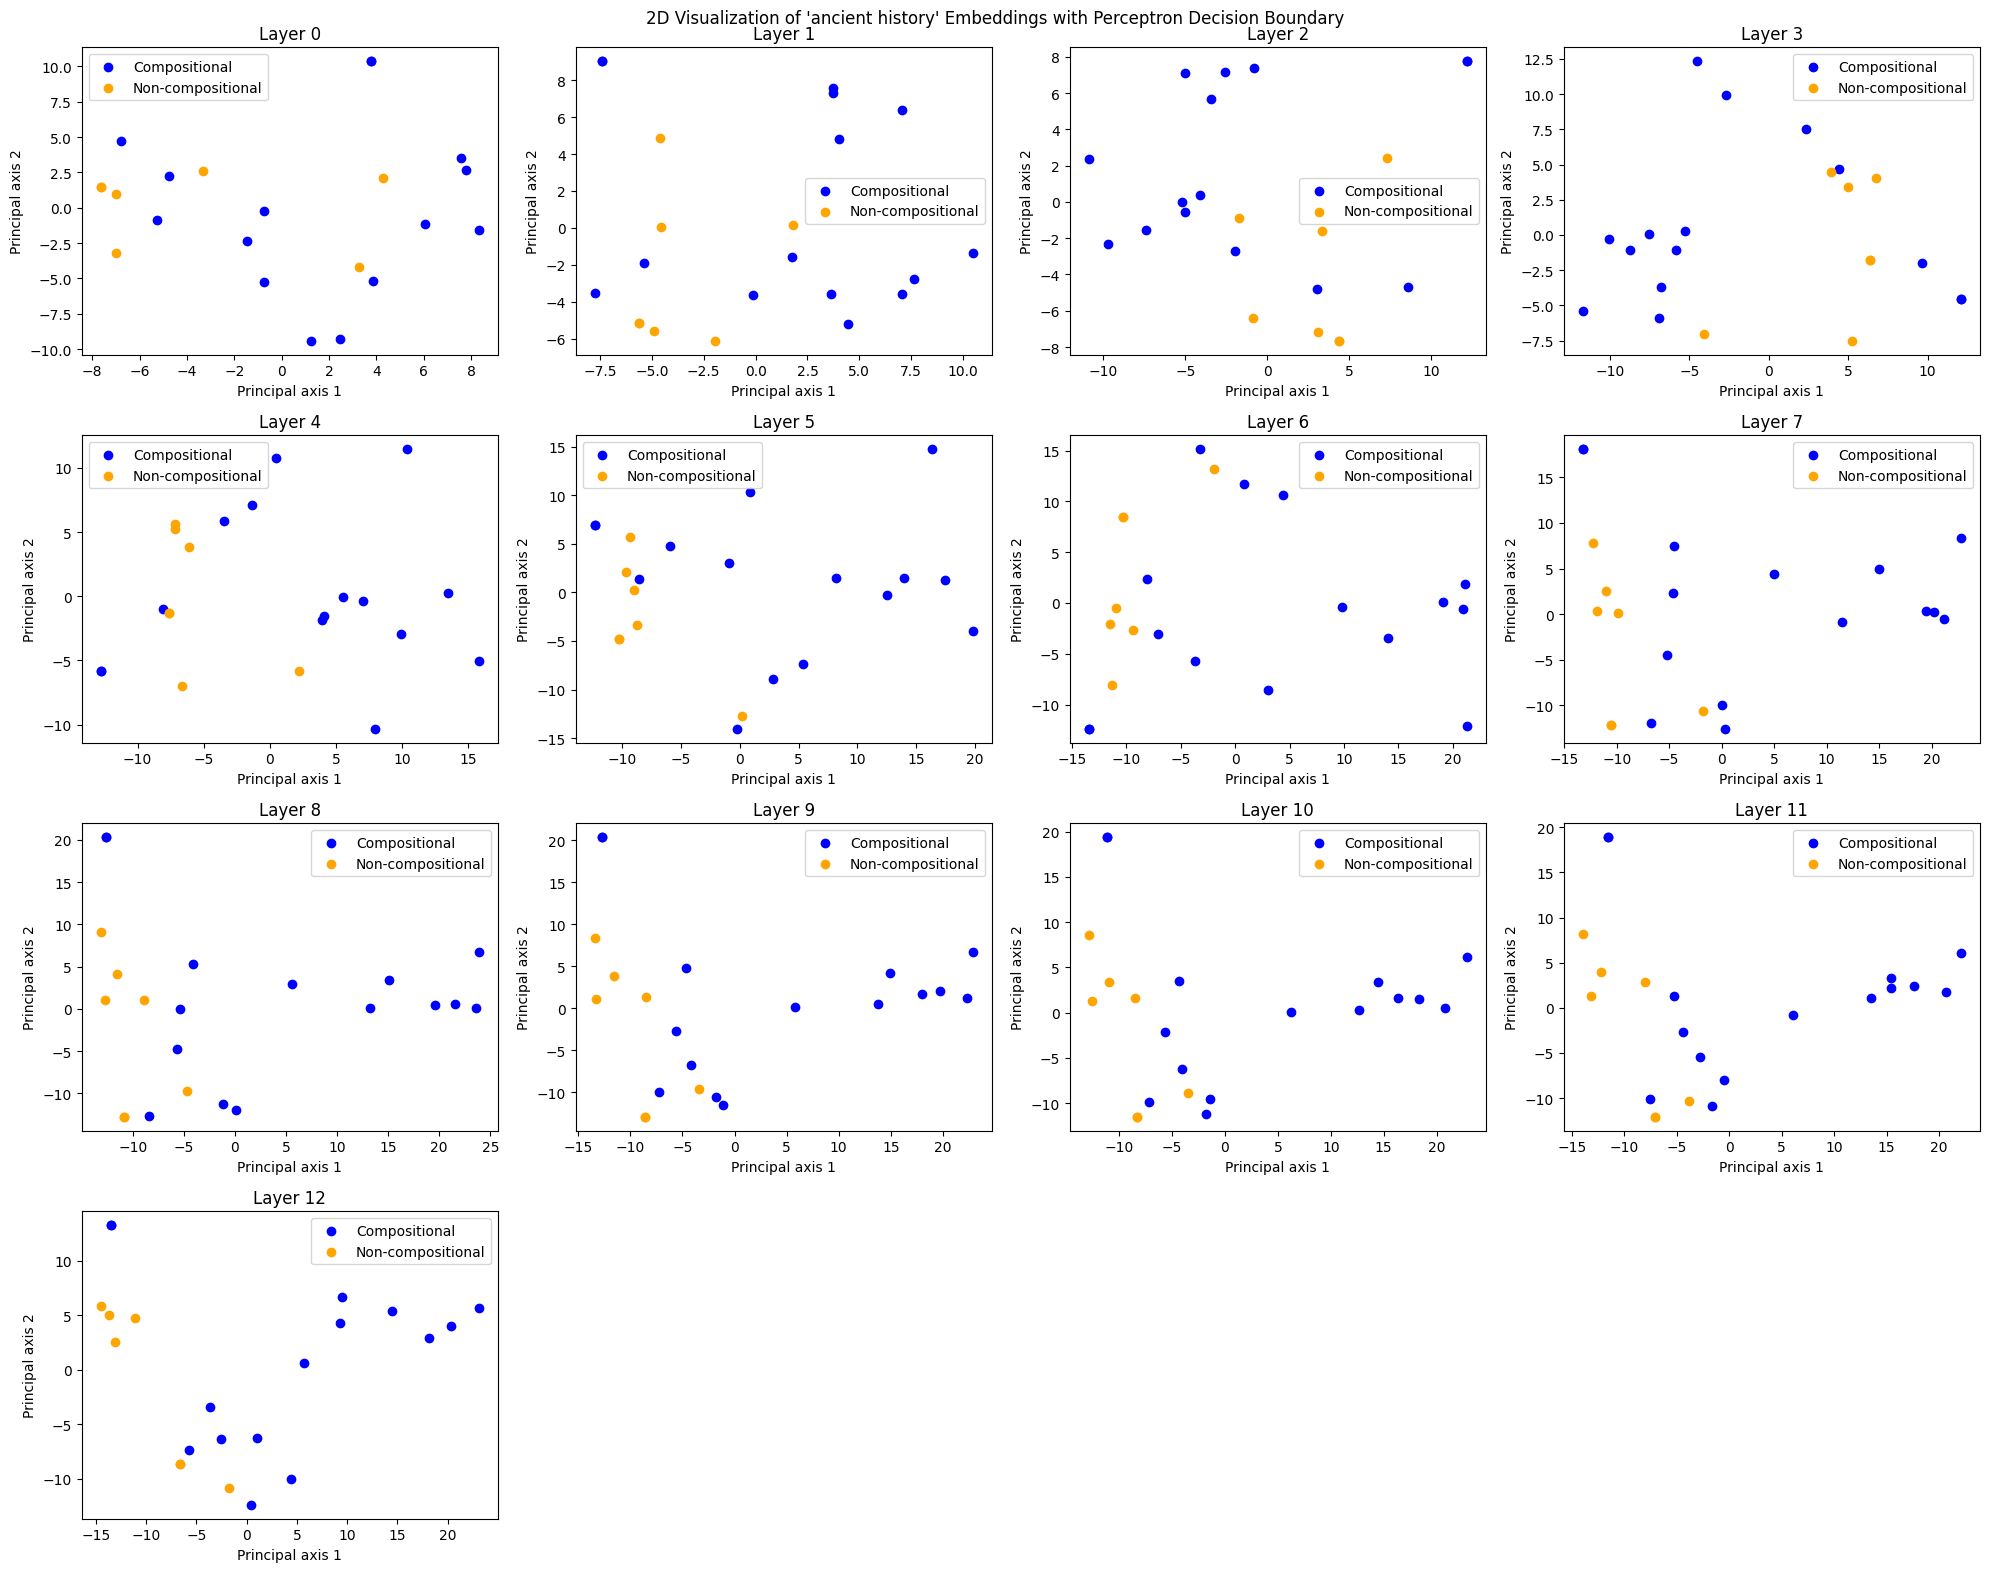

Layer 0
Training accuracy: 82.35% => data is not linearly separable.
Layer 1
Training accuracy: 64.71% => data is not linearly separable.
Layer 2
Training accuracy: 82.35% => data is not linearly separable.
Layer 3
Training accuracy: 64.71% => data is not linearly separable.
Layer 4
Training accuracy: 58.82% => data is not linearly separable.
Layer 5
Training accuracy: 70.59% => data is not linearly separable.
Layer 6
Training accuracy: 58.82% => data is not linearly separable.
Layer 7
Training accuracy: 76.47% => data is not linearly separable.
Layer 8
Training accuracy: 70.59% => data is not linearly separable.
Layer 9
Training accuracy: 82.35% => data is not linearly separable.
Layer 10
Training accuracy: 64.71% => data is not linearly separable.
Layer 11
Training accuracy: 82.35% => data is not linearly separable.
Layer 12
Training accuracy: 70.59% => data is not linearly separable.


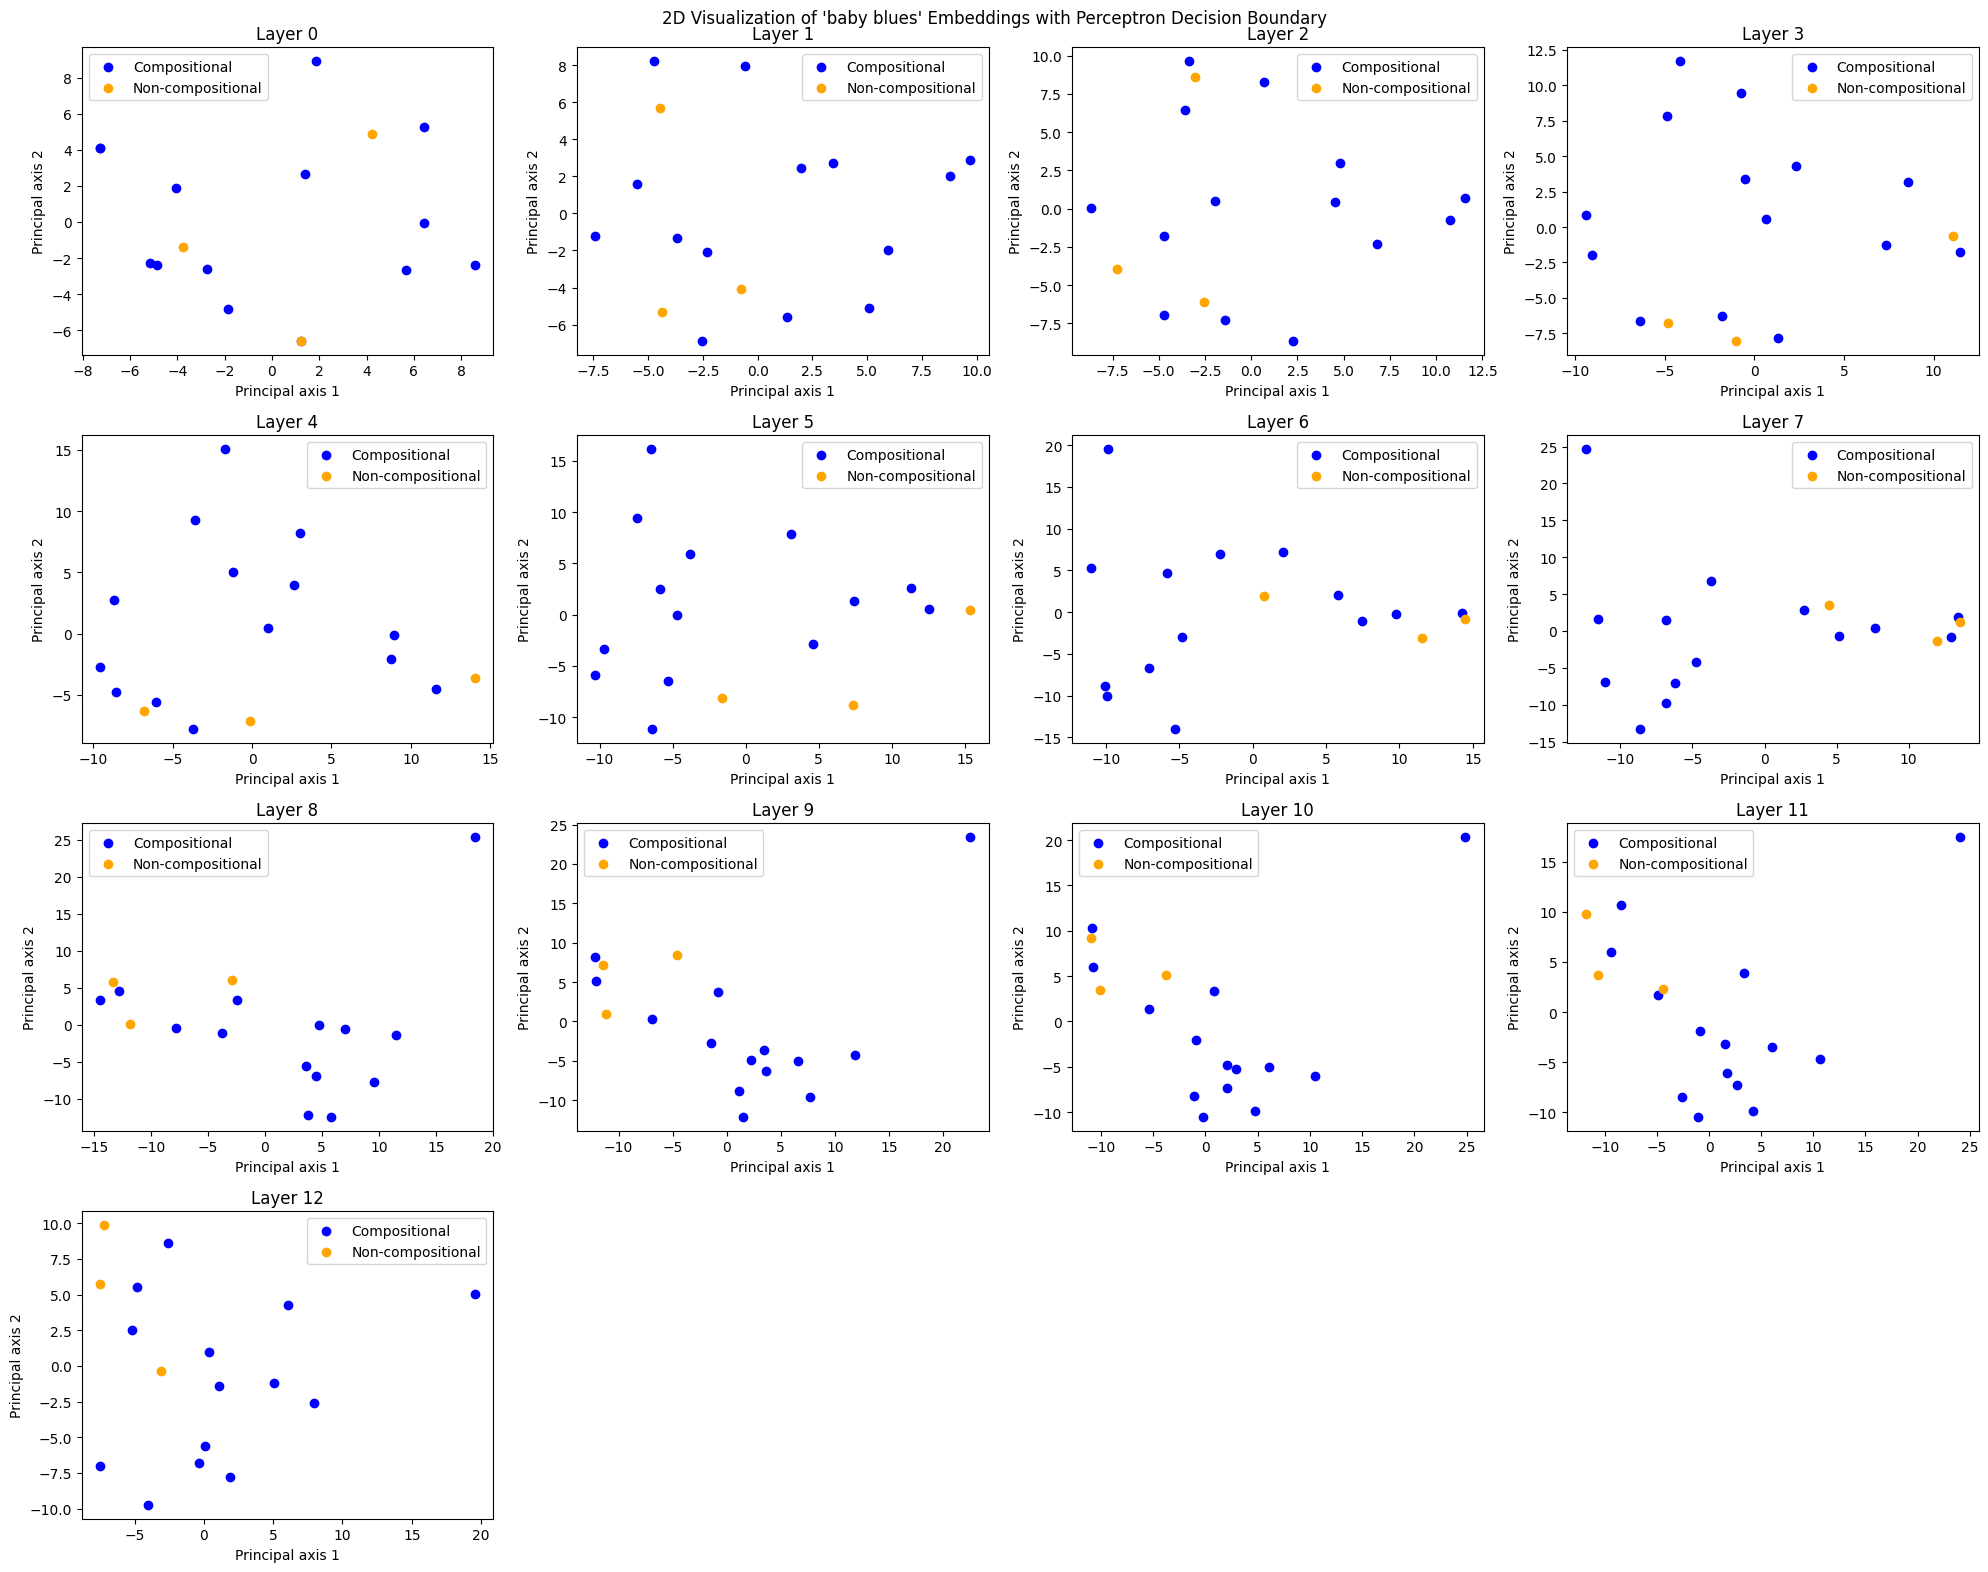

Layer 0
Training accuracy: 50.00% => data is not linearly separable.
Layer 1
Training accuracy: 43.75% => data is not linearly separable.
Layer 2
Training accuracy: 50.00% => data is not linearly separable.
Layer 3
Training accuracy: 43.75% => data is not linearly separable.
Layer 4
Training accuracy: 56.25% => data is not linearly separable.
Layer 5
Training accuracy: 50.00% => data is not linearly separable.
Layer 6
Training accuracy: 50.00% => data is not linearly separable.
Layer 7
Training accuracy: 62.50% => data is not linearly separable.
Layer 8
Training accuracy: 43.75% => data is not linearly separable.
Layer 9
Training accuracy: 31.25% => data is not linearly separable.
Layer 10
Training accuracy: 31.25% => data is not linearly separable.
Layer 11
Training accuracy: 31.25% => data is not linearly separable.
Layer 12
Training accuracy: 56.25% => data is not linearly separable.


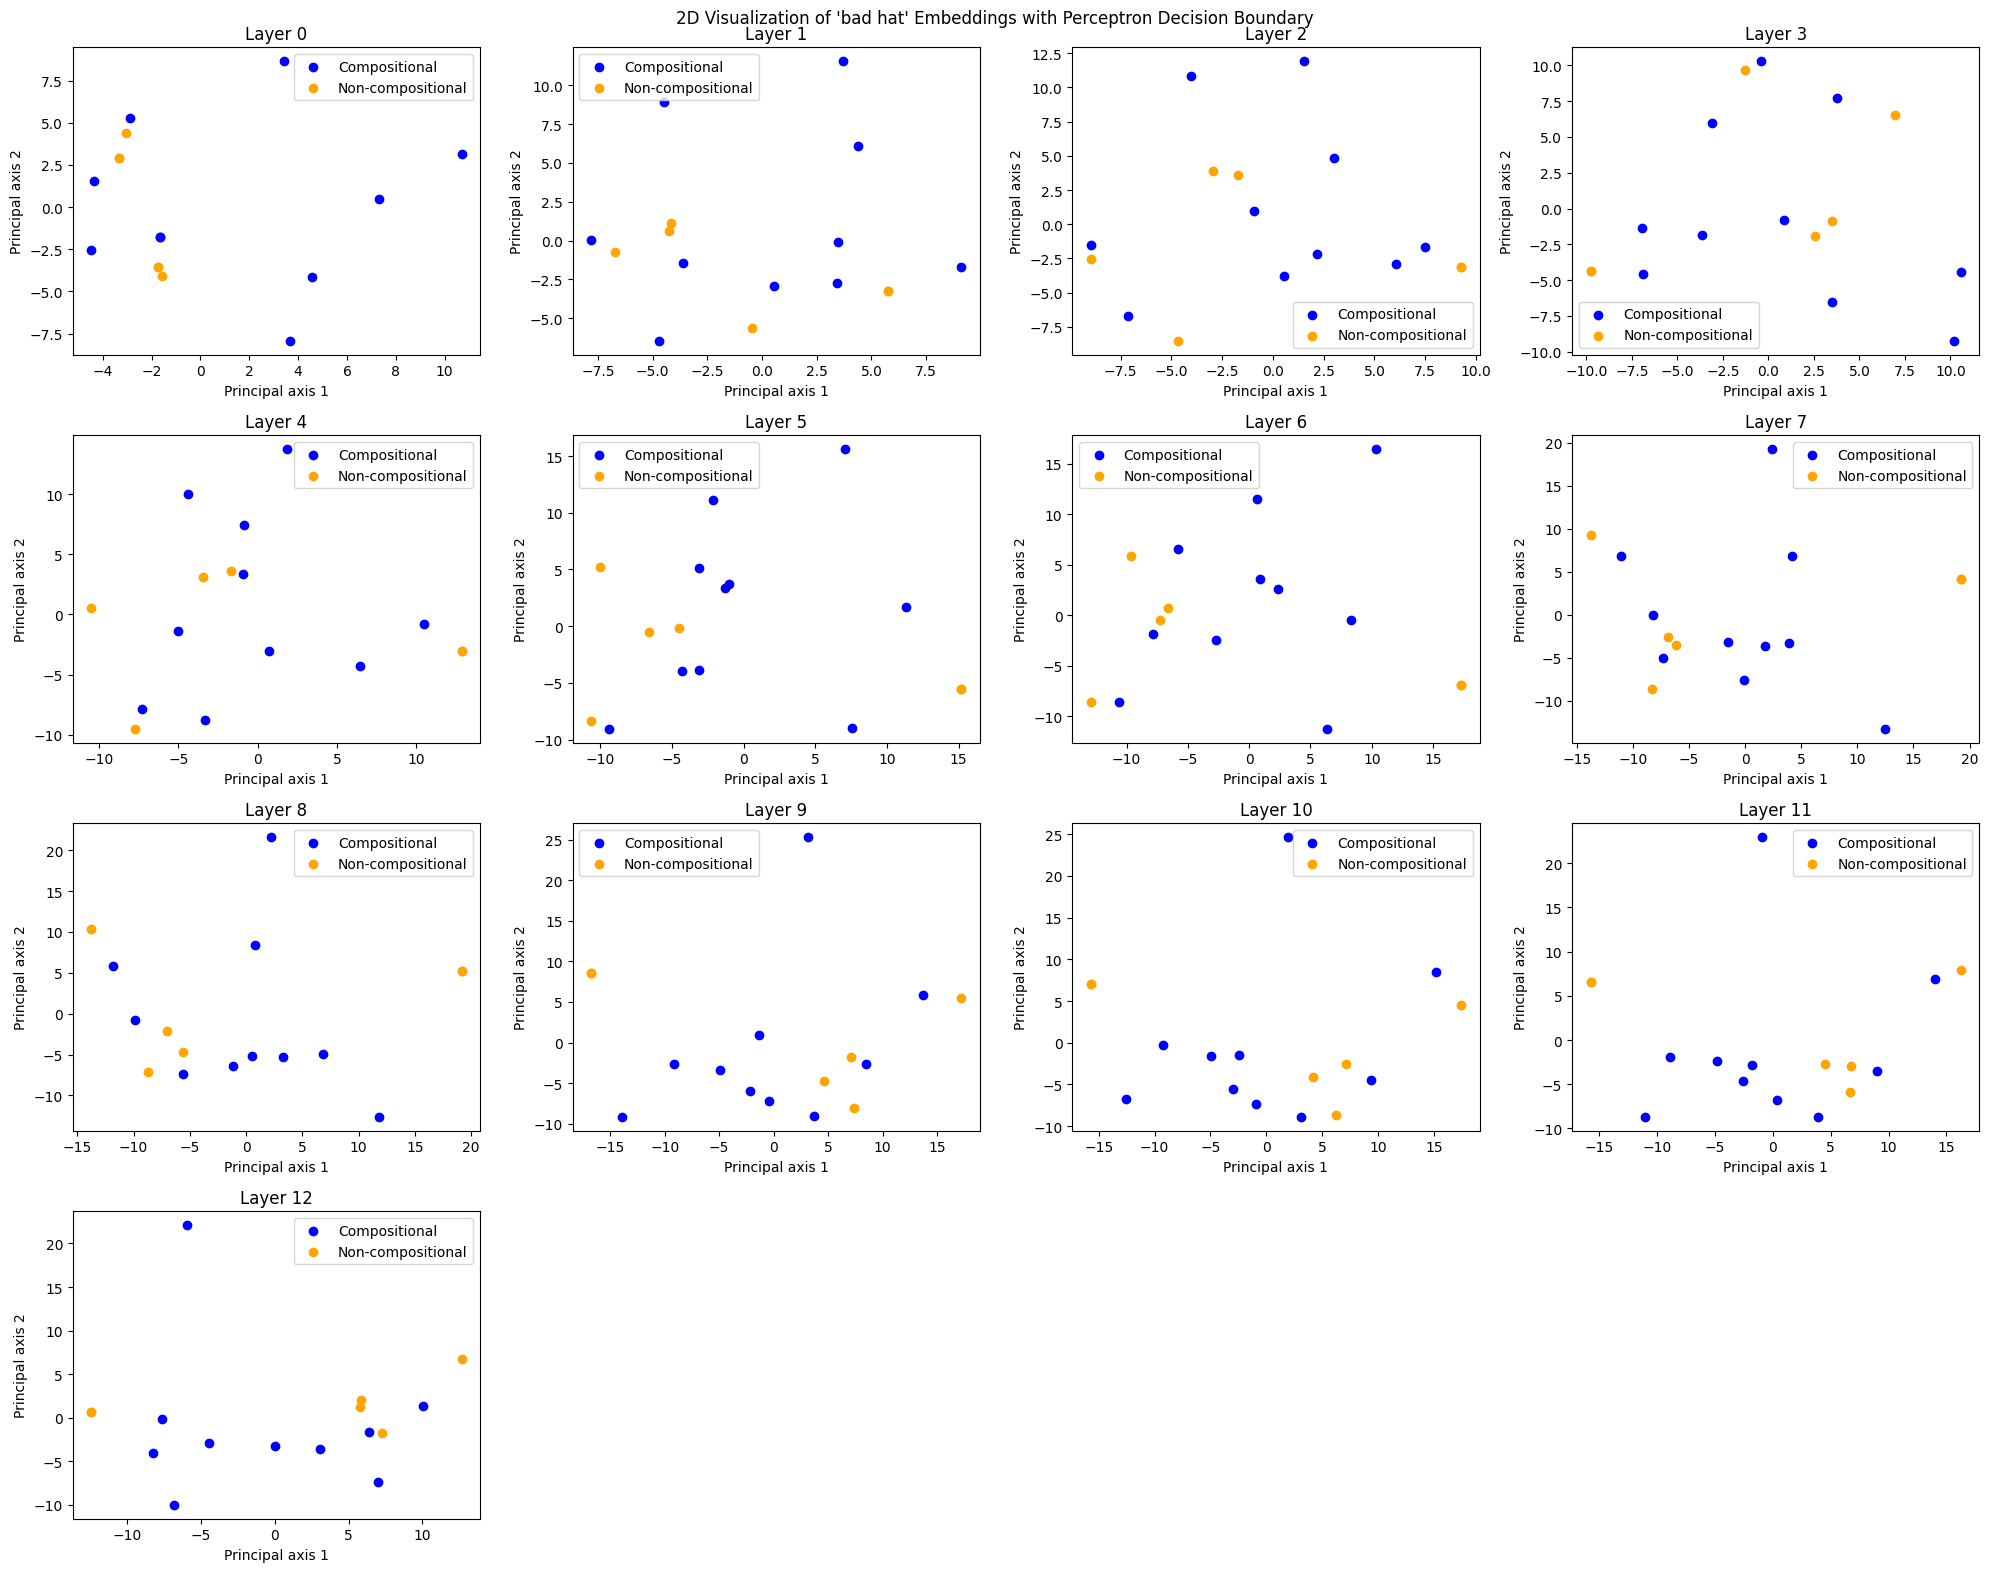

Layer 0
Training accuracy: 84.21% => data is not linearly separable.
Layer 1
Training accuracy: 68.42% => data is not linearly separable.
Layer 2
Training accuracy: 68.42% => data is not linearly separable.
Layer 3
Training accuracy: 68.42% => data is not linearly separable.
Layer 4
Training accuracy: 63.16% => data is not linearly separable.
Layer 5
Training accuracy: 89.47% => data is not linearly separable.
Layer 6
Training accuracy: 73.68% => data is not linearly separable.
Layer 7
Training accuracy: 89.47% => data is not linearly separable.
Layer 8
Training accuracy: 84.21% => data is not linearly separable.
Layer 9
Training accuracy: 84.21% => data is not linearly separable.
Layer 10
Training accuracy: 100.00% => data is linearly separable.
Layer 11
Training accuracy: 100.00% => data is linearly separable.
Layer 12
Training accuracy: 100.00% => data is linearly separable.


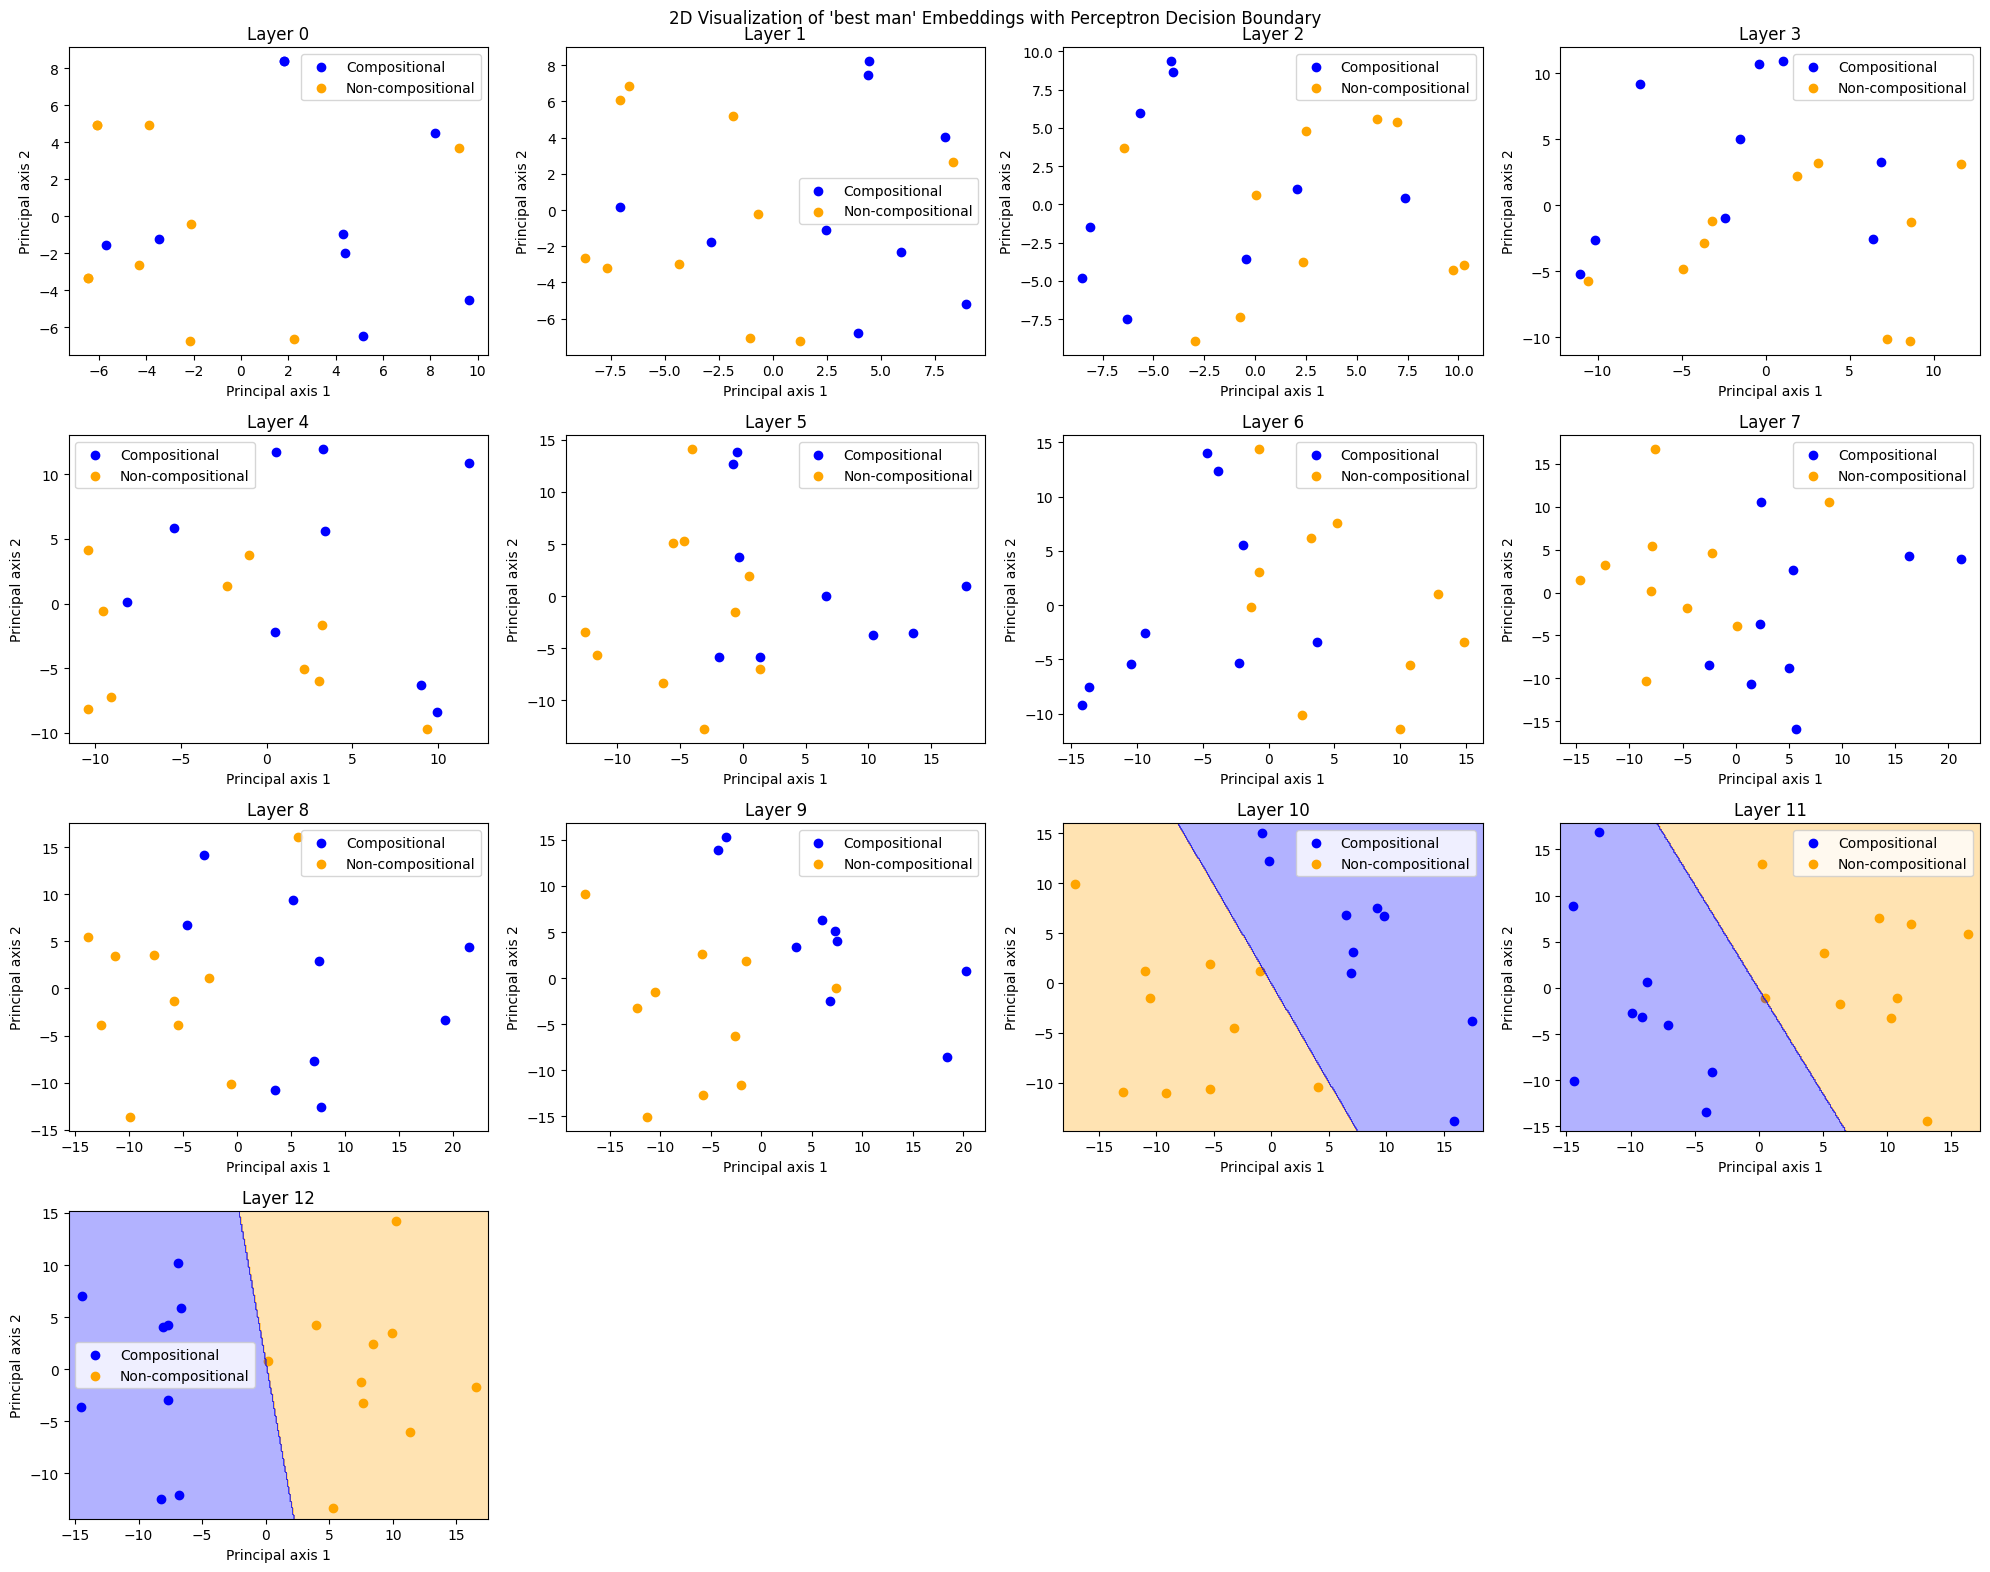

Layer 0
Training accuracy: 72.73% => data is not linearly separable.
Layer 1
Training accuracy: 72.73% => data is not linearly separable.
Layer 2
Training accuracy: 81.82% => data is not linearly separable.
Layer 3
Training accuracy: 81.82% => data is not linearly separable.
Layer 4
Training accuracy: 81.82% => data is not linearly separable.
Layer 5
Training accuracy: 81.82% => data is not linearly separable.
Layer 6
Training accuracy: 81.82% => data is not linearly separable.
Layer 7
Training accuracy: 90.91% => data is not linearly separable.
Layer 8
Training accuracy: 72.73% => data is not linearly separable.
Layer 9
Training accuracy: 90.91% => data is not linearly separable.
Layer 10
Training accuracy: 90.91% => data is not linearly separable.
Layer 11
Training accuracy: 90.91% => data is not linearly separable.
Layer 12
Training accuracy: 100.00% => data is linearly separable.


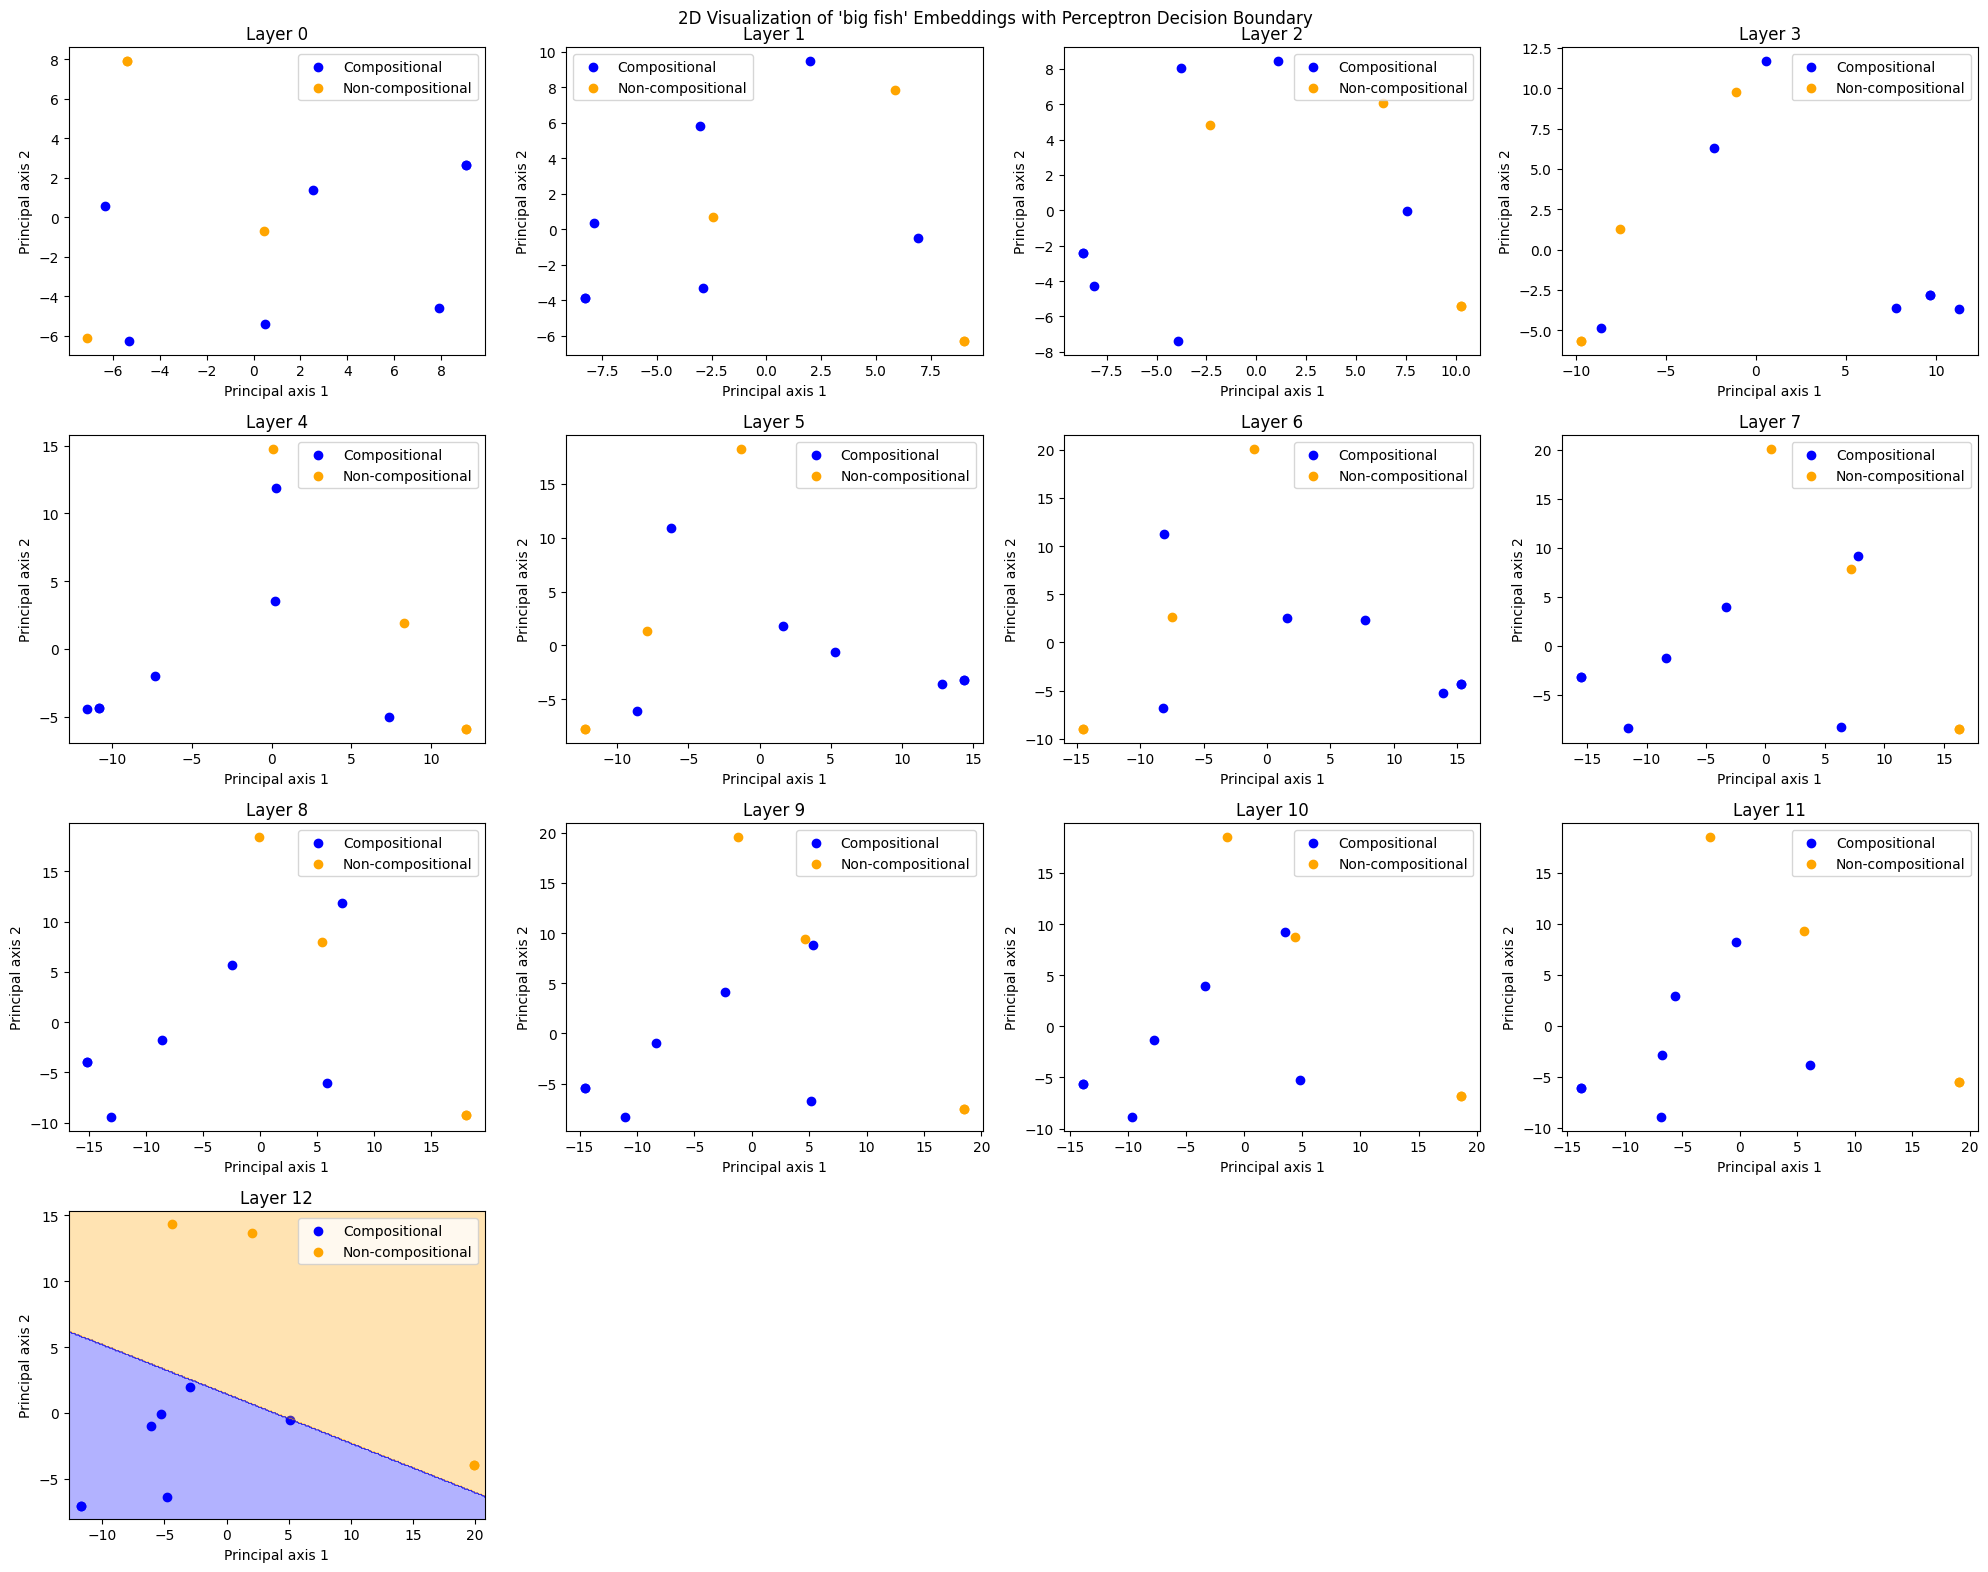

Layer 0
Training accuracy: 76.47% => data is not linearly separable.
Layer 1
Training accuracy: 76.47% => data is not linearly separable.
Layer 2
Training accuracy: 100.00% => data is linearly separable.
Layer 3
Training accuracy: 100.00% => data is linearly separable.
Layer 4
Training accuracy: 100.00% => data is linearly separable.
Layer 5
Training accuracy: 76.47% => data is not linearly separable.
Layer 6
Training accuracy: 94.12% => data is not linearly separable.
Layer 7
Training accuracy: 94.12% => data is not linearly separable.
Layer 8
Training accuracy: 94.12% => data is not linearly separable.
Layer 9
Training accuracy: 88.24% => data is not linearly separable.
Layer 10
Training accuracy: 94.12% => data is not linearly separable.
Layer 11
Training accuracy: 94.12% => data is not linearly separable.
Layer 12
Training accuracy: 82.35% => data is not linearly separable.


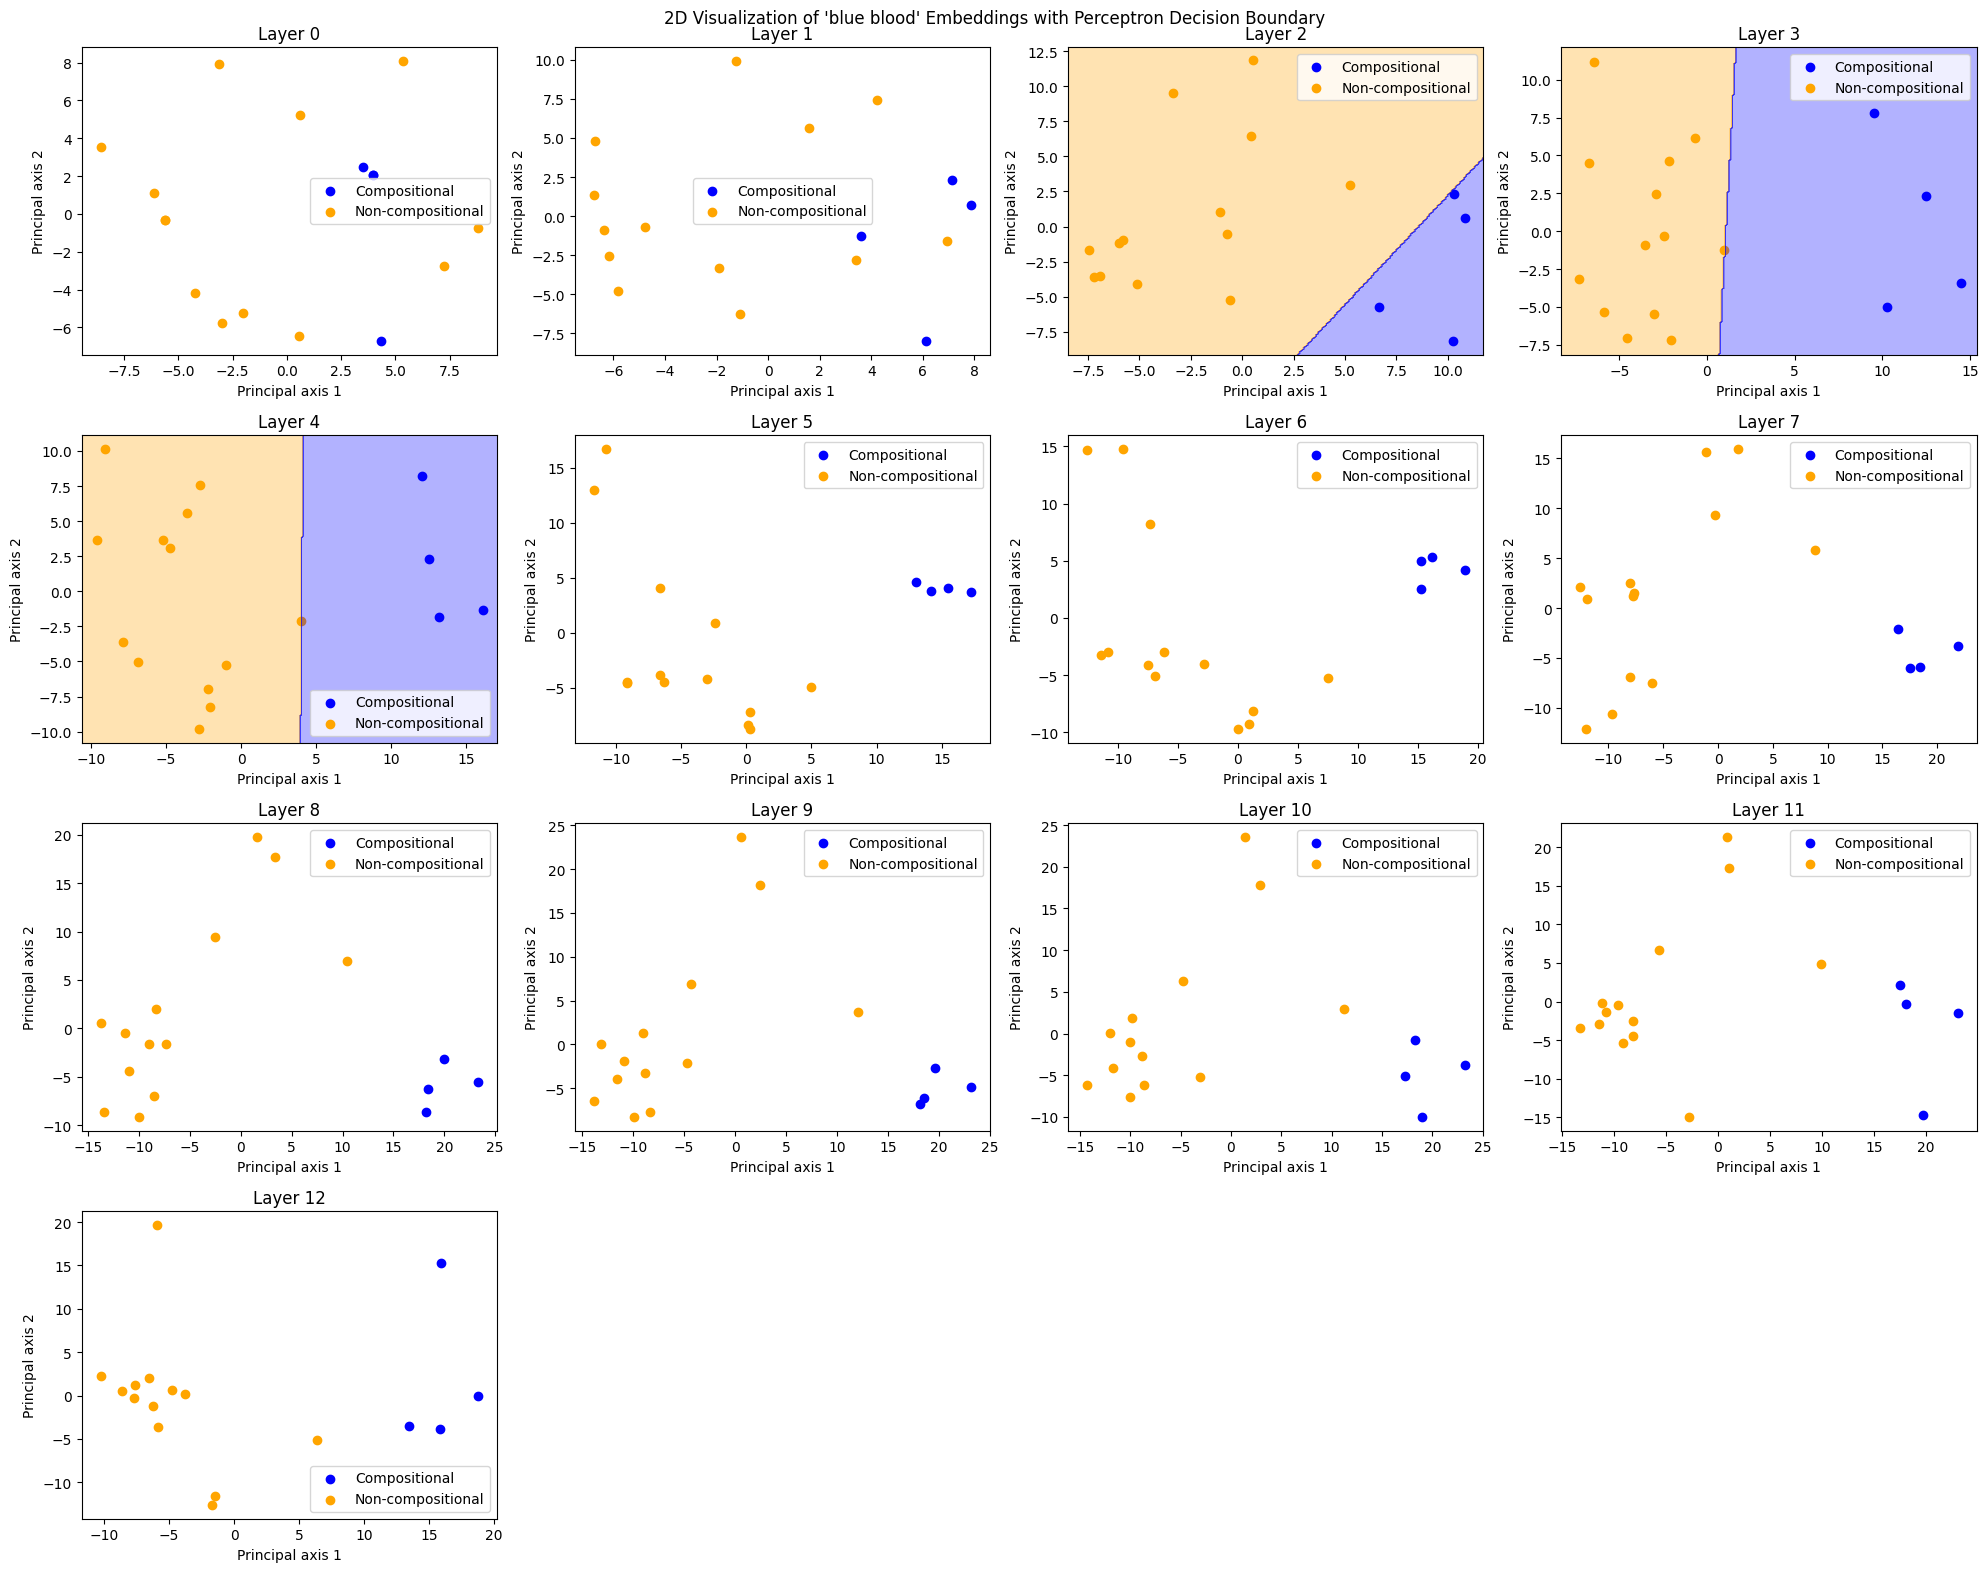

Layer 0
Training accuracy: 53.85% => data is not linearly separable.
Layer 1
Training accuracy: 57.69% => data is not linearly separable.
Layer 2
Training accuracy: 46.15% => data is not linearly separable.
Layer 3
Training accuracy: 92.31% => data is not linearly separable.
Layer 4
Training accuracy: 92.31% => data is not linearly separable.
Layer 5
Training accuracy: 96.15% => data is not linearly separable.
Layer 6
Training accuracy: 84.62% => data is not linearly separable.
Layer 7
Training accuracy: 92.31% => data is not linearly separable.
Layer 8
Training accuracy: 92.31% => data is not linearly separable.
Layer 9
Training accuracy: 88.46% => data is not linearly separable.
Layer 10
Training accuracy: 88.46% => data is not linearly separable.
Layer 11
Training accuracy: 88.46% => data is not linearly separable.
Layer 12
Training accuracy: 92.31% => data is not linearly separable.


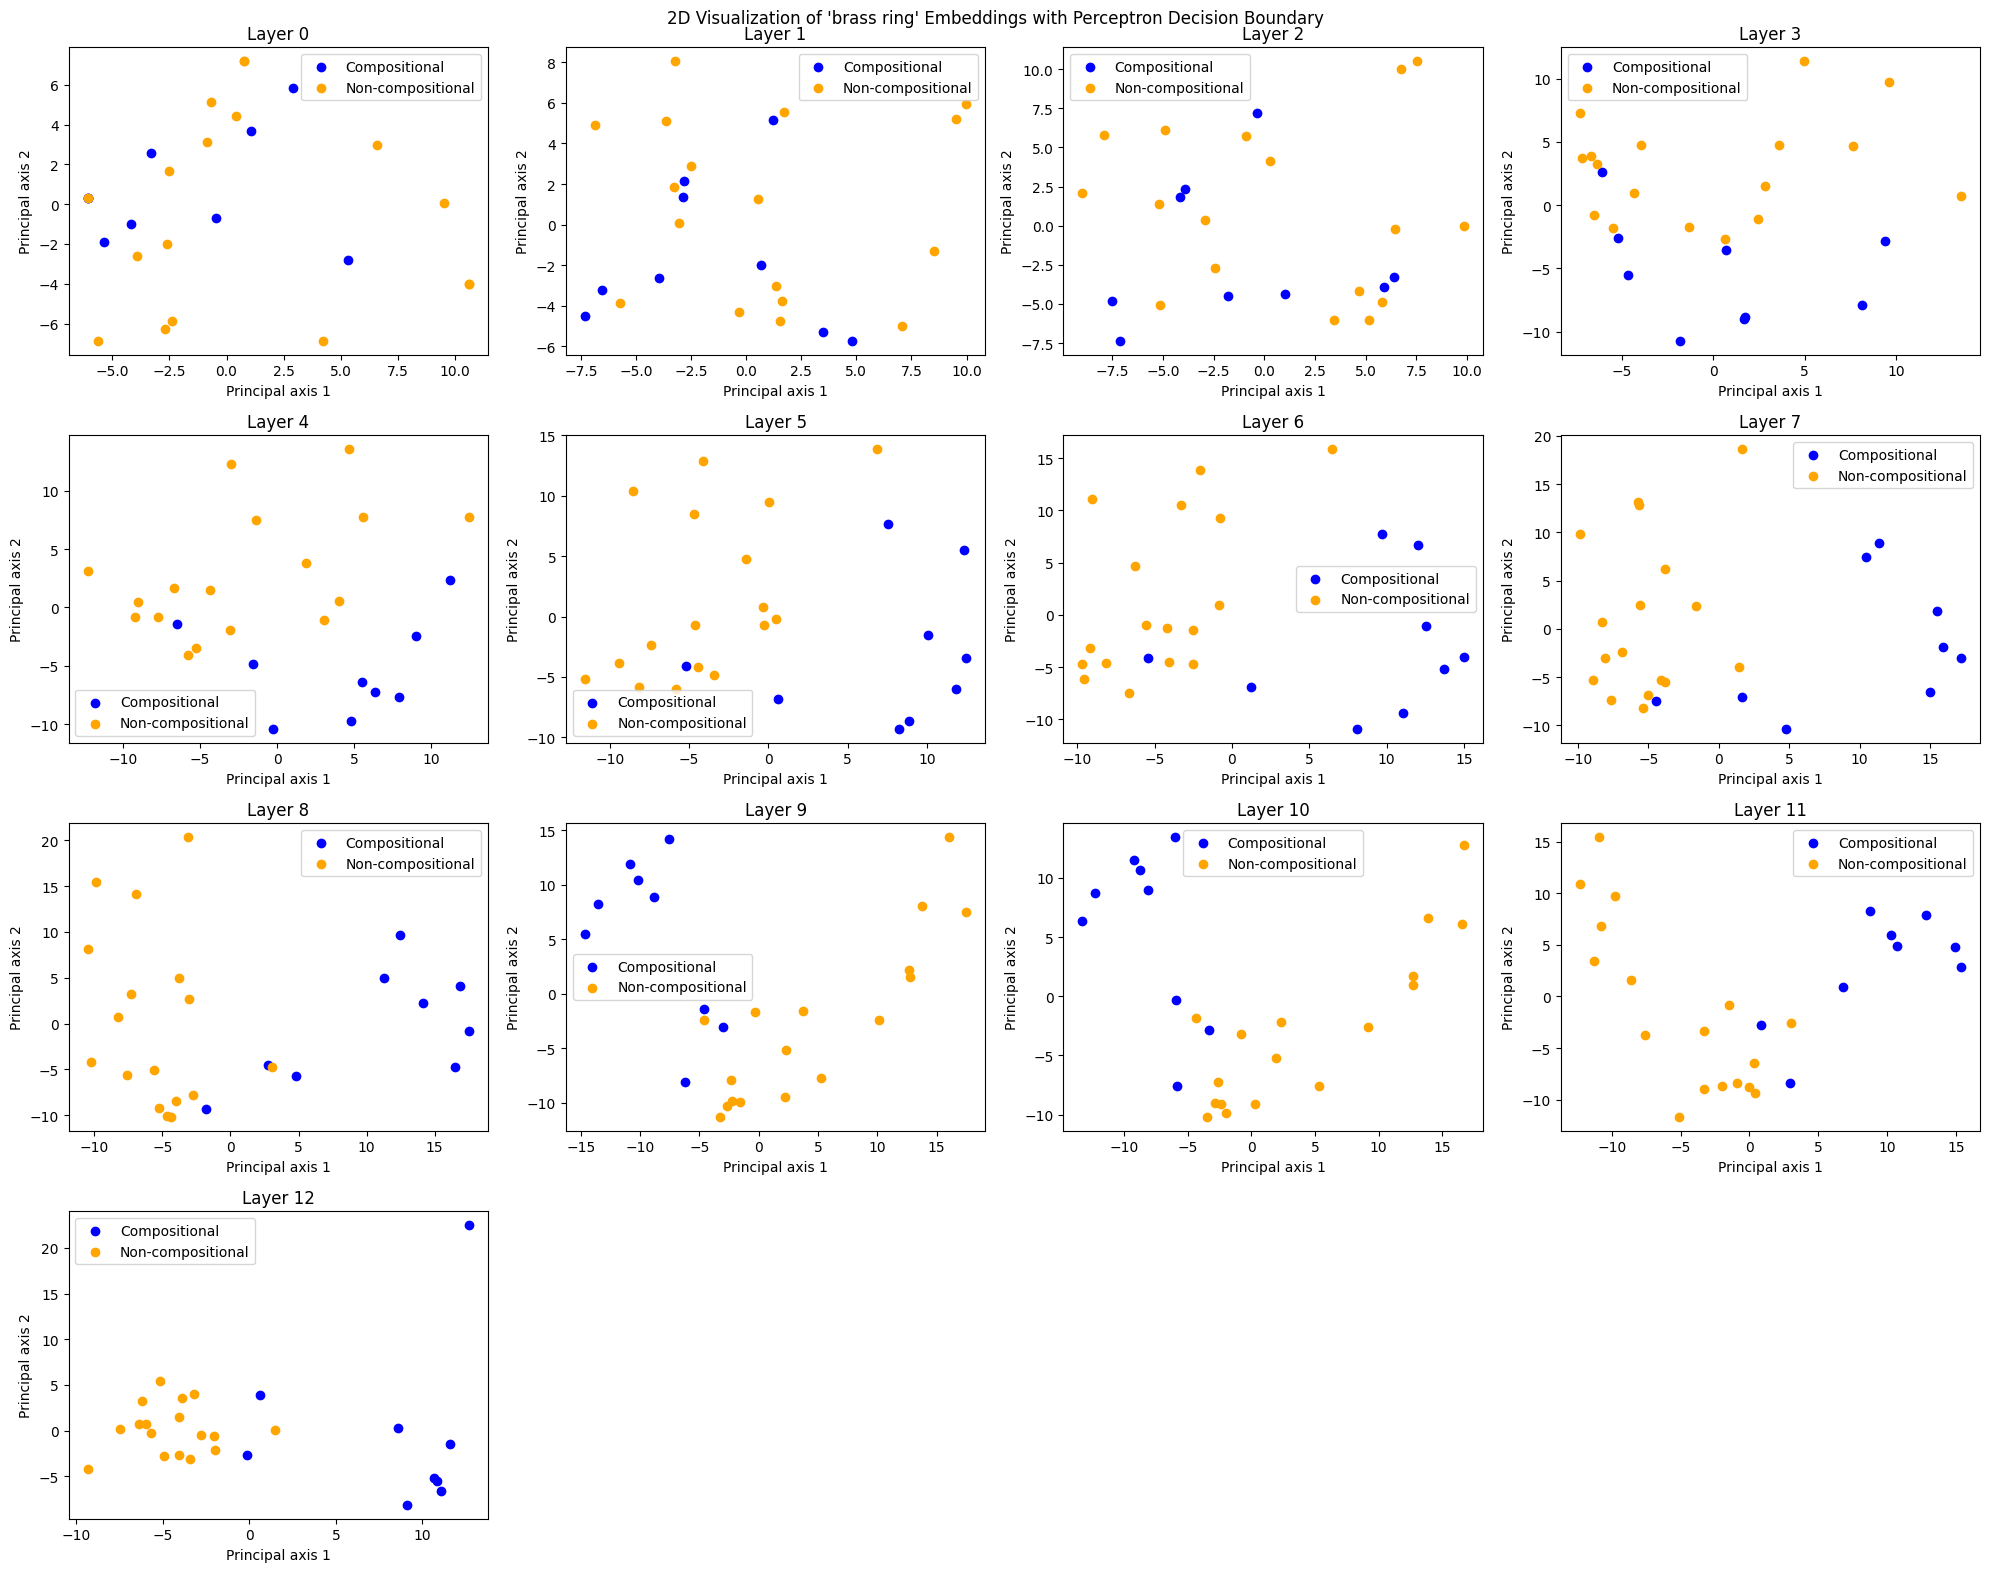

Layer 0
Training accuracy: 58.82% => data is not linearly separable.
Layer 1
Training accuracy: 64.71% => data is not linearly separable.
Layer 2
Training accuracy: 47.06% => data is not linearly separable.
Layer 3
Training accuracy: 70.59% => data is not linearly separable.
Layer 4
Training accuracy: 88.24% => data is not linearly separable.
Layer 5
Training accuracy: 82.35% => data is not linearly separable.
Layer 6
Training accuracy: 82.35% => data is not linearly separable.
Layer 7
Training accuracy: 82.35% => data is not linearly separable.
Layer 8
Training accuracy: 82.35% => data is not linearly separable.
Layer 9
Training accuracy: 82.35% => data is not linearly separable.
Layer 10
Training accuracy: 76.47% => data is not linearly separable.
Layer 11
Training accuracy: 76.47% => data is not linearly separable.
Layer 12
Training accuracy: 76.47% => data is not linearly separable.


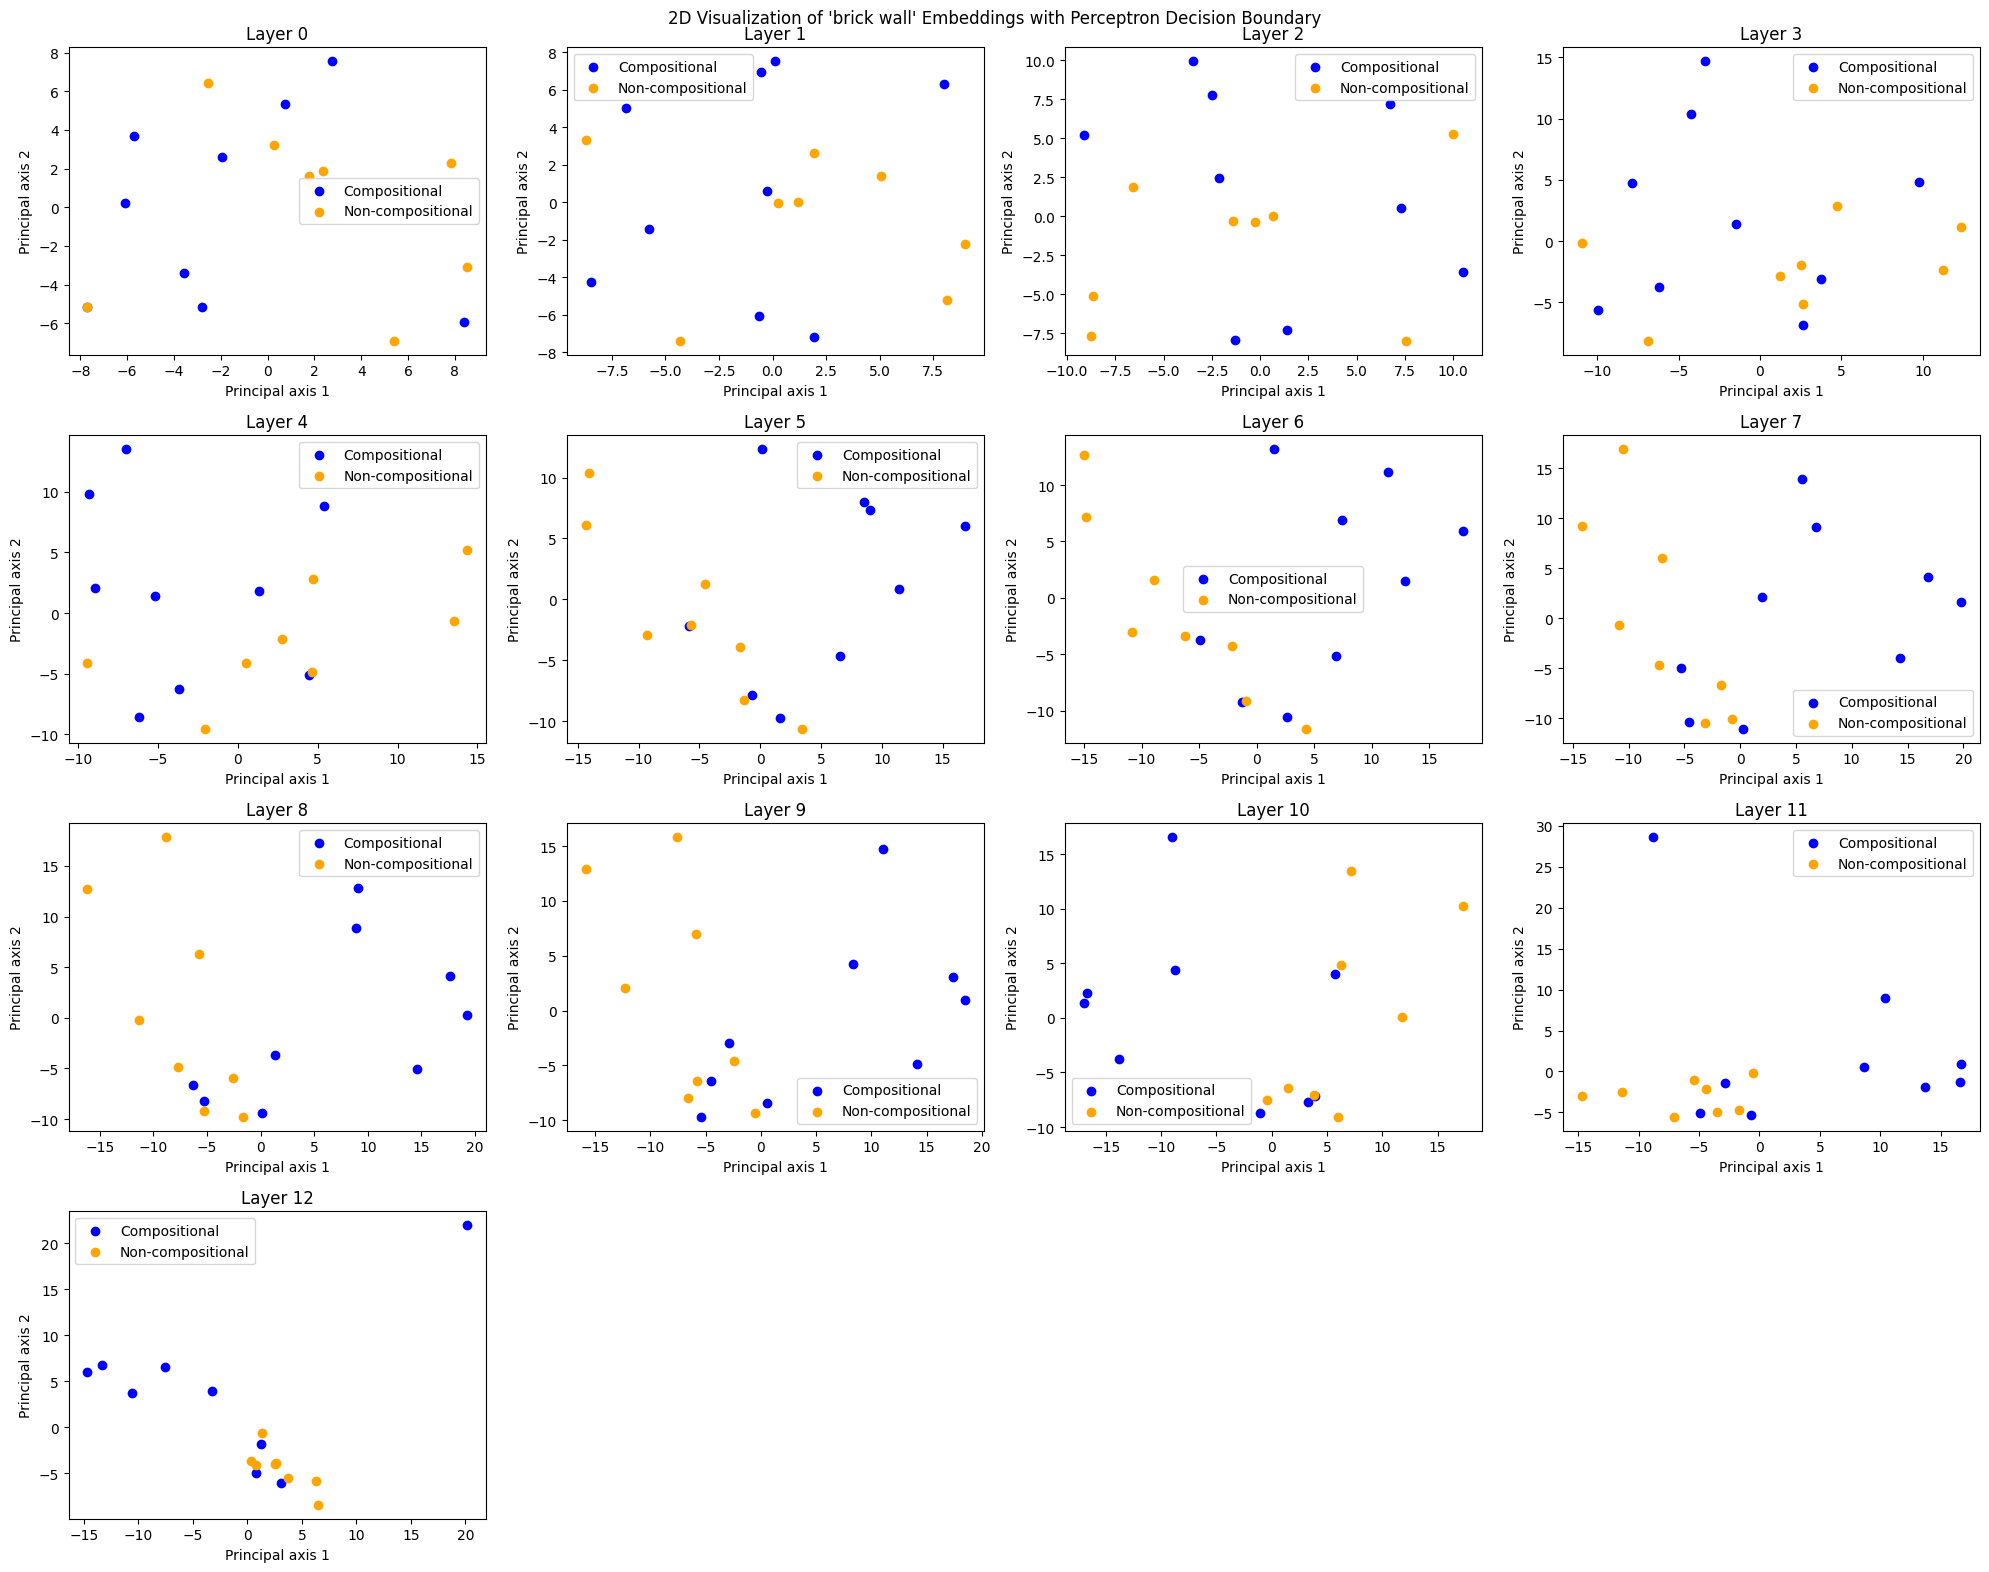

Layer 0
Training accuracy: 85.71% => data is not linearly separable.
Layer 1
Training accuracy: 85.71% => data is not linearly separable.
Layer 2
Training accuracy: 85.71% => data is not linearly separable.
Layer 3
Training accuracy: 92.86% => data is not linearly separable.
Layer 4
Training accuracy: 85.71% => data is not linearly separable.
Layer 5
Training accuracy: 85.71% => data is not linearly separable.
Layer 6
Training accuracy: 92.86% => data is not linearly separable.
Layer 7
Training accuracy: 78.57% => data is not linearly separable.
Layer 8
Training accuracy: 100.00% => data is linearly separable.
Layer 9
Training accuracy: 100.00% => data is linearly separable.
Layer 10
Training accuracy: 92.86% => data is not linearly separable.
Layer 11
Training accuracy: 78.57% => data is not linearly separable.
Layer 12
Training accuracy: 100.00% => data is linearly separable.


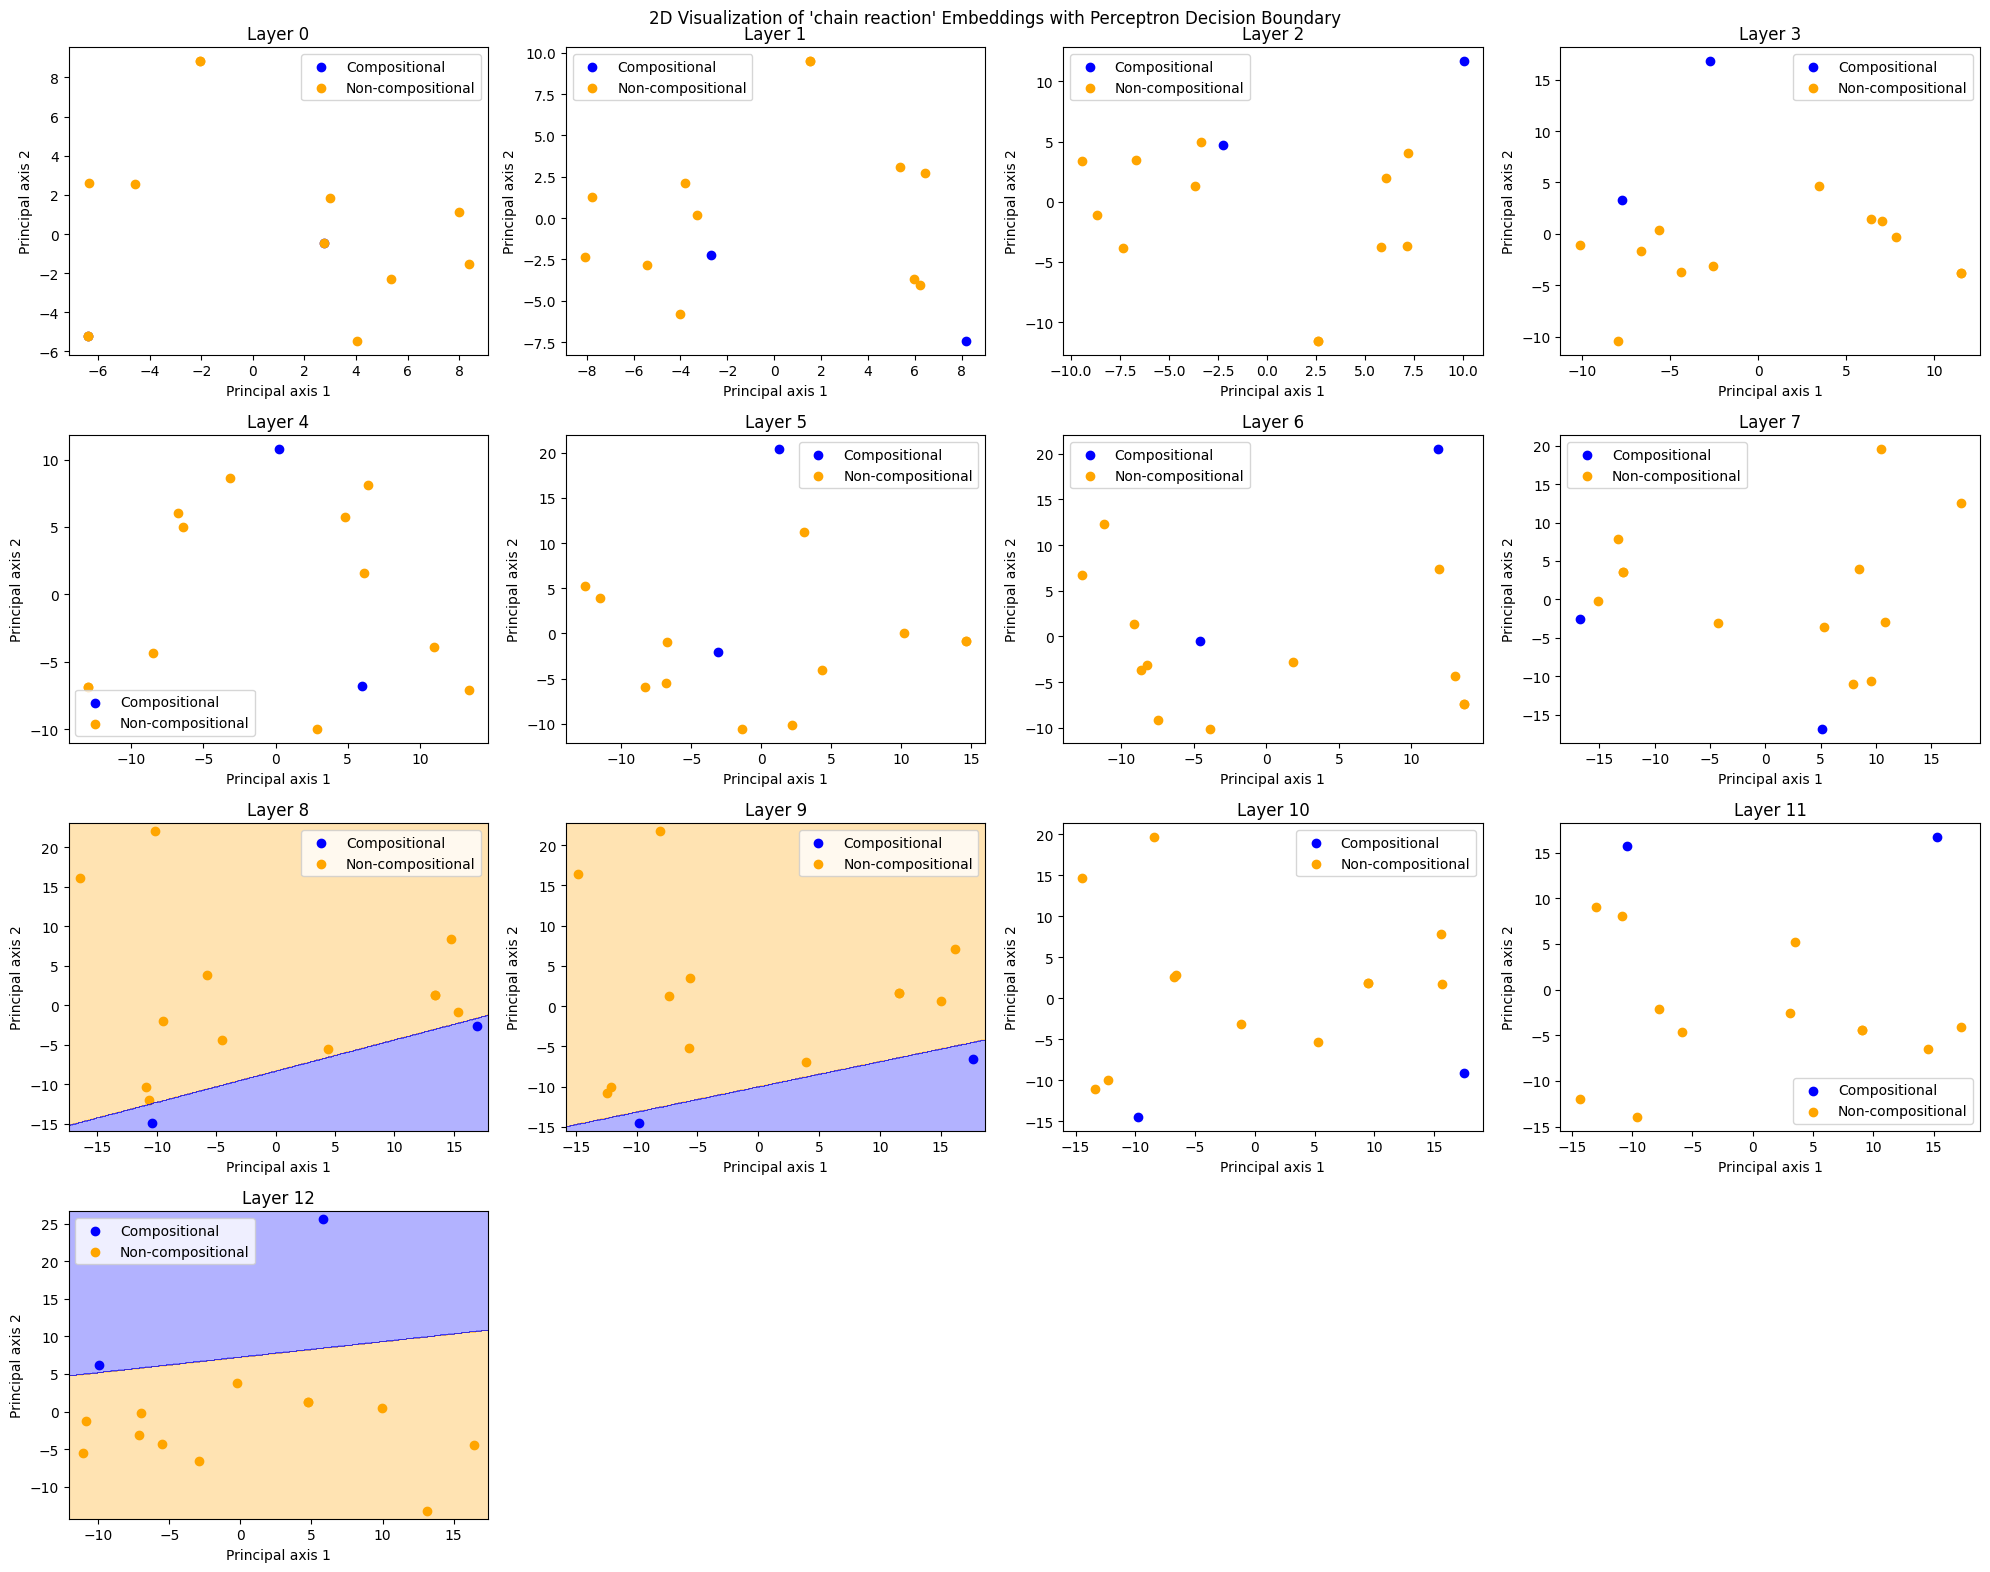

Layer 0
Training accuracy: 40.00% => data is not linearly separable.
Layer 1
Training accuracy: 80.00% => data is not linearly separable.
Layer 2
Training accuracy: 86.67% => data is not linearly separable.
Layer 3
Training accuracy: 93.33% => data is not linearly separable.
Layer 4
Training accuracy: 93.33% => data is not linearly separable.
Layer 5
Training accuracy: 93.33% => data is not linearly separable.
Layer 6
Training accuracy: 86.67% => data is not linearly separable.
Layer 7
Training accuracy: 93.33% => data is not linearly separable.
Layer 8
Training accuracy: 80.00% => data is not linearly separable.
Layer 9
Training accuracy: 86.67% => data is not linearly separable.
Layer 10
Training accuracy: 60.00% => data is not linearly separable.
Layer 11
Training accuracy: 93.33% => data is not linearly separable.
Layer 12
Training accuracy: 80.00% => data is not linearly separable.


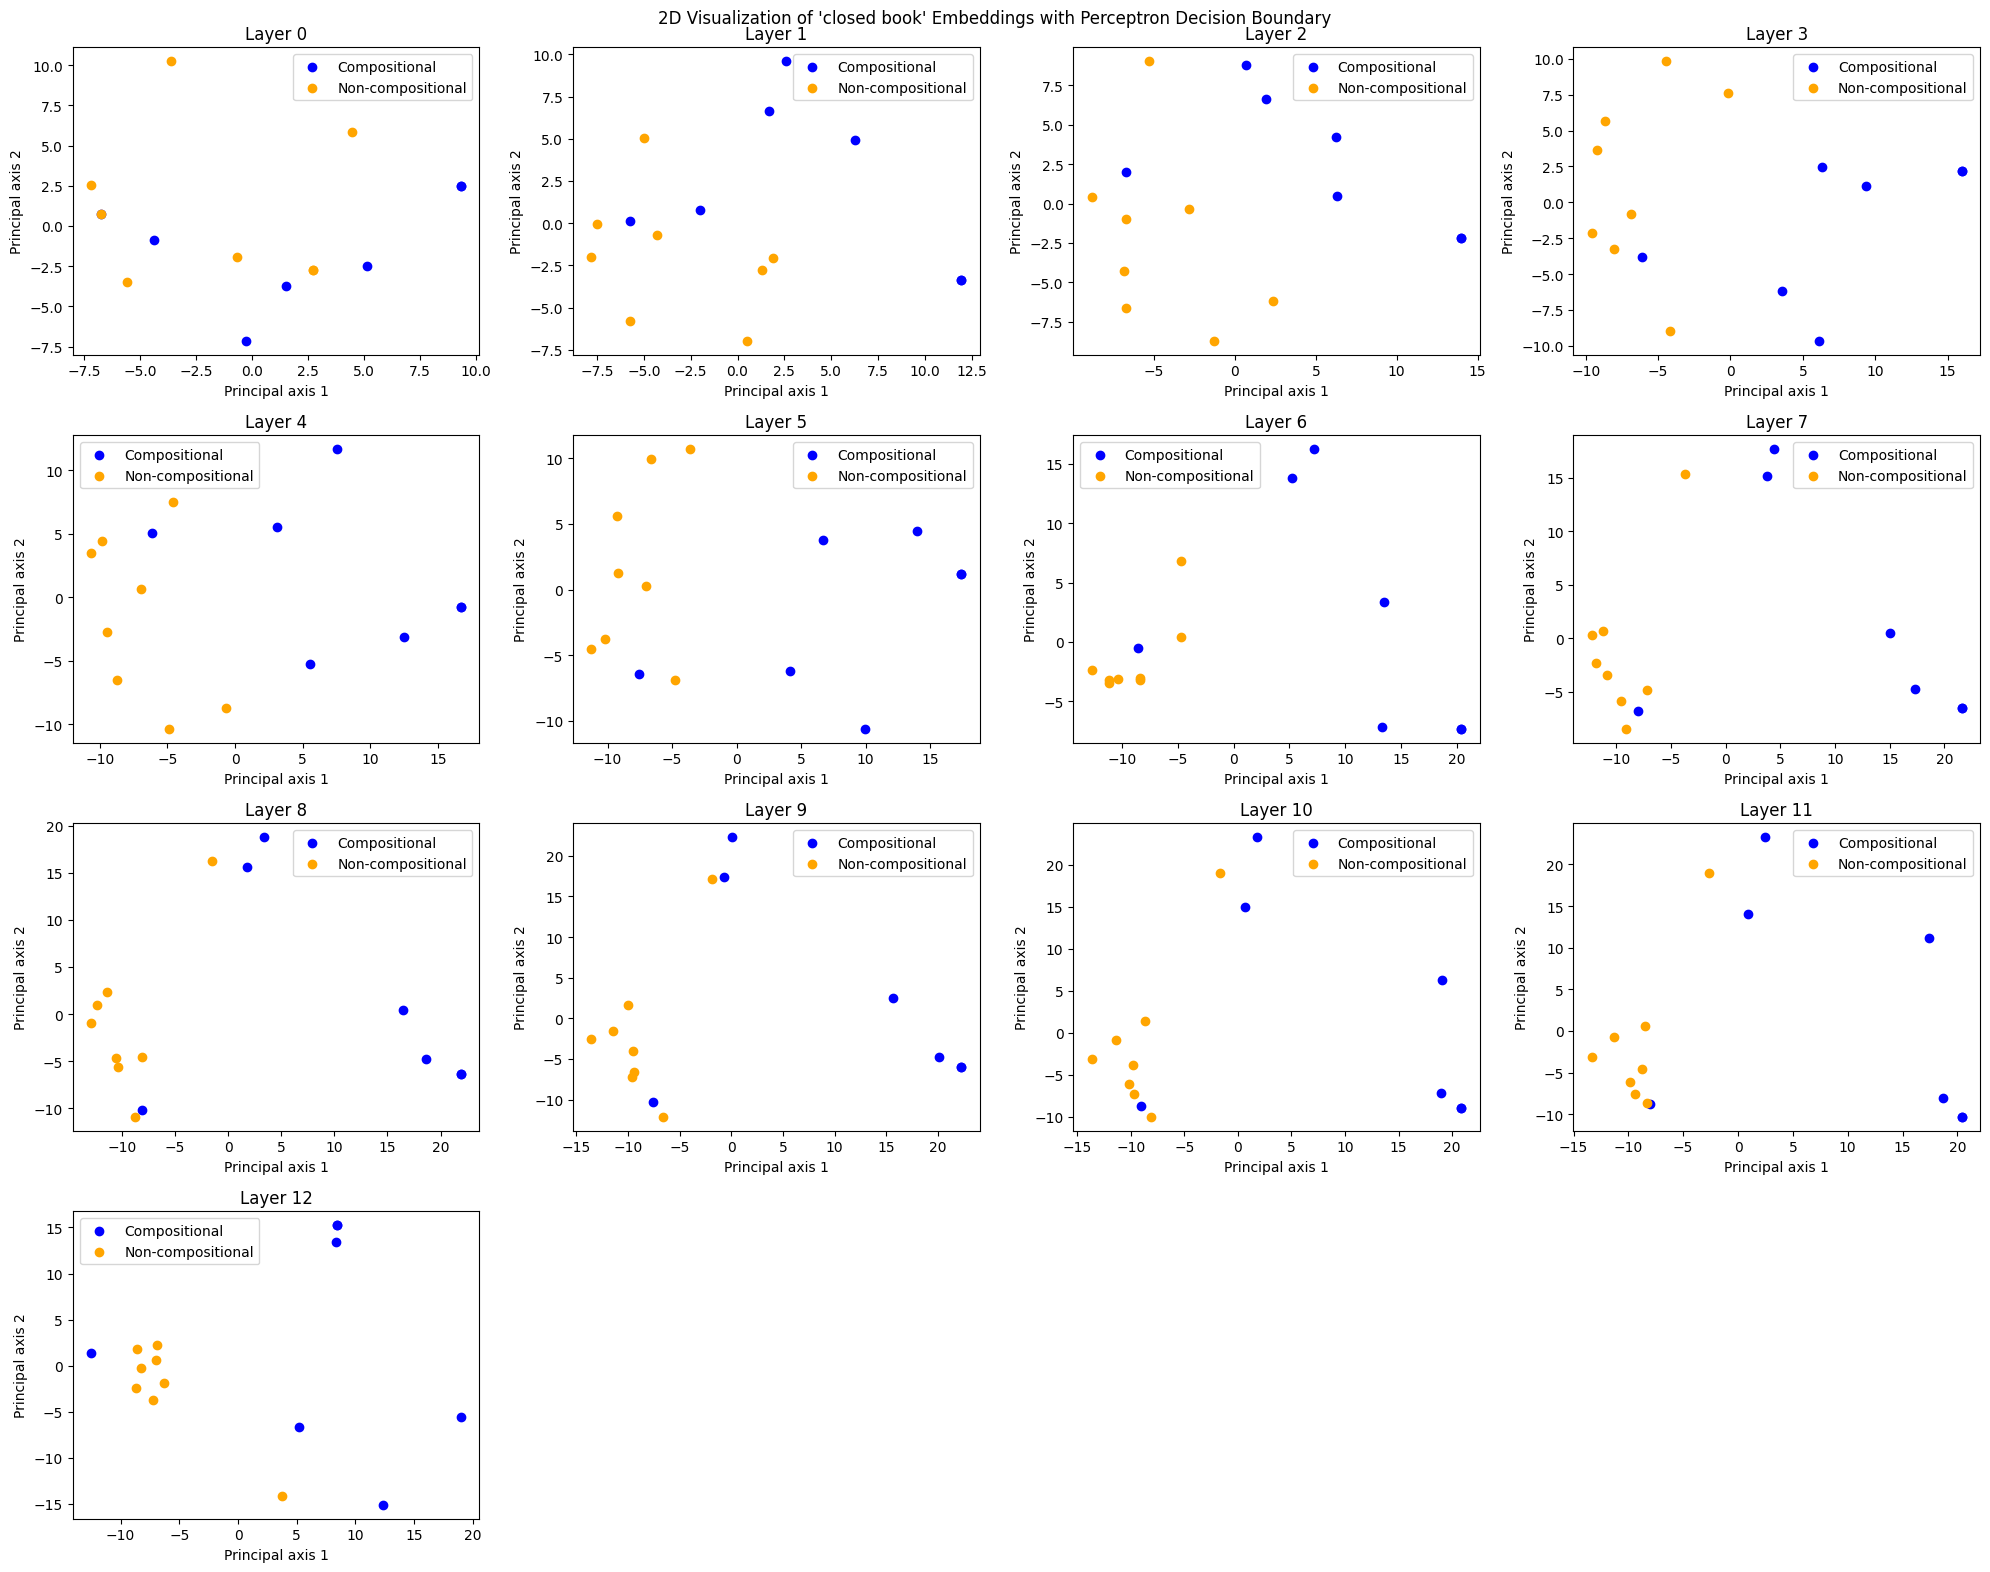

Layer 0
Training accuracy: 61.11% => data is not linearly separable.
Layer 1
Training accuracy: 55.56% => data is not linearly separable.
Layer 2
Training accuracy: 66.67% => data is not linearly separable.
Layer 3
Training accuracy: 94.44% => data is not linearly separable.
Layer 4
Training accuracy: 88.89% => data is not linearly separable.
Layer 5
Training accuracy: 100.00% => data is linearly separable.
Layer 6
Training accuracy: 100.00% => data is linearly separable.
Layer 7
Training accuracy: 100.00% => data is linearly separable.
Layer 8
Training accuracy: 100.00% => data is linearly separable.
Layer 9
Training accuracy: 100.00% => data is linearly separable.
Layer 10
Training accuracy: 100.00% => data is linearly separable.
Layer 11
Training accuracy: 100.00% => data is linearly separable.
Layer 12
Training accuracy: 100.00% => data is linearly separable.


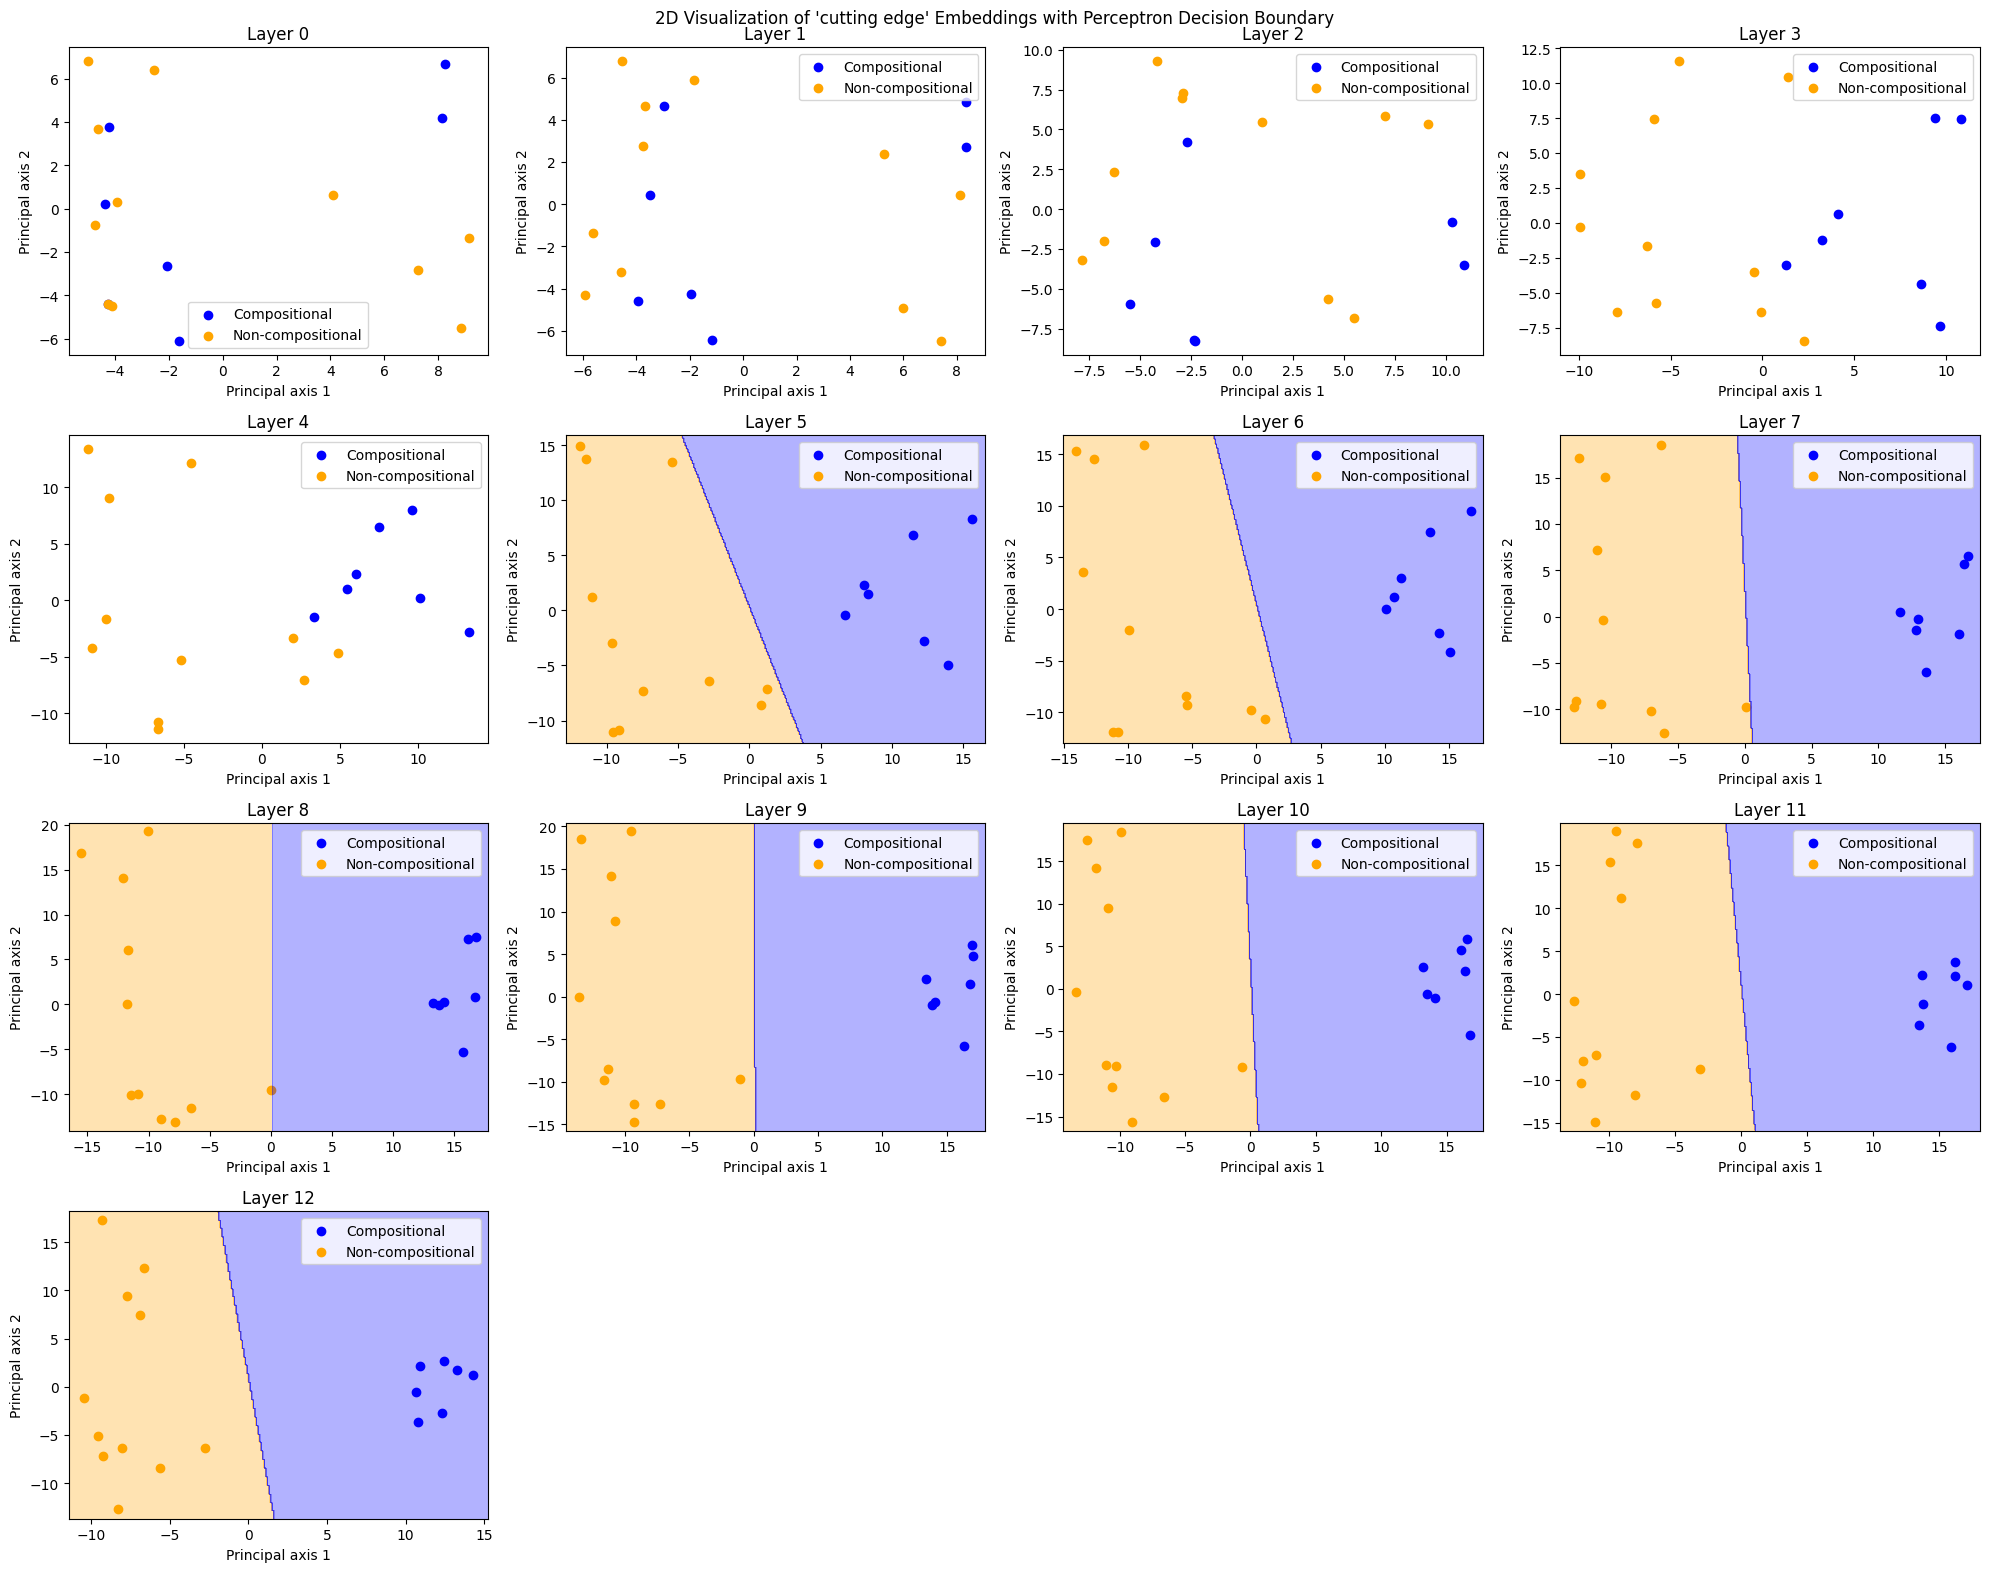

Layer 0
Training accuracy: 62.50% => data is not linearly separable.
Layer 1
Training accuracy: 62.50% => data is not linearly separable.
Layer 2
Training accuracy: 75.00% => data is not linearly separable.
Layer 3
Training accuracy: 75.00% => data is not linearly separable.
Layer 4
Training accuracy: 87.50% => data is not linearly separable.
Layer 5
Training accuracy: 100.00% => data is linearly separable.
Layer 6
Training accuracy: 100.00% => data is linearly separable.
Layer 7
Training accuracy: 100.00% => data is linearly separable.
Layer 8
Training accuracy: 87.50% => data is not linearly separable.
Layer 9
Training accuracy: 100.00% => data is linearly separable.
Layer 10
Training accuracy: 100.00% => data is linearly separable.
Layer 11
Training accuracy: 100.00% => data is linearly separable.
Layer 12
Training accuracy: 100.00% => data is linearly separable.


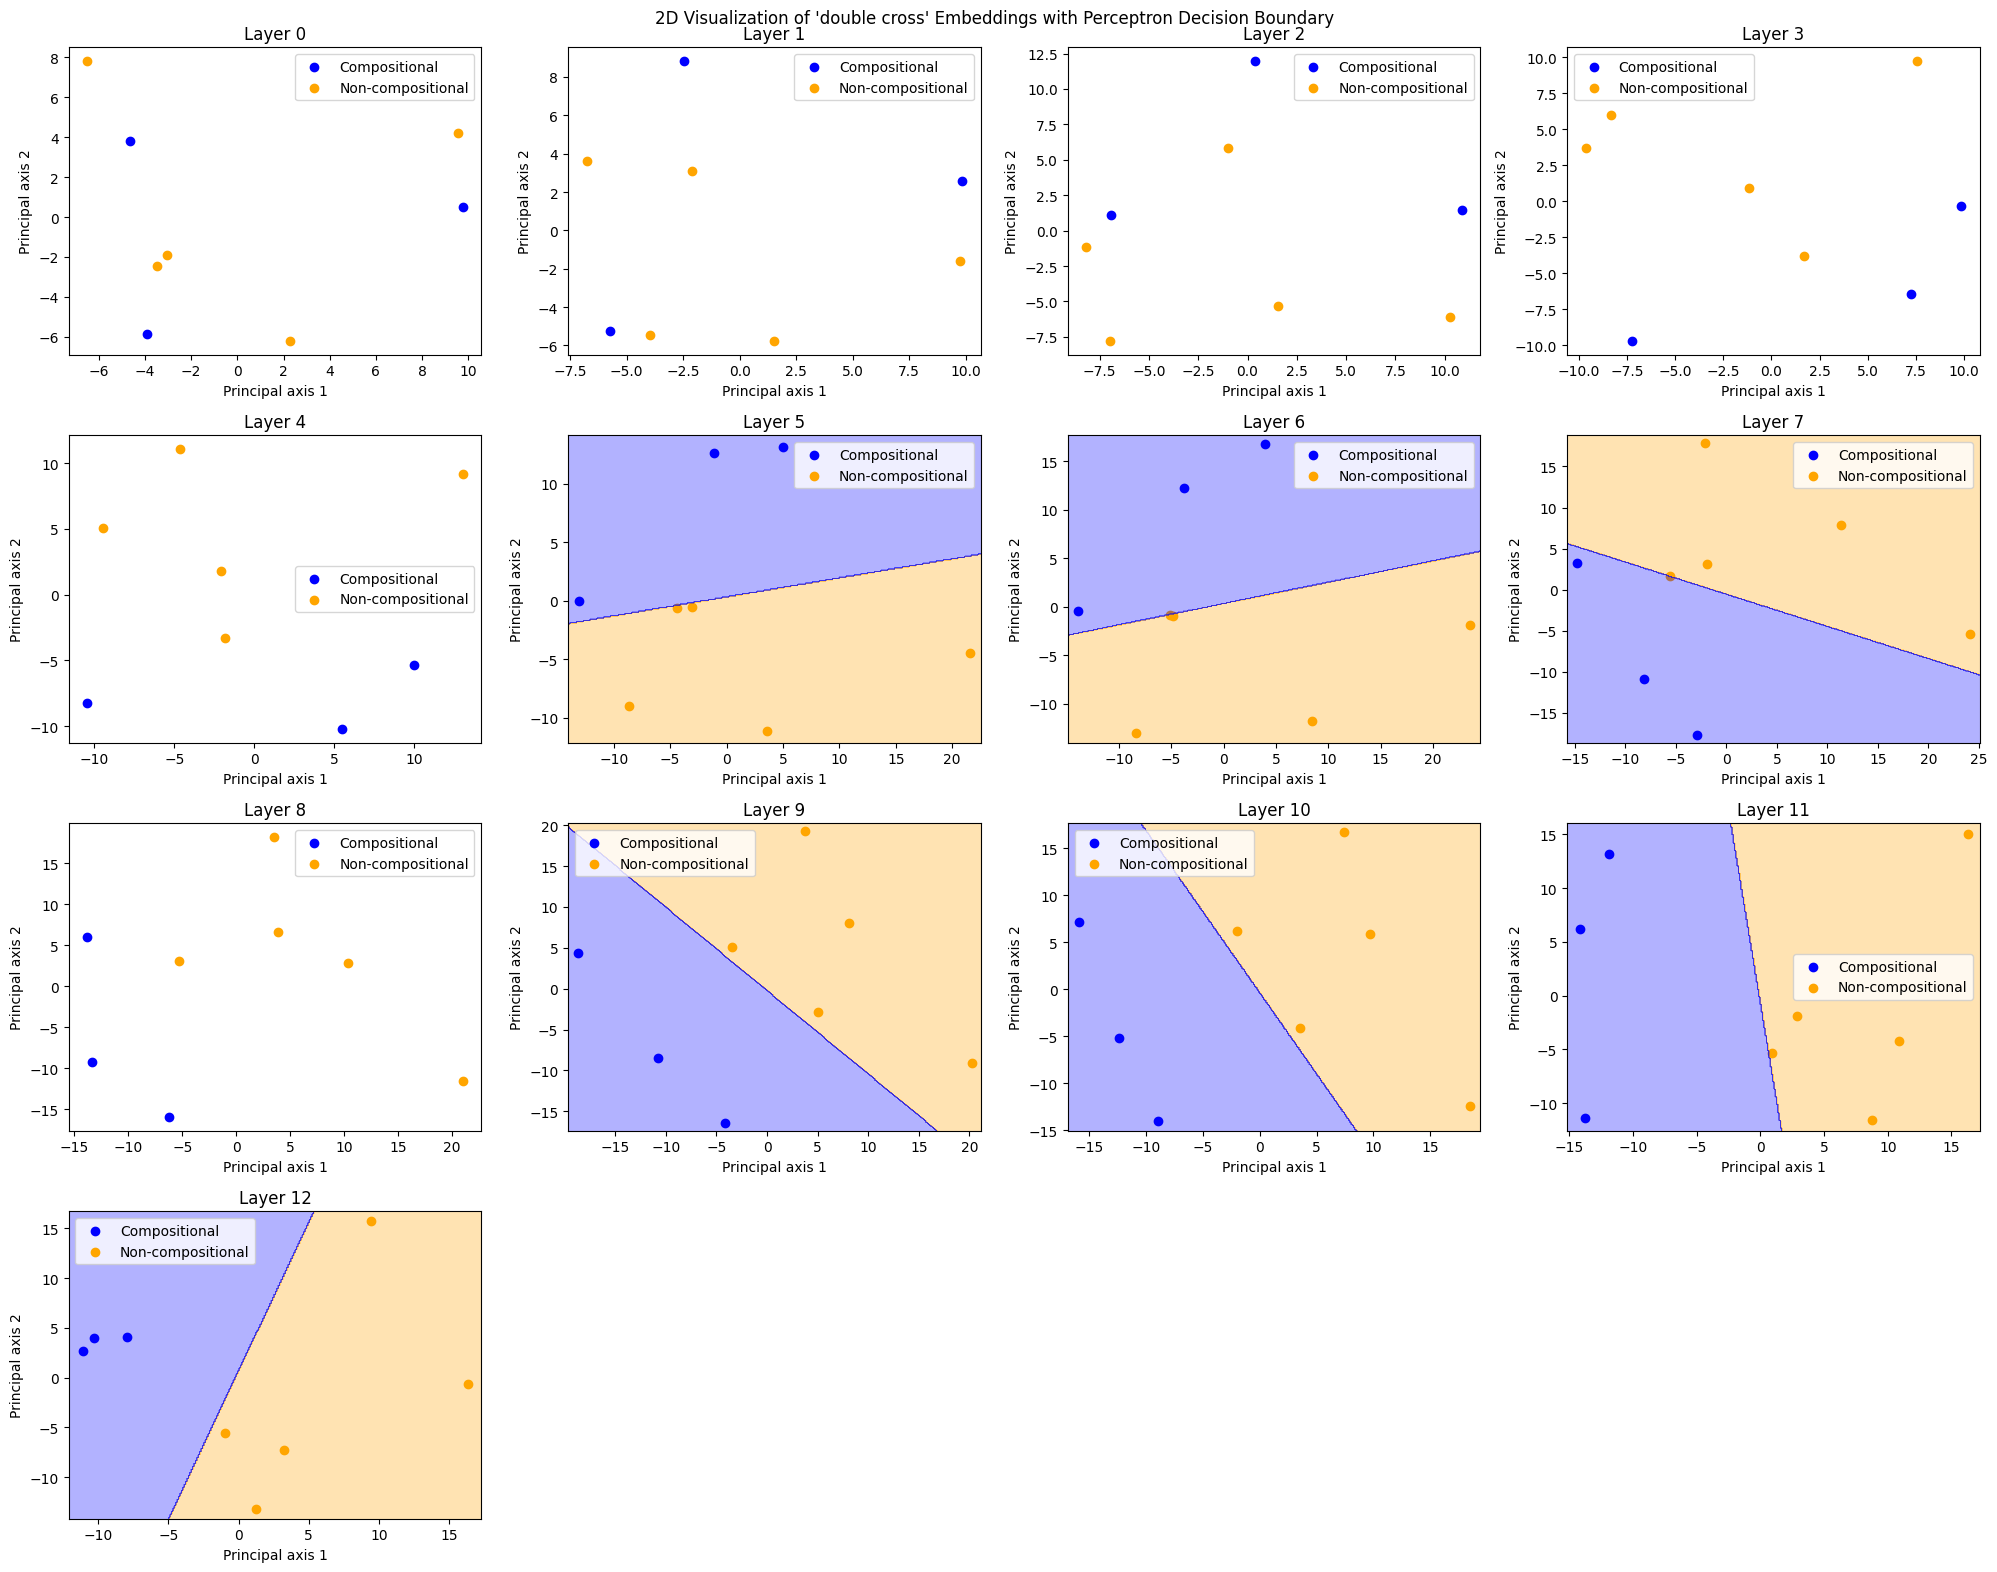

Layer 0
Training accuracy: 76.19% => data is not linearly separable.
Layer 1
Training accuracy: 90.48% => data is not linearly separable.
Layer 2
Training accuracy: 71.43% => data is not linearly separable.
Layer 3
Training accuracy: 66.67% => data is not linearly separable.
Layer 4
Training accuracy: 90.48% => data is not linearly separable.
Layer 5
Training accuracy: 95.24% => data is not linearly separable.
Layer 6
Training accuracy: 100.00% => data is linearly separable.
Layer 7
Training accuracy: 100.00% => data is linearly separable.
Layer 8
Training accuracy: 100.00% => data is linearly separable.
Layer 9
Training accuracy: 100.00% => data is linearly separable.
Layer 10
Training accuracy: 95.24% => data is not linearly separable.
Layer 11
Training accuracy: 33.33% => data is not linearly separable.
Layer 12
Training accuracy: 100.00% => data is linearly separable.


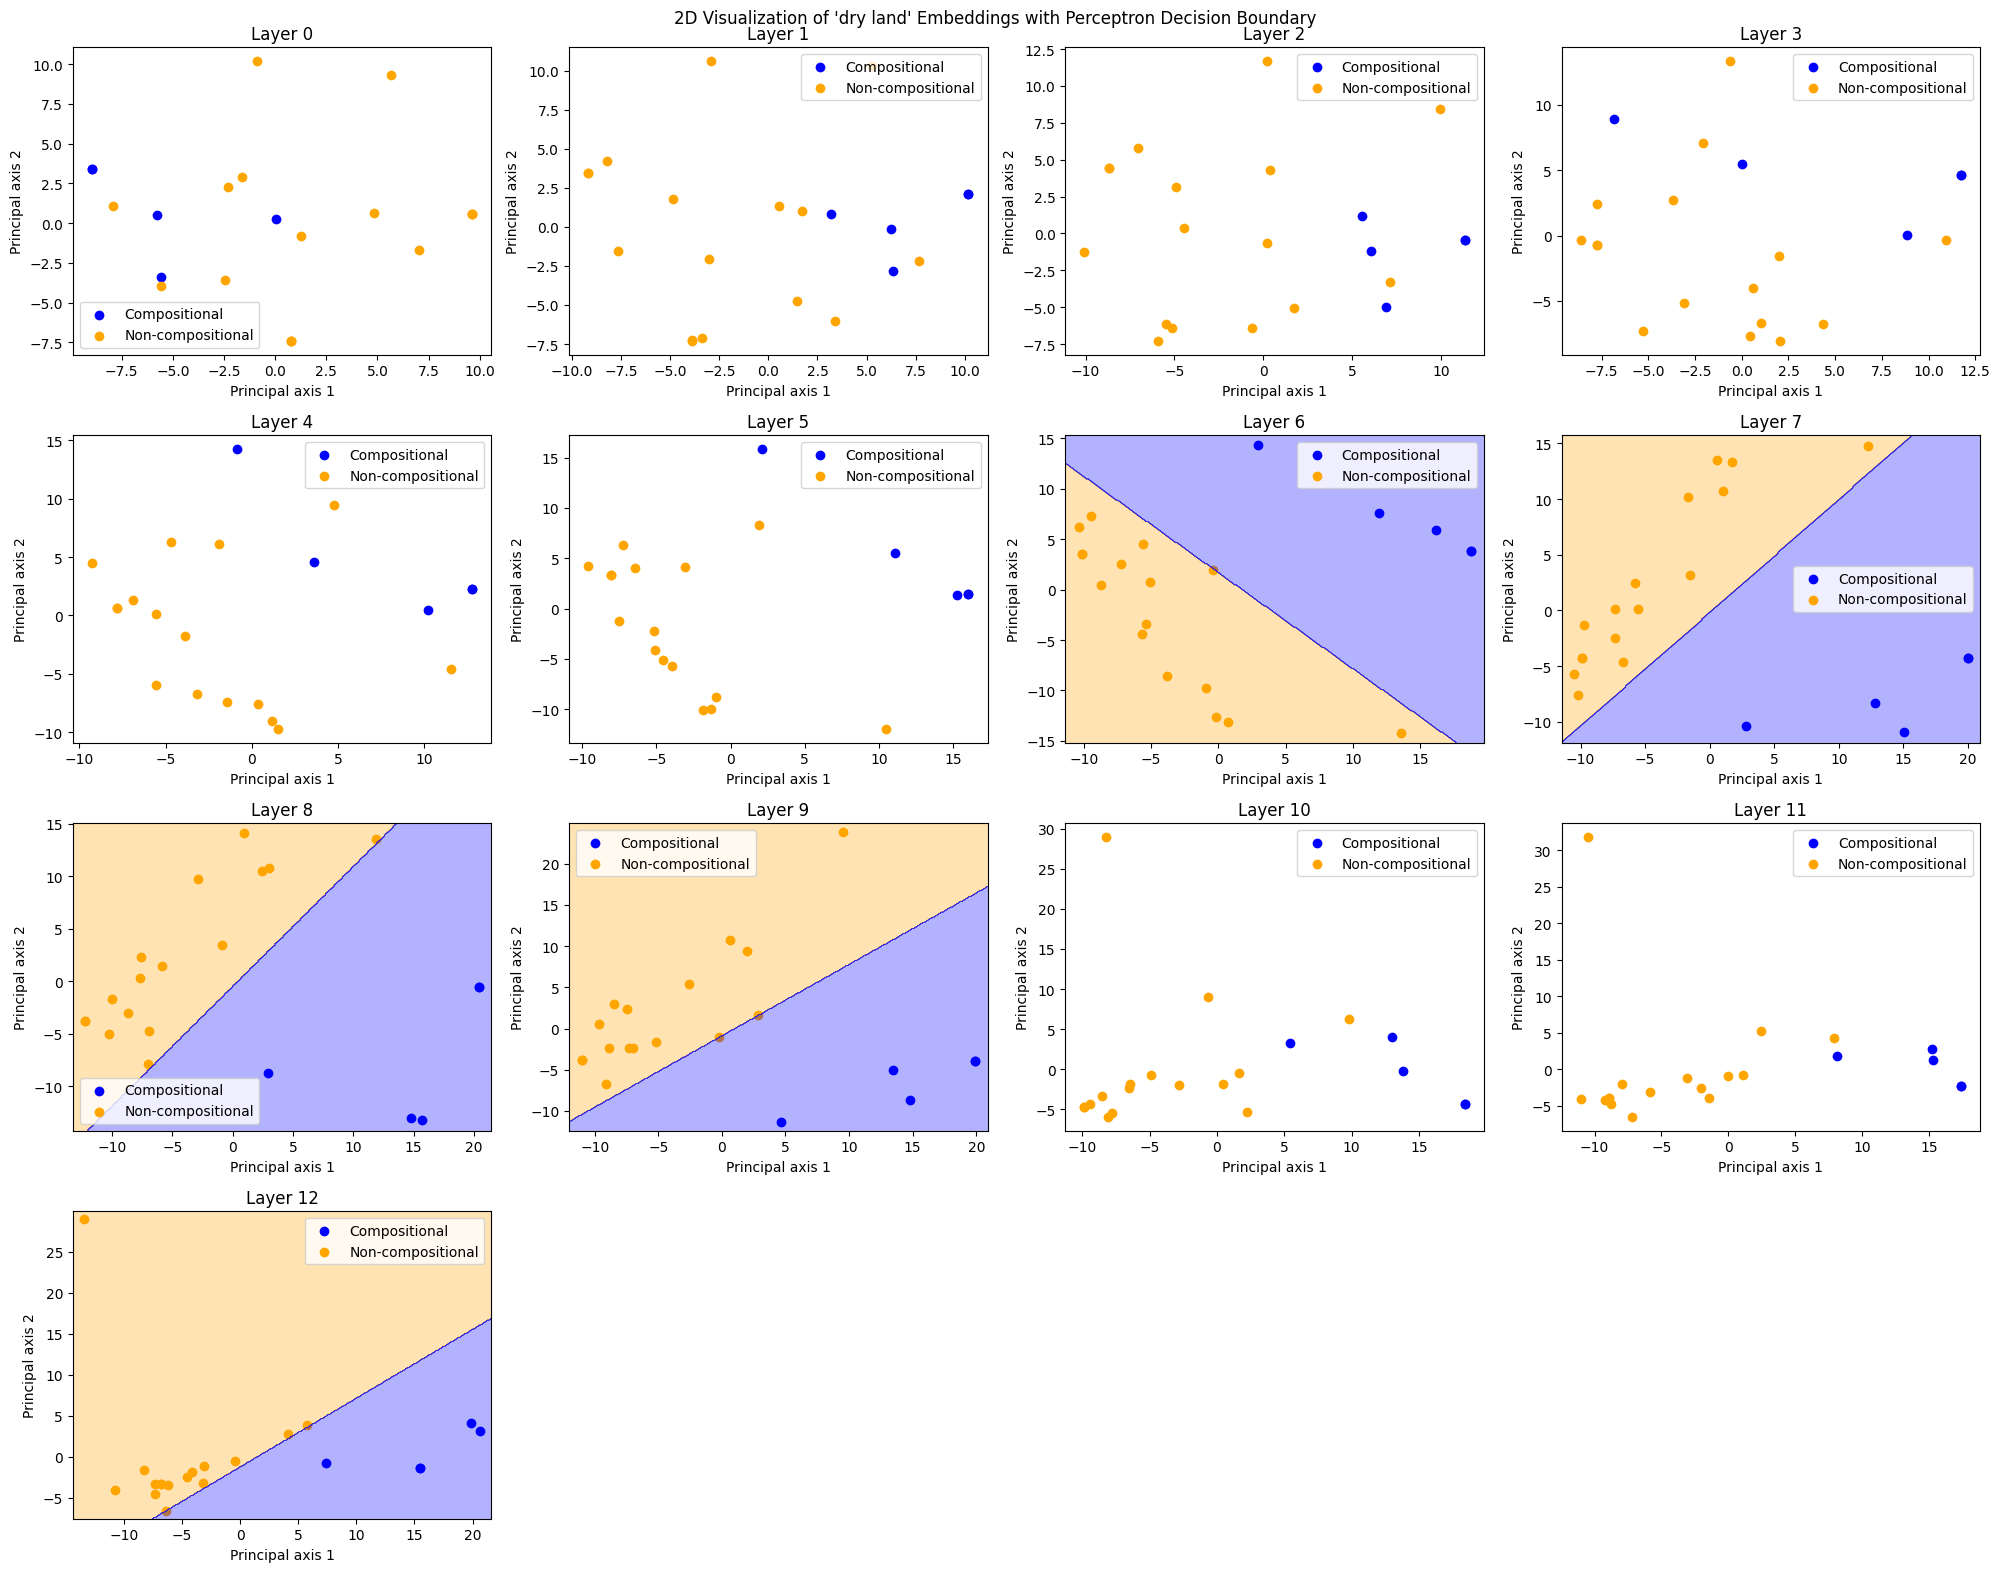

Layer 0
Training accuracy: 46.15% => data is not linearly separable.
Layer 1
Training accuracy: 84.62% => data is not linearly separable.
Layer 2
Training accuracy: 84.62% => data is not linearly separable.
Layer 3
Training accuracy: 92.31% => data is not linearly separable.
Layer 4
Training accuracy: 92.31% => data is not linearly separable.
Layer 5
Training accuracy: 100.00% => data is linearly separable.
Layer 6
Training accuracy: 100.00% => data is linearly separable.
Layer 7
Training accuracy: 100.00% => data is linearly separable.
Layer 8
Training accuracy: 100.00% => data is linearly separable.
Layer 9
Training accuracy: 100.00% => data is linearly separable.
Layer 10
Training accuracy: 100.00% => data is linearly separable.
Layer 11
Training accuracy: 100.00% => data is linearly separable.
Layer 12
Training accuracy: 100.00% => data is linearly separable.


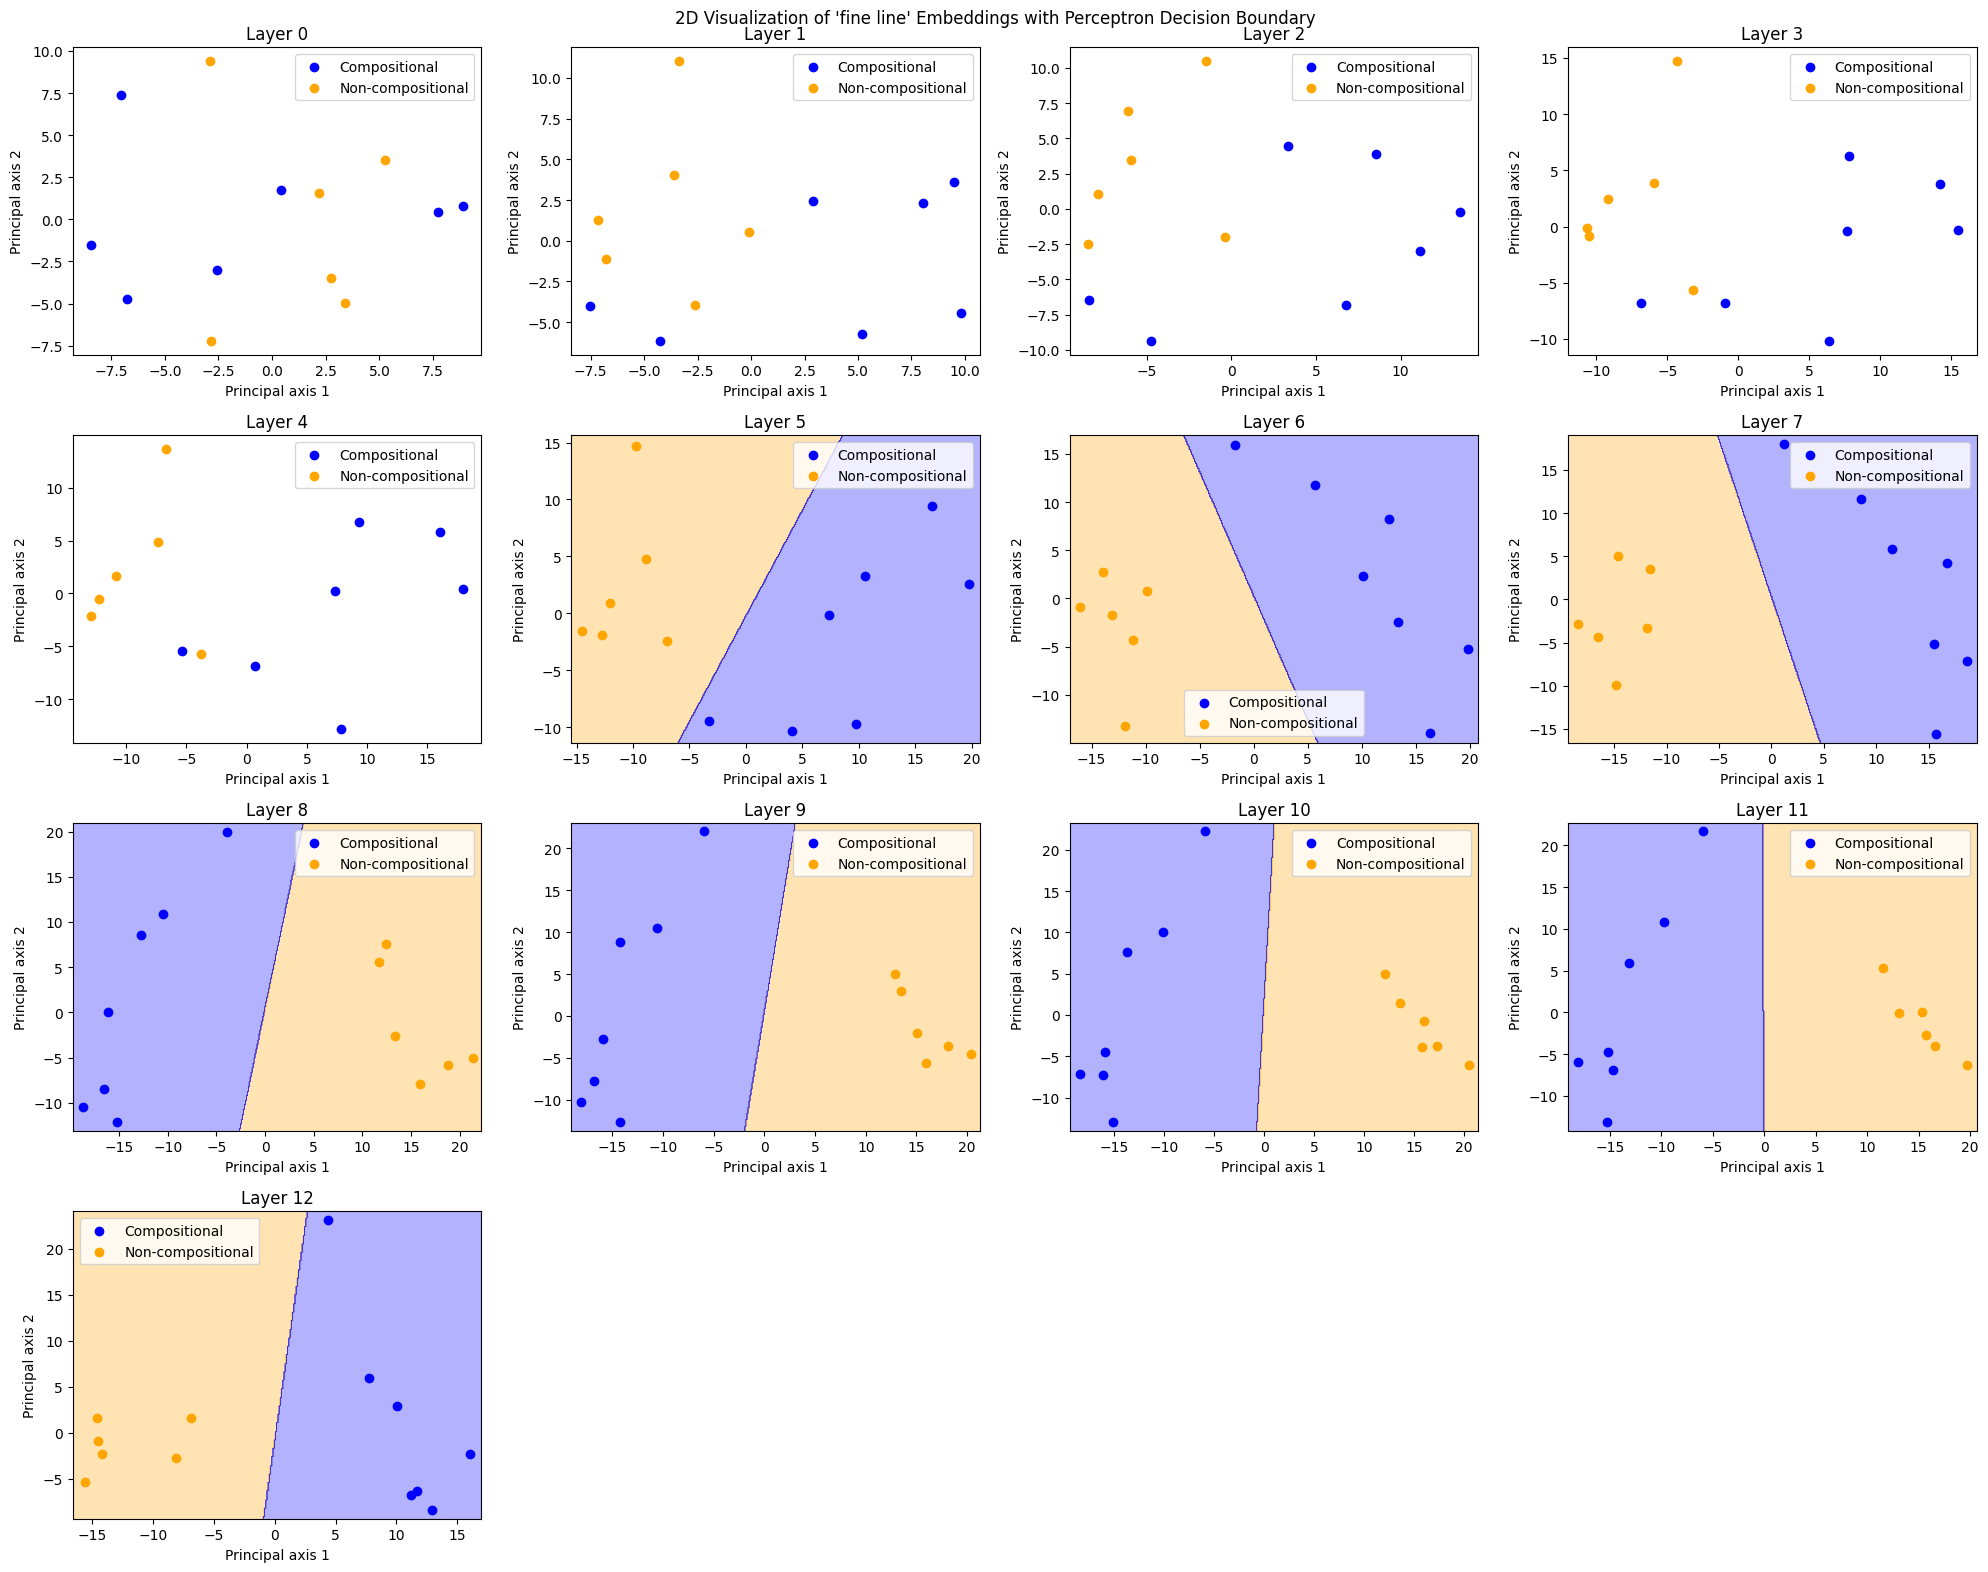

Layer 0
Training accuracy: 57.14% => data is not linearly separable.
Layer 1
Training accuracy: 85.71% => data is not linearly separable.
Layer 2
Training accuracy: 71.43% => data is not linearly separable.
Layer 3
Training accuracy: 85.71% => data is not linearly separable.
Layer 4
Training accuracy: 85.71% => data is not linearly separable.
Layer 5
Training accuracy: 71.43% => data is not linearly separable.
Layer 6
Training accuracy: 85.71% => data is not linearly separable.
Layer 7
Training accuracy: 71.43% => data is not linearly separable.
Layer 8
Training accuracy: 85.71% => data is not linearly separable.
Layer 9
Training accuracy: 85.71% => data is not linearly separable.
Layer 10
Training accuracy: 71.43% => data is not linearly separable.
Layer 11


In [ ]:
for mwe in pair_df.index:
  plot_decision_boundary_all_layers(mwe, data_df, tokenizer=multi_tokenizer, model=multi_model)

In [5]:
# Over all layers
mwes = pair_df.index.tolist()

layer_res = []
for layer_id in range(model.config.num_hidden_layers +1): # including the embedding layer
    mwe_similarities = {}
    for mwe in mwes:
            mwe_df = data_df[data_df['mwe'] == mwe].copy()
            mwe_df = retrieve_encoded_df(mwe_df, batch_size=32, layer_id=layer_id, normalize=True, print_ignored=False, tokenizer=tokenizer, model=model)
            mwe_df["combined_lit"] = mwe_df.apply(lambda row: combine_embeddings(row['literal_embedding'][0], row['literal_embedding'][1], "concatenation") if row['literal_embedding'] is not None else None, axis=1)
            mwe_df["combined_idiom"] = mwe_df.apply(lambda row: combine_embeddings(row['idiomatic_embedding'][0], row['idiomatic_embedding'][1], "concatenation") if row['idiomatic_embedding'] is not None else None, axis=1)
            centroid_lit, centroid_idiom = compute_centroids(mwe_df)
            sim = compute_centroid_cos_sim(centroid_lit, centroid_idiom)
            mwe_similarities[mwe] = sim
    layer_res.append(mwe_similarities)

mwes = sorted(list(layer_res[0].keys()))  # Sort the MWEs alphabetically
result_df = pd.DataFrame(index=mwes)

for layer_id, layer_similarities in enumerate(layer_res):
    layer_values = [layer_similarities.get(mwe, None) for mwe in mwes]
    result_df[layer_id] = layer_values

result_df

0         1         2         3         4         5   \
acid test        0.980373  0.954396  0.929574  0.905296  0.867678  0.813803   
ancient history  0.983407  0.975462  0.967598  0.960968  0.946830  0.909510   
baby blues       0.992349  0.981665  0.971808  0.963988  0.949633  0.919683   
bad hat          0.992013  0.987987  0.983924  0.981428  0.977185  0.963249   
best man         0.983671  0.981448  0.977064  0.970663  0.962268  0.943093   
big fish         0.979435  0.969373  0.955628  0.939474  0.909610  0.887227   
blue blood       0.984100  0.965228  0.935582  0.914771  0.871624  0.827176   
brass ring       0.995679  0.989886  0.981638  0.969101  0.953113  0.930010   
brick wall       0.993652  0.990032  0.982711  0.977193  0.960906  0.933779   
chain reaction   0.991416  0.971495  0.939434  0.919561  0.881308  0.849589   
closed book      0.990377  0.971905  0.953313  0.920268  0.897700  0.865241   
cutting edge     0.997636  0.988899  0.965009  0.947388  0.920475  0.857177   
double cross     0.991376  0.983081  0.966589  0.950802  0.921971  0.894360   
dry land         0.977998  0.965302  0.949148  0.953025  0.921008  0.862762   
fine line        0.991789  0.972049  0.955618  0.922582  0.882591  0.822505   
fish story       0.976387  0.957477  0.945376  0.935108  0.937445  0.916572   
food market      0.977816  0.967057  0.953033  0.946589  0.942321  0.918799   
glass ceiling    0.988058  0.979825  0.964788  0.950842  0.937470  0.908776   
gold mine        0.983355  0.965798  0.931473  0.919042  0.880777  0.845919   
ground floor     0.986801  0.982411  0.971687  0.956961  0.942233  0.915888   
hard shoulder    0.945989  0.941063  0.923900  0.900082  0.878556  0.824905   
heavy cross      0.990425  0.982095  0.959087  0.937840  0.907213  0.881530   
low profile      0.957804  0.942256  0.898444  0.875492  0.777483  0.655490   
nest egg         0.976018  0.960612  0.924008  0.899029  0.830415  0.755108   
public service   0.962320  0.946063  0.921514  0.902123  0.863114  0.835873   
rat run          0.967146  0.939846  0.901989  0.875122  0.846872  0.790042   
rocket science   0.993513  0.986468  0.963382  0.949391  0.910585  0.887412   
smoke screen     0.972720  0.951817  0.917325  0.902092  0.853181  0.807271   
top dog          0.971356  0.941636  0.906561  0.890427  0.849148  0.769940   

                       6         7         8         9         10        11  \
acid test        0.729569  0.690482  0.653397  0.641282  0.625941  0.631765   
ancient history  0.877644  0.854458  0.810895  0.811099  0.820145  0.822738   
baby blues       0.882546  0.851958  0.837958  0.837450  0.836624  0.839766   
bad hat          0.939108  0.932048  0.915741  0.914611  0.920945  0.923042   
best man         0.916185  0.890647  0.855284  0.853355  0.843986  0.830090   
big fish         0.838574  0.802033  0.788039  0.783829  0.784917  0.793805   
blue blood       0.775682  0.711925  0.666011  0.663882  0.674510  0.687868   
brass ring       0.899651  0.877001  0.853966  0.857278  0.864132  0.871286   
brick wall       0.900384  0.888111  0.870228  0.870537  0.874666  0.881910   
chain reaction   0.794945  0.747763  0.717640  0.718296  0.722922  0.724754   
closed book      0.798232  0.784447  0.765113  0.768437  0.763528  0.776968   
cutting edge     0.768678  0.716477  0.664965  0.649449  0.653379  0.665976   
double cross     0.834921  0.802504  0.768473  0.753898  0.751428  0.745879   
dry land         0.791852  0.771008  0.750229  0.769422  0.787318  0.793801   
fine line        0.732770  0.642004  0.576461  0.537227  0.523445  0.560157   
fish story       0.878830  0.839530  0.817108  0.800607  0.806210  0.811553   
food market      0.879074  0.838375  0.802676  0.794127  0.801326  0.808675   
glass ceiling    0.857691  0.836946  0.816042  0.822560  0.830493  0.823590   
gold mine        0.772242  0.705505  0.618190  0.539047  0.528449  0.549309   
ground floor     0.885142  0.875592  0.850300  0.846474  0.852468  0.853

In [11]:
# For the paper
mwe_stats = {}

for layer_id, layer_similarities in enumerate(layer_res):
    mwe_sims = list(layer_similarities.values())
    
    for mwe, sim in layer_similarities.items():
        if mwe not in mwe_stats:
            mwe_stats[mwe] = []
        
        mwe_stats[mwe].append(sim)

mwe_stats_series = pd.Series({mwe: [np.min(sims), np.max(sims), np.std(sims), np.median(sims)] for mwe, sims in mwe_stats.items()})

for mwe, stats in mwe_stats_series.items():
    print(f"{mwe}: min={stats[0]:.2f}, max={stats[1]:.2f}, std={stats[2]:.2f}, median={stats[3]:.2f}")


acid test: min=0.63, max=0.98, std=0.13, median=0.73
ancient history: min=0.81, max=0.98, std=0.07, median=0.88
baby blues: min=0.84, max=0.99, std=0.06, median=0.88
bad hat: min=0.91, max=0.99, std=0.03, median=0.94
best man: min=0.83, max=0.98, std=0.06, median=0.92
big fish: min=0.78, max=0.98, std=0.07, median=0.84
blue blood: min=0.66, max=0.98, std=0.12, median=0.78
brass ring: min=0.85, max=1.00, std=0.05, median=0.90
brick wall: min=0.87, max=0.99, std=0.05, median=0.91
chain reaction: min=0.72, max=0.99, std=0.10, median=0.79
closed book: min=0.76, max=0.99, std=0.08, median=0.82
cutting edge: min=0.65, max=1.00, std=0.13, median=0.78
double cross: min=0.75, max=0.99, std=0.09, median=0.83
dry land: min=0.75, max=0.98, std=0.08, median=0.81
fine line: min=0.52, max=0.99, std=0.17, median=0.73
fish story: min=0.80, max=0.98, std=0.06, median=0.88
food market: min=0.79, max=0.98, std=0.07, median=0.88
glass ceiling: min=0.82, max=0.99, std=0.06, median=0.86
gold mine: min=0.53, 

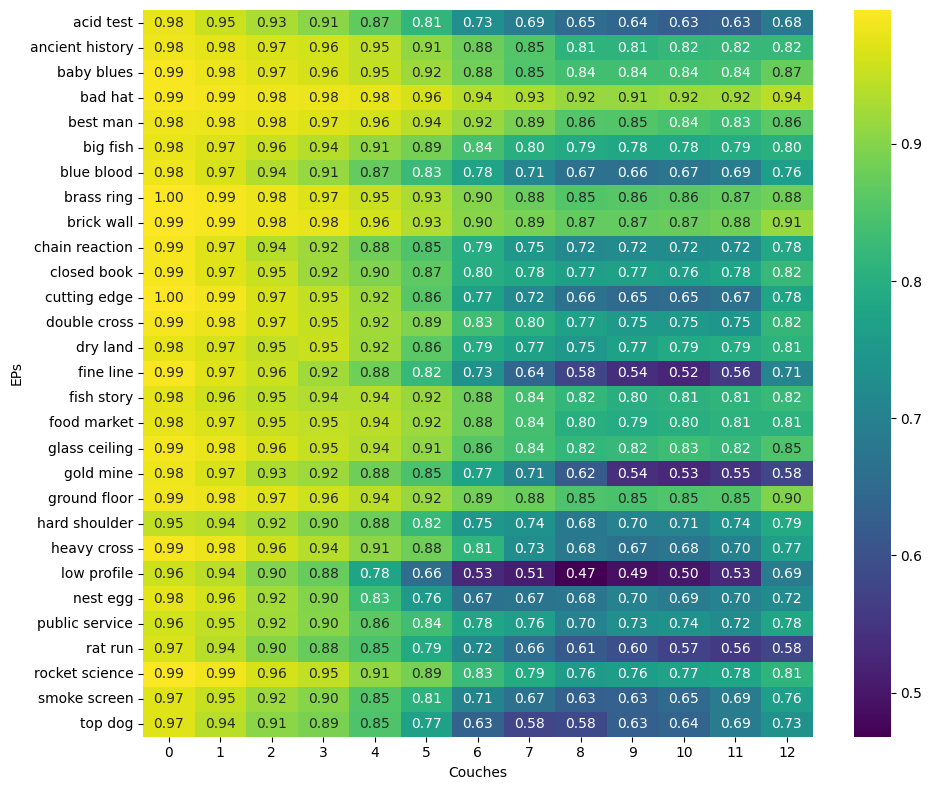

In [8]:


plt.figure(figsize=(10, 8))
sns.heatmap(result_df, cmap='viridis', annot=True, fmt=".2f")
# plt.title('C et NC similarités à travers toutes les couches (multi-bert)')
plt.xlabel('Couches')
plt.ylabel('EPs')
# plt.xticks(rotation=35)
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig(f"../results/plots/Heatmap-Multibert.pdf")
plt.show()